# AN Plots
This notebook is used to collect some of the code used to produce the plots particularly for the analysis note AN-22-133.

In [1]:
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import hist
import mplhep as hep
import warnings
from plot_utils import *
import fill_utils

warnings.filterwarnings('ignore')
hep.style.use("CMS")
plt.style.use(hep.style.CMS)
matplotlib.rcParams.update({'figure.max_open_warning': 0})
plt.rcParams['figure.dpi'] = 70

matplotlib.rcParams['figure.facecolor'] = 'white'



## Notebook Parameters
The following couple cells define the input and output directories, and load in the desired .pkl files into the `plots` nested dictionary.<br>
`output_label`: _str_, saves plots as `<output_label>+<plot_name>.<file_ext>`.<br>
`file_ext`: _str_, see above.<br>

In [2]:
# parameters
AN_label = '{}.pdf'
saveToAN = False  # control whether to save to AN directory

The `plots` dictionary is used to store all the plots imported from the pickle files. Dimensions: (sample) x (plot label) <br>
The `loader` function in `plot_utils.py` automatically merges all the QCD HT and QCD pT bins into one sample ('QCD_HT' and 'QCD_Pt'), applies the lumis, and excludes some of the low QCD bins.<br>

In [3]:
# This part is meant to be flxeible, depending on what you want to import
# dimensions: (sample) x (plot label)

# input .pkl files
plotDir = '/data/submit/{}/SUEP/outputs/'.format(os.environ['USER'])
#plotDir = '../testplot/'
infile_names = glob.glob(plotDir+'*')

# scouting_files_2016 = getHistLists(plotDir, 'IronMan6qcd', '../filelist/Scout/list_2016_scout_MC.txt')
# scouting_files_2016

# scouting_files_2016 = getHistLists(plotDir, 'IronMan2016MC', '../filelist/Scout/list_2016_scout_MC.txt')
# scouting_files_2016

# scouting_files_2016 = getHistLists(plotDir, 'afterHLTfix16_noHTcut', '../filelist/Scout/list_2016_scout_MC.txt')
# scouting_files_2016

# scouting_files_2016 = getHistLists(plotDir, 'afterHLTfix16_noHTcut2', '../filelist/Scout/list_2016_scout_MC.txt')
# scouting_files_2016

# scouting_files_2016 = getHistLists(plotDir, 'afterHLTfix16_noHTcut4', '../filelist/Scout/list_2016_scout_MC.txt')
# scouting_files_2016

# scouting_files_2016 = getHistLists(plotDir, 'afterHLTfix16_HTcut2', '../filelist/Scout/list_2016_scout_MC.txt')
# scouting_files_2016

#scouting_data_2017 = ['/data/submit/akanugan/SUEP/outputs/GluGluToSUEP_HT400_T0p25_mS600.000_mPhi1.000_T0.250_modeleptonic_TuneCP5_13TeV_IronMan4.root']


# scouting_data_2016 = getHistLists(plotDir, 'full16tes', '../filelist/Scout/list_2016_scout_data.txt')
# scouting_data_2016

# scouting_files_2017 = getHistLists(plotDir, 'IronMan4qcd', '../filelist/Scout/list_2017_scout_MC.txt')
# scouting_files_2017

# scouting_files_2017 = getHistLists(plotDir, 'new3', '../filelist/Scout/list_2017_scout_MC.txt')
# scouting_files_2017

# scouting_files_2017 = getHistLists(plotDir, 'afterHLTfix17_noHTcut4', '../filelist/Scout/list_2017_scout_MC.txt')
# scouting_files_2017

# scouting_files_2017 = getHistLists(plotDir, 'afterHLTfix17_HTcut2', '../filelist/Scout/list_2017_scout_MC.txt')
# scouting_files_2017

# scouting_data_2017 = getHistLists(plotDir, 'full17tes', '../filelist/Scout/list_2017_scout_data.txt')
# scouting_data_2017

scouting_files_2018 = getHistLists('/data/submit/jinw65/SUEP/outputs/', 'Nov8_woHTcut', '../filelist/Scout/list_2018_scout_MC.txt')

# test = getHistLists(plotDir, 'new_vars3','../filelist/Scout/list_2018_scout_data.txt')
# data_18A = getHistLists(plotDir, 'new_vars3','../filelist/Scout/list_2018A_data.txt')
# data_18B = getHistLists(plotDir, 'new_vars3','../filelist/Scout/list_2018B_data.txt')
# data_18C = getHistLists(plotDir, 'new_vars3','../filelist/Scout/list_2018C_data.txt')
# data_18D = getHistLists(plotDir, 'new_vars3','../filelist/Scout/list_2018D_data.txt')
# data_18E = getHistLists(plotDir, 'new_vars3','../filelist/Scout/list_2018E_data.txt')

#data_18 = getHistLists(plotDir, 'new_vars3','../filelist/Scout/list_2018_scout_data.txt')
data_18 = getHistLists(plotDir, 'new_vars3_HTvar_nTrvar','../filelist/Scout/list_2018_scout_data.txt')
#data_18 = getHistLists(plotDir, 'new_vars3_HT1200_HT800','../filelist/Scout/list_2018_scout_data.txt')
data_17 = getHistLists(plotDir, 'new_vars3','../filelist/Scout/list_2017_scout_data.txt')

# generate list of files that you want to merge histograms for
# offline_files_2018 = getHistLists(plotDir, 'unblind', '../filelist/list_2018_JetHT_A02.txt')
# offline_files_2017 = getHistLists(plotDir, 'unblind', '../filelist/list_2017_JetHT_A02.txt')
# offline_files_2016 = getHistLists(plotDir, 'unblind', '../filelist/list_2016_JetHT_A02.txt')

# offline_files_2018 = getHistLists(plotDir, 'March2023', '../filelist/list_2018_MC_A01.txt')
#offline_files_2017 = getHistLists(plotDir, 'March2023', '../filelist/list_2017_MCBkg_A01.txt')
# offline_files_2016 = getHistLists(plotDir, 'March2023', '../filelist/list_2016_MC_A01.txt')

#offline_files_SUEP_2018 = getHistLists(plotDir, 'March2023', '../filelist/list_noHighMS_signal_offile.txt')
#offline_files_SUEP_2017 = getHistLists(plotDir, 'July2023_2017_superlite', '../filelist/list_noHighMS_signal_offline.txt')
#offline_files_SUEP_2016 = getHistLists(plotDir, 'July2023_2016_superlite', '../filelist/list_2016_MC_A01.txt')
#offline_files_SUEP_2016apv = getHistLists(plotDir, 'July2023_2016apv', '../filelist/list_2016_MC_A01.txt')

# playing with only some samples
#offline_files_SUEP_2018 = [x for x in offline_files_SUEP_2018 if 'generic' in x and ('mS125' in x or 'mS200' in x or 'mS300' in x)]
#offline_files_SUEP_2017 = [x for x in offline_files_SUEP_2017 if 'generic' in x and ('mS125' in x or 'mS200' in x or 'mS300' in x)]
#offline_files_SUEP_2016 = [x for x in offline_files_SUEP_2016 if 'generic' in x and ('mS125' in x or 'mS200' in x or 'mS300' in x)]
#offline_files_SUEP_2016apv = [x for x in offline_files_SUEP_2016apv if 'generic' in x and ('mS125' in x or 'mS200' in x or 'mS300' in x)]

#scouting_files_2018_bg = getHistLists(plotDir, 'Sep22', '/work/submit/jinw65/SUEPCoffea_dask/filelist/list_2018_scout_MC_tmp.txt')
#scouting_files_2018_bg = getHistLists(plotDir, 'Sep22', '/work/submit/jinw65/SUEPCoffea_dask/filelist/list_2018_scout_MC_tmp.txt')
#scouting_files_2018_data = getHistLists(plotDir, 'Sep28_HTJECcut', '/work/submit/jinw65/SUEPCoffea_dask/filelist/list_2018_scout_data.txt')
#scouting_files_2018_signal = getHistLists(plotDir, 'Oct03_2', '/work/submit/jinw65/SUEPCoffea_dask/filelist/list_noHighMS_signal_scout_test.txt')
#scouting_files_2016apv_signal = getHistLists(plotDir, 'Nov9_HTcut', '../filelist/Scout/list_noHighMS_signal_scout_test.txt')
#scouting_files_2018_data = getHistLists(plotDir, 'Sep28_HTJECcut', '../filelist/Scout/list_2018_scout_data.txt')
#scouting_files_2018_bg = getHistLists(plotDir, 'Nov12_noHTcut_rebin', '../filelist/Scout/list_2018_scout_MC_tmp.txt')
#scouting_files_2018_bg = getHistLists(plotDir, 'Nov8_woHTcut', '../filelist/Scout/list_2018_scout_MC_tmp.txt')
#scouting_files_2017_data = getHistLists(plotDir, 'full17tes', '../filelist/Scout/list_2017_scout_data.txt')
#scouting_files_2017_bg = getHistLists(plotDir, 'new3', '../filelist/Scout/list_2017_scout_MC.txt')

In [5]:
data_18

['/data/submit/akanugan/SUEP/outputs/ScoutingPFHT+Run2018A-v1+RAW_new_vars3_HTvar_nTrvar.root',
 '/data/submit/akanugan/SUEP/outputs/ScoutingPFHT+Run2018B-v1+RAW_new_vars3_HTvar_nTrvar.root',
 '/data/submit/akanugan/SUEP/outputs/ScoutingPFHT+Run2018C-v1+RAW_new_vars3_HTvar_nTrvar.root',
 '/data/submit/akanugan/SUEP/outputs/ScoutingPFHT+Run2018D-v1+RAW_new_vars3_HTvar_nTrvar.root',
 '/data/submit/akanugan/SUEP/outputs/ScoutingPFHT+Run2018E-v1+RAW_new_vars3_HTvar_nTrvar.root']

In [6]:
# merge the histograms, apply lumis, exclude low HT bins
#plots_SUEP_2018 = loader(offline_files_SUEP_2018, year='2018', exclude_low_bins=True)
#plots_SUEP_2017 = loader(offline_files_SUEP_2017, year='2017', exclude_low_bins=True)
#plots_SUEP_2016 = loader(offline_files_SUEP_2016, year='2016', exclude_low_bins=True)
#plots_SUEP_2016apv = loader(offline_files_SUEP_2016apv, year='2016_apv', exclude_low_bins=True)

#plots_2018 = loader(offline_files_2018, auto_lumi=True, exclude_low_bins=True)
#plots_2017 = loader(offline_files_2017, auto_lumi=True, exclude_low_bins=True)
#plots_2016 = loader(offline_files_2016, auto_lumi=True, exclude_low_bins=True)


#plots_scouting_2016_bg = loader(scouting_files_2016,auto_lumi=1, exclude_low_bins=False, scouting=True)
# plots_scouting_2016_data = loader(scouting_data_2016,auto_lumi=1, exclude_low_bins=True, scouting=True)

#plots_scouting_2017_bg = loader(scouting_files_2017,auto_lumi=1, exclude_low_bins=False, scouting=True)
#plots_scouting_2017_data = loader(scouting_data_2017,auto_lumi=1, exclude_low_bins=True, scouting=True)
# test = loader(test,auto_lumi=1, exclude_low_bins=False, scouting=True)
# data_18a = loader(data_18A,auto_lumi=1, exclude_low_bins=False, scouting=True)
# data_18b = loader(data_18B,auto_lumi=1, exclude_low_bins=False, scouting=True)
# data_18c = loader(data_18C,auto_lumi=1, exclude_low_bins=False, scouting=True)
# data_18d = loader(data_18D,auto_lumi=1, exclude_low_bins=False, scouting=True)
# data_18e = loader(data_18E,auto_lumi=1, exclude_low_bins=False, scouting=True)

data_18 = loader(data_18,auto_lumi=1, exclude_low_bins=False, scouting=True)
data_17 = loader(data_17,auto_lumi=1, exclude_low_bins=False, scouting=True)

#plots_scouting_2018_bg = loader(scouting_files_2018,auto_lumi=1, exclude_low_bins=False, scouting=True)


#plots_scouting_2018_bg = loader(scouting_files_2018_bg,auto_lumi=True, exclude_low_bins=True,scouting=True)
#plots_scouting_2018_bg = loader(scouting_files_2018_bg,auto_lumi=True, exclude_low_bins=True,scouting=True)
#plots_scouting_2018_data = loader(scouting_files_2018_data,auto_lumi=True, exclude_low_bins=False,scouting=True)
#plots_scouting_2018_signal = loader(scouting_files_2018_signal,year='2018', exclude_low_bins=False,scouting=True)
#plots_scouting_2016apv_signal = loader(scouting_files_2016apv_signal,year='2016_apv', exclude_low_bins=False,scouting=True)

#plots_scouting_2017_bg = loader(scouting_files_2017_bg,auto_lumi=True, exclude_low_bins=True,scouting=True)
#plots_scouting_2017_data = loader(scouting_files_2017_data,auto_lumi=True, exclude_low_bins=False,scouting=True)
#plots_scouting_2016apv_data = loader(scouting_files_2016apv_data,auto_lumi=True, exclude_low_bins=True,scouting=True)
#plots_scouting_2016apv_bg = loader(scouting_files_2016apv_bg,auto_lumi=True, exclude_low_bins=True,scouting=True)

In [7]:
# put everything in one dictionary
plots = {}

def applyNormalizationToSUEPSamples(files, plots_SUEP):   
    output = {}
    for file, sample in zip(files, plots_SUEP.keys()):
        file = file.split("/")[-1].split("13TeV")[0]+'13TeV-pythia8'
        xsection = fill_utils.getXSection(file, '2018_SUEP')
        output[sample] = fill_utils.apply_normalization(plots_SUEP[sample], xsection)
    return output
    

# apply xsection and filter efficiency to SUEP here
#plots_SUEP_2018 = applyNormalizationToSUEPSamples(offline_files_SUEP_2018, plots_SUEP_2018)
#plots_SUEP_2017 = applyNormalizationToSUEPSamples(offline_files_SUEP_2017, plots_SUEP_2017)
#plots_SUEP_2016 = applyNormalizationToSUEPSamples(ofline_files_SUEP_2016, plots_SUEP_2016)
#plots_SUEP_2016apv = applyNormalizationToSUEPSamples(offline_files_SUEP_2016apv, plots_SUEP_2016apv)

#for key in plots_SUEP_2018.keys(): plots[key+"_2018"] = plots_SUEP_2018[key]
#for key in plots_SUEP_2017.keys(): plots[key+"_2017"] = plots_SUEP_2017[key]
# for key in plots_SUEP_2016.keys(): 
#     plots[key+"_2016"] = {}
#     if key not in plots_SUEP_2016apv.keys(): continue
#     for plot in plots_SUEP_2016[key].keys():
#         plots[key+"_2016"][plot] = plots_SUEP_2016[key][plot].copy() + plots_SUEP_2016apv[key][plot].copy()
#for key in plots_scouting_2018_bg.keys(): plots[key+"_2018"] = plots_scouting_2018_bg[key]
#for key in plots_scouting_2018_data.keys(): plots[key+"_2018"] = plots_scouting_2018_data[key]
for key in data_18.keys(): plots[key+"_2018"] = data_18[key]
for key in data_17.keys(): plots[key+"_2017"] = data_17[key]


#for key in plots_scouting_2018_data.keys(): plots[key+"_2018"] = plots_scouting_2018_data[key]
#for key in plots_scouting_2018_bg.keys(): plots[key+"_2018"] = plots_scouting_2018_bg[key]
#for key in plots_scouting_2017_data.keys(): plots[key+"_2017"] = plots_scouting_2017_data[key]
#for key in plots_scouting_2017_bg.keys(): plots[key+"_2017"] = plots_scouting_2017_bg[key]
#for key in plots_scouting_2016_bg.keys(): plots[key+"_2017"] = plots_scouting_2016_bg[key]
#for key in plots_scouting_2018_signal.keys(): plots[key+"_2018"] = plots_scouting_2018_signal[key]
#for key in plots_scouting_2016apv_signal.keys(): plots[key+"_2016apv"] = plots_scouting_2016apv_signal[key]
#for key in plots_2017.keys(): plots[key+"_2017"] = plots_2017[key]
#for key in plots_2016.keys(): plots[key+"_2016"] = plots_2016[key]

In [8]:
plots.keys()



dict_keys(['data_A-v1+RAW_new_vars3_HTvar_nTrvar.root_2018', 'data_2018', 'data_B-v1+RAW_new_vars3_HTvar_nTrvar.root_2018', 'data_C-v1+RAW_new_vars3_HTvar_nTrvar.root_2018', 'data_D-v1+RAW_new_vars3_HTvar_nTrvar.root_2018', 'data_E-v1+RAW_new_vars3_HTvar_nTrvar.root_2018', 'data_C-v1+RAW_new_vars3.root_2017', 'data_2017', 'data_D-v1+RAW_new_vars3.root_2017', 'data_E-v1+RAW_new_vars3.root_2017', 'data_F-v1+RAW_new_vars3.root_2017'])

In [62]:
#for year in [2017]: combineMCSamples(plots, year, ['QCD_HT'])
#for year in [2017]: combineMCSamples(plots, year, ['QCD_HT','TTJets'])
#combineYears(plots, 'MC', ['2018'])
#combineYears(plots, 'data', ['2018'])
#for key in plots_scouting_2018_signal.keys(): combineYears(plots, key, ['2018'])
#combineYears(plots, 'data', ['2016apv'])
#for year in ["2016apv"]: combineMCSamples(plots, year, ['QCD_HT','TTJets'])
#combineYears(plots, 'MC', ['2016apv'])

These are all the samples loaded.

In [9]:
keys = list(plots.keys())
keys.sort()
for k in keys: print(k)

data_2017
data_2018
data_A-v1+RAW_new_vars3_HTvar_nTrvar.root_2018
data_B-v1+RAW_new_vars3_HTvar_nTrvar.root_2018
data_C-v1+RAW_new_vars3.root_2017
data_C-v1+RAW_new_vars3_HTvar_nTrvar.root_2018
data_D-v1+RAW_new_vars3.root_2017
data_D-v1+RAW_new_vars3_HTvar_nTrvar.root_2018
data_E-v1+RAW_new_vars3.root_2017
data_E-v1+RAW_new_vars3_HTvar_nTrvar.root_2018
data_F-v1+RAW_new_vars3.root_2017


In [40]:
plots['data_E-v1+RAW_new_vars3.root_2018']

KeyError: 'data_E-v1+RAW_new_vars3.root_2018'

## Ch. 4 Event Selection

In [65]:
##plots['mS125_T4.0_mPhi2.0_generic_2016'].keys()

In [66]:
#print(lumiLabel("2016apv",scouting=True))

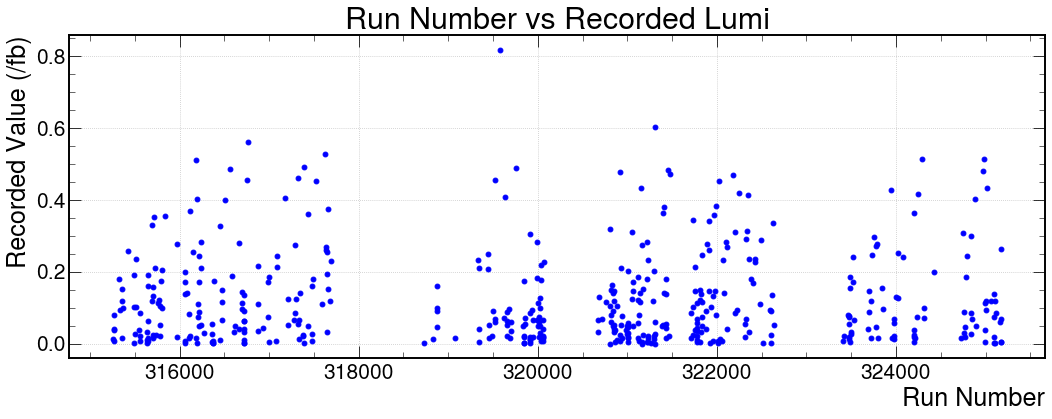

In [22]:
# Run vs recorded lumi
import matplotlib.pyplot as plt

# Lists to store the extracted data
run_numbers = []
recorded_values = []

# Read the data from the text file
with open("out_leagcy18.txt", "r") as file:
    next(file)  # Skip the first line (header)
    for line in file:
        parts = line.strip().split(',')
        run_number = int(parts[0].split(':')[0])
        recorded_value = float(parts[-1].split('^')[0])
        run_numbers.append(run_number)
        recorded_values.append(recorded_value)

# Plot the data
plt.plot(run_numbers, recorded_values, marker='o', linestyle='', color='blue', markersize=5)
plt.xlabel('Run Number')
plt.ylabel('Recorded Value (/fb)')
plt.title('Run Number vs Recorded Lumi')
plt.grid(True)
plt.show()


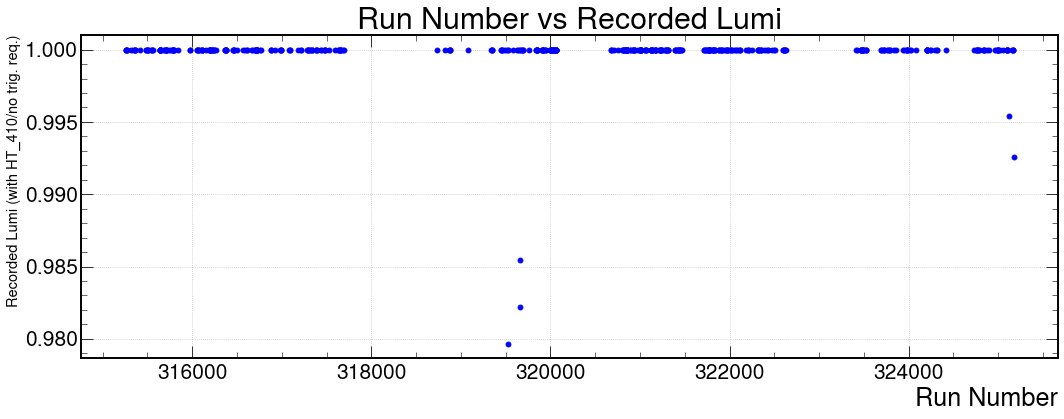

In [39]:
import matplotlib.pyplot as plt

# Lists to store the extracted data from both files
run_numbers_data1 = []
recorded_values_data1 = []

run_numbers_data2 = []
recorded_values_data2 = []

# Read data from out_leagcy18_DST_HT410.txt (data1.txt)
with open("out_leagcy18_DST_HT410.txt", "r") as file:
    next(file)  # Skip the first line (header)
    for line in file:
        parts = line.strip().split(',')
        run_number = int(parts[0].split(':')[0])
        recorded_value = float(parts[-1].split('^')[0])
        run_numbers_data1.append(run_number)
        recorded_values_data1.append(recorded_value)

# Read data from out_leagcy18.txt (data2.txt)
with open("out_leagcy18.txt", "r") as file:
    next(file)  # Skip the first line (header)
    for line in file:
        parts = line.strip().split(',')
        run_number = int(parts[0].split(':')[0])
        recorded_value = float(parts[-1].split('^')[0])
        run_numbers_data2.append(run_number)
        recorded_values_data2.append(recorded_value)

# Initialize lists to store matched run numbers, numerators, and denominators
all_run_numbers = []
numerators = []
denominators = []

# Iterate over run numbers from data1.txt
for run, val1 in zip(run_numbers_data1, recorded_values_data1):
    all_run_numbers.append(run)
    numerators.append(val1)
    if run in run_numbers_data2:  # Check if there is a match in data2.txt
        index = run_numbers_data2.index(run)
        val2 = recorded_values_data2[index]
        denominators.append(val2)
    else:
        denominators.append(0)  # If no match found in data2.txt, set denominator to 0

# Plot the ratio
plt.plot(all_run_numbers, [num/den for num, den in zip(numerators, denominators)], marker='o', linestyle='', color='blue', markersize=5)
plt.xlabel('Run Number')
plt.ylabel('Recorded Lumi (with HT_410/no trig. req.)',fontsize = 15)
plt.title('Run Number vs Recorded Lumi')
plt.grid(True)
plt.show()


In [27]:
# Dictionary to store recorded values from data2.txt indexed by run numbers
data2_recorded_values = {}

# Read data from data2.txt
with open("out_leagcy18.txt", "r") as file:
    next(file)  # Skip the first line (header)
    for line in file:
        parts = line.strip().split(',')
        run_number = int(parts[0].split(':')[0])
        recorded_value = float(parts[-1].split('^')[0])
        data2_recorded_values[run_number] = recorded_value

# Initialize lists to store matched run numbers, numerators, and denominators
matched_run_numbers = []
numerators = []
denominators = []

# Read data from data1.txt
with open("out_leagcy18_DST_HT410.txt", "r") as file:
    next(file)  # Skip the first line (header)
    for line in file:
        parts = line.strip().split(',')
        run_number = int(parts[0].split(':')[0])
        recorded_value_data1 = float(parts[-1].split('^')[0])
        if run_number in data2_recorded_values:
            recorded_value_data2 = data2_recorded_values[run_number]
            ratio = recorded_value_data1 / recorded_value_data2
            if ratio != 1:
                matched_run_numbers.append(run_number)
                numerators.append(recorded_value_data1)
                denominators.append(recorded_value_data2)

# Print Run no, num, den
print("Run Number\tNumerator\tDenominator")
for run, num, den in zip(matched_run_numbers, numerators, denominators):
    print(f"{run}\t\t{num}\t\t{den}")


Run Number	Numerator	Denominator
319528		0.058410906		0.059622995
319656		0.086471826		0.08803958
319658		0.061716393		0.06262978
325117		0.085216684		0.085612498
325172		0.067635724		0.068142514


### 1D Comparison - HT

In [19]:
plt.rcParams['figure.figsize'] = [18, 6]
plot_label = 'run_ClusterInverted'
year = '2018'
output_label="data18_events"
file_ext=".png"
temp = '4.0'
mPhi = '2.0'
decay = 'generic'
samples = ['data_'+year]
labels = ['Data 2018']

density = False

hep.cms.label(llabel='Preliminary', data=False, lumi=lumiLabel(year,scouting=True))
intLumis = np.array([0.013918864, 0.039703388, 0.006454507, 0.037143311, 0.078981117, 0.18006292, 0.093349061, 0.151930725, 0.118531849, 0.014489096, 0.10018276, 0.258566396, 0.190563067, 0.103438191, 0.002520994, 0.027983158, 0.103172328, 0.2368714, 0.036886267, 0.021968881, 0.008395188, 0.084134393, 0.010512485, 0.210579169, 0.001237309, 0.031431098, 0.063159684, 0.161090551, 0.191964439, 0.008018192, 0.015226137, 0.329958838, 0.119001932, 0.022853106, 0.158162019, 0.014739015, 0.132384757, 0.353734703, 0.023717251, 0.114011154, 0.121796189, 0.051799834, 0.106003338, 0.021848143, 0.173123579, 0.206215401, 0.098534603, 0.354111468, 0.278586191, 0.006146917, 0.018532205, 0.137197208, 0.170426968, 0.198479234, 0.000698283, 0.141359586, 0.081969483, 0.015161958, 0.020491266, 0.367994967, 0.256240431, 0.015153677, 0.512428751, 0.40196132, 0.00222618, 0.110093155, 0.075106131, 0.171479086, 0.088158861, 0.243232708, 0.048978441, 0.209319054, 0.283682524, 0.053194396, 0.02969808, 0.026413888, 0.053916088, 0.004611485, 0.00198607, 0.003336673, 0.008222157, 0.175280166, 0.009607083, 0.326273293, 0.148877856, 0.116869505, 0.066237151, 0.40122003, 0.485569309, 0.189247294, 0.031466211, 0.049127397, 0.27938129, 0.042140099, 0.114304211, 0.143933326, 0.095461886, 0.003000536, 0.061792771, 0.063385896, 0.090222571, 0.032449482, 0.041732114, 0.003260078, 0.134760529, 0.009621132, 0.455682721, 0.561052774, 0.216379022, 0.111051479, 0.036513199, 0.04441724, 0.17254611, 0.074473713, 0.0047771, 0.186194514, 0.00784426, 0.243200389, 0.212904926, 0.406207245, 0.051172376, 0.125489076, 0.065891594, 0.27402887, 0.085006647, 0.123798905, 0.053514561, 0.460767275, 0.013631072, 0.06574976, 0.140596348, 0.024139434, 0.022451239, 0.002717287, 0.490656629, 0.360612921, 0.049709578, 0.02576115, 0.007937242, 0.160355997, 0.181128073, 0.452099029, 0.111116517, 0.52893954, 0.261179265, 0.268315019, 0.033881916, 0.193211576, 0.255996426, 0.375651112, 0.153301355, 0.117851782, 0.228786857, 0.002792197, 0.013229261, 0.091854514, 0.099565217, 0.046587025, 0.160548836, 0.016371875, 0.232388818, 0.210856031, 0.005006475, 0.040843828, 0.249173726, 0.207045612, 0.052015625, 0.017212101, 0.020314797, 0.090959188, 0.456701499, 0.069659575, 0.058410906, 0.818490479, 0.070596043, 0.409340341, 0.086471826, 0.051824096, 0.061716393, 0.021787667, 0.095424824, 0.016052913, 0.060561287, 0.036295265, 0.490204543, 0.04971897, 0.02028033, 0.000903537, 0.019081513, 0.173552091, 0.001137038, 0.071203488, 0.053716327, 0.018295828, 0.001120242, 0.304865167, 0.013437223, 0.012566235, 0.00687986, 0.086802323, 0.094417188, 0.017468907, 0.065935971, 0.282111415, 0.065586502, 0.182675815, 0.050203468, 0.11414014, 0.074676692, 0.061138036, 0.01806069, 0.098834607, 0.126440979, 0.030113234, 0.050085703, 0.21871239, 0.008200272, 0.177428533, 0.040908654, 0.015725006, 0.018270053, 0.006956471, 0.022166104, 0.064866603, 0.227086186, 0.064592146, 0.033749177, 0.130855199, 0.0695798, 0.116683595, 0.319033307, 0.000348408, 0.106230704, 0.060432928, 0.149814403, 0.08002531, 0.164020053, 0.092366066, 0.14104305, 0.050468155, 0.118065454, 0.039644924, 0.146559259, 0.033490847, 0.052859822, 0.037521088, 0.004926672, 0.104361547, 0.00950019, 0.006635005, 0.477801746, 0.024013428, 0.051965819, 0.210460582, 0.078320032, 0.015638078, 0.038407528, 0.025796208, 0.004974448, 0.048288004, 0.046906478, 0.019195813, 0.051704227, 0.202763102, 0.014732928, 0.057206632, 0.02894883, 0.311577321, 0.1254955, 0.172706969, 0.147136741, 0.049557775, 0.058668389, 0.015831462, 0.120346156, 0.185307787, 0.078957429, 0.008164269, 0.141976762, 0.11694937, 0.433916174, 0.000389898, 0.003380938, 0.274126989, 0.151674214, 0.023034517, 0.282500585, 0.181189493, 0.005906206, 0.022670378, 0.014523657, 0.00605792, 0.231852526, 0.00166912, 0.119780879, 0.020610486, 0.201490287, 0.011876596, 0.601904551, 0.049689179, 0.000473243, 0.060265688, 0.026586081, 0.365018162, 0.052262513, 0.380801771, 0.142213696, 0.055907925, 0.016577963, 0.042731538, 0.180882406, 0.138441929, 0.482761896, 0.021013094, 0.471912521, 0.017235399, 0.08437814, 0.102670881, 0.344691952, 0.02366129, 0.213437556, 0.03751759, 0.146153421, 0.021058783, 0.043723139, 0.00480724, 0.010304681, 0.058616866, 0.036058295, 0.113674716, 0.068009102, 0.120243809, 0.005120206, 0.148473508, 0.138015405, 0.032068958, 0.24804289, 0.115961844, 0.074190773, 0.049809506, 0.090170659, 0.04137582, 0.276941304, 0.145314737, 0.340569377, 0.261219957, 0.001488823, 0.101007248, 0.007304486, 0.132126192, 0.358666936, 0.145783784, 0.384021716, 0.081031948, 0.001146111, 0.006669868, 0.452968644, 0.013692424, 0.008235478, 0.232599447, 0.14024476, 0.281859052, 0.04078972, 0.268228934, 0.469749616, 0.084335391, 0.311166308, 0.335273291, 0.092744223, 0.4203577, 0.01924591, 0.055502234, 0.292464047, 0.069259748, 0.313995681, 0.414112209, 0.033876145, 0.234583361, 0.178729681, 0.16995846, 0.235401386, 0.227638504, 0.1093374, 0.287515085, 0.00222889, 0.094350581, 0.024109024, 0.002693892, 0.089623887, 0.136645564, 0.050945617, 0.006204142, 0.021037074, 0.080200218, 0.075495647, 0.019315198, 0.054519627, 0.077807771, 0.01419408, 0.154166173, 0.186197456, 0.005823197, 0.027375069, 0.032346526, 0.172934401, 0.242648282, 0.064950697, 0.040083352, 0.088847729, 0.145958433, 0.11853309, 0.014606471, 0.246903637, 0.296639246, 0.046767743, 0.270935867, 0.276737455, 0.016056603, 0.155038205, 0.09551318, 0.426706208, 0.01514093, 0.014398816, 0.021951778, 0.067731897, 0.056791397, 0.128791789, 0.252485124, 0.127785561, 0.2425828, 0.362857357, 0.039241165, 0.02296346, 0.017522834, 0.004054579, 0.016078704, 0.07499178, 0.417199145, 0.513035432, 0.070436667, 0.099840257, 0.199727029, 0.014796593, 0.308246151, 0.030065379, 0.087679541, 0.046770044, 0.018782623, 0.185797535, 0.245007227, 0.085856011, 0.027721689, 0.301008029, 0.068552956, 0.403016934, 0.050228783, 0.479465581, 0.51329496, 0.03858676, 0.114235368, 0.003883479, 0.094663582, 0.119138042, 0.433385704, 0.120048335, 0.017770097, 0.002038523, 0.139170738, 0.074467205, 0.118270296, 0.003259474, 0.085216684, 0.061439969, 0.004288854, 0.00557762, 0.263142487, 0.067635724])
runList_2018 = [315259, 315264, 315265, 315267, 315270, 315322, 315339, 315357, 315361, 315363, 315366, 315420, 315488, 315489, 315490, 315506, 315510, 315512, 315543, 315555, 315556, 315557, 315640, 315721, 315641, 315642, 315644, 315645, 315646, 315647, 315648, 315689, 315690, 315702, 315703, 315704, 315705, 315713, 315741, 315764, 315770, 315784, 315785, 315786, 315790, 315800, 315801, 315840, 315973, 316061, 315974, 316058, 316059, 316060, 316062, 316082, 316110, 316111, 316113, 316114, 316153, 316186, 316187, 316199, 316200, 316201, 316202, 316216, 316217, 316218, 316219, 316239, 316240, 316241, 316271, 316361, 316362, 316363, 316377, 316378, 316379, 316380, 316455, 316457, 316469, 316470, 316472, 316505, 316569, 316590, 316613, 316615, 316666, 316667, 316700, 316701, 316702, 316715, 316716, 316717, 316718, 316719, 316720, 316721, 316722, 316723, 316758, 316766, 316876, 316877, 316879, 316928, 316985, 316993, 316994, 316995, 317080, 317087, 317089, 317182, 317212, 317213, 317279, 317291, 317292, 317297, 317319, 317320, 317338, 317339, 317340, 317382, 317383, 317391, 317392, 317435, 317438, 317475, 317478, 317484, 317488, 317527, 317591, 317626, 317640, 317641, 317648, 317649, 317650, 317661, 317663, 317683, 317696, 318733, 318828, 318872, 318874, 318876, 318877, 319077, 319337, 319347, 319348, 319349, 319449, 319450, 319456, 319459, 319486, 319503, 319524, 319526, 319528, 319579, 319625, 319639, 319656, 319657, 319658, 319659, 319678, 319687, 319697, 319698, 319756, 319840, 319841, 319847, 319848, 319849, 319851, 319853, 319854, 319908, 319909, 319910, 319912, 319913, 319914, 319915, 319941, 319942, 319950, 319991, 319992, 319993, 320002, 320006, 320010, 320011, 320012, 320023, 320024, 320025, 320026, 320038, 320039, 320040, 320059, 320060, 320061, 320062, 320063, 320064, 320065, 320673, 320674, 320688, 320712, 320757, 320804, 320807, 320809, 320821, 320822, 320823, 320824, 320838, 320840, 320841, 320853, 320854, 320855, 320856, 320857, 320858, 320859, 320887, 320888, 320916, 320917, 320920, 320933, 320934, 320936, 320941, 320980, 320995, 321012, 320996, 321004, 321005, 321006, 321007, 321009, 321010, 321011, 321051, 321055, 321067, 321068, 321069, 321119, 321121, 321122, 321124, 321126, 321134, 321138, 321140, 321149, 321165, 321166, 321167, 321177, 321178, 321218, 321219, 321221, 321230, 321231, 321232, 321233, 321262, 321283, 321294, 321295, 321296, 321305, 321393, 321311, 321312, 321313, 321396, 321397, 321414, 321415, 321431, 321432, 321433, 321434, 321436, 321457, 321461, 321475, 321710, 321712, 321730, 321732, 321735, 321755, 321758, 321760, 321773, 321774, 321775, 321776, 321777, 321778, 321780, 321781, 321813, 321815, 321817, 321818, 321820, 321831, 321832, 321833, 321834, 321879, 321880, 321887, 321908, 321909, 321917, 321919, 321933, 321960, 321961, 321973, 321975, 321988, 321990, 322013, 322014, 322022, 322040, 322057, 322068, 322079, 322106, 322113, 322118, 322179, 322201, 322204, 322625, 322222, 322252, 322317, 322319, 322322, 322324, 322332, 322348, 322355, 322356, 322381, 322407, 322430, 322431, 322480, 322492, 322510, 322599, 322602, 322603, 322605, 322617, 322633, 323414, 323423, 323470, 323471, 323472, 323473, 323474, 323475, 323487, 323488, 323492, 323493, 323495, 323524, 323525, 323526, 323693, 323696, 323702, 323725, 323726, 323727, 323755, 323775, 323778, 323790, 323794, 323841, 323857, 323940, 323954, 323976, 323978, 323980, 323983, 323997, 324021, 324022, 324077, 324201, 324202, 324205, 324206, 324207, 324209, 324237, 324245, 324293, 324315, 324318, 324420, 324729, 324747, 324764, 324765, 324769, 324772, 324785, 324791, 324835, 324840, 324841, 324846, 324878, 324897, 324970, 324980, 324997, 324998, 324999, 325000, 325001, 325022, 325057, 325097, 325098, 325099, 325100, 325101, 325110, 325117, 325159, 325168, 325169, 325170, 325172]
IntLumi18 = np.sum(intLumis)
print(f'total int lumi18: {IntLumi18}')
hBkg, hSignal, cSignal = [], [], []
lBkg, lSignal, cBkg = [], [], []
for label, sample in zip(labels, samples):
    if sample not in plots.keys(): continue
    print(sample)
    #h = plots[sample][plot_label][::2j]
    h = plots[sample][plot_label]
    if density:
        h = h/h.sum().value
    if 'mS' in sample: 
        hSignal.append(h)
        lSignal.append(label)
        cSignal.append(getColor(sample))
    else: 
        #hBkg.append(rebin_piecewise(h,np.arange(0,3500,50)))
        hBkg.append(h/100)
        lBkg.append(label)
        cBkg.append(getColor(sample))

bin_centers = h.axes.centers[0]
print(bin_centers[:20])
bin_centers_int = [int(center) for center in bin_centers]


#print(f'bin_centers len {len(bin_centers)}')

# Filter the bin centers and bin counts based on the run numbers
# filtered_bin_centers = []
# filtered_bin_counts = []

# for i in range(len(bin_centers_int)):
#     if bin_centers_int[i] in runList_2018:
#         filtered_bin_centers.append(bin_centers_int[i])
#         filtered_bin_counts.append(h.values()[i])

# filtered_bin_centers = np.array(filtered_bin_centers)
# filtered_bin_counts = np.array(filtered_bin_counts)


# print(filtered_bin_counts[:5])
# print(intLumis[:5])
# filtered_bin_counts /= intLumis
# print([f"{count:.2f}" for count in filtered_bin_counts[:5]])

# mean_counts = np.mean(filtered_bin_counts)
# std_counts = np.std(filtered_bin_counts)
# print(f'mean,std: {mean_counts,std_counts}')
# threshold = 1 * std_counts
# outlier_indices = np.where(np.abs(filtered_bin_counts - mean_counts) > threshold)[0]
# outlier_run_numbers = [runList_2018[i] for i in outlier_indices]
# print("Outlier Run Numbers:", outlier_run_numbers)
# Filter the bin centers and bin counts based on the run numbers
filtered_bin_centers = []
filtered_bin_counts = []

for i in range(len(bin_centers_int)):
    if bin_centers_int[i] in runList_2018:
        filtered_bin_centers.append(bin_centers_int[i])
        filtered_bin_counts.append(h.values()[i])

print(len(filtered_bin_centers) == len(runList_2018))
filtered_bin_centers = np.array(filtered_bin_centers)
filtered_bin_counts = np.array(filtered_bin_counts)


print(filtered_bin_centers[:10])
print(filtered_bin_counts[:10])
# Print the corresponding integrated luminosities for the outlier run numbers
# outlier_intLumis = [intLumis[runList_2018.index(run)] for run in outlier_run_numbers]
# print("Outlier Integrated Luminosities:")
# for run, intLumi in zip(outlier_run_numbers, outlier_intLumis):
#     print(f"Run {run}: {intLumi}")

# Calculate and print mean and standard deviation of the filtered bin counts
# mean_counts = np.mean(filtered_bin_counts)
# std_counts = np.std(filtered_bin_counts)
# print(f"Mean Counts: {mean_counts}, Standard Deviation: {std_counts}")

# Calculate the threshold for identifying outliers
# threshold = 1 * std_counts

# # Find and print the outlier run numbers
# outlier_indices = np.where(np.abs(filtered_bin_counts - mean_counts) > threshold)[0]
# outlier_run_numbers = [runList_2018[i] for i in outlier_indices]
# print("Outlier Run Numbers:", outlier_run_numbers)
# sum_outlier_run_numbers = sum(outlier_run_numbers)
# print("Sum of Outlier Run Numbers:", sum_outlier_run_numbers)


# x_values = np.arange(len(filtered_bin_counts))
# # L1 seeded runs (321712-322040)

# run_range_start = 321712
# run_range_end = 322040

# # Find the indices corresponding to the run range
#run_range_indices = np.where((filtered_bin_centers >= run_range_start) & (filtered_bin_centers <= run_range_end))[0]

bin_count_errors = np.sqrt(filtered_bin_counts)
intLumis_rel_errors = 0.02 * intLumis
bin_count_rel_errors = bin_count_errors / filtered_bin_counts


result_rel_errors = np.sqrt(bin_count_rel_errors**2 + (intLumis_rel_errors / intLumis)**2)
result = filtered_bin_counts / intLumis
mean_counts = np.mean(result)
std_counts = np.std(result)
print(mean_counts,std_counts)
#threshold = 1 * std_counts
#outlier_indices = np.where(np.abs(result - mean_counts) > threshold)[0]

lower_threshold = 3e6
upper_threshold = 3e7
outlier_indices = np.where((result < lower_threshold) | (result > upper_threshold))[0]
outlier_run_numbers = [runList_2018[i] for i in outlier_indices]
outlier_intLumis = [intLumis[i] for i in outlier_indices]
outlier_result = [result[i] for i in outlier_indices]
outlier_events = [filtered_bin_counts[i] for i in outlier_indices]
print("Outlier Integrated Luminosities:")
for run, intLumi, events, out_y in zip(outlier_run_numbers, outlier_intLumis, outlier_events, outlier_result):
    print(f"Run {run}: Lumi {intLumi}: #Events {events}:Events/lumi: {out_y}")

print("\nNon-Outlier Integrated Luminosities:")
for i, run in enumerate(runList_2018):
    if i not in outlier_indices:
        intLumi = intLumis[i]
        events = filtered_bin_counts[i]
        out_y = result[i]
        print(f"Run {run}: Lumi {intLumi}: #Events {events}: Events/lumi: {out_y}")


bin_uncertainties = filtered_bin_counts * result_rel_errors
#print(bin_uncertainties[:10])
#print(result[:10])

total_outlier_runs = len(outlier_run_numbers)
total_runs = len(runList_2018)
sum_outlier_intLumis = sum(outlier_intLumis)
total_intLumi = np.sum(intLumis)
print("Total Outliers' Run Numbers:", total_outlier_runs)
print("Total Runs:", total_runs)
print("Sum of Outliers' Integrated Luminosities:", sum_outlier_intLumis)
print("Total Integrated Luminosity:", total_intLumi)


#plt.errorbar(filtered_bin_centers, filtered_bin_counts, yerr=bin_uncertainties, fmt='o', color='red', ecolor='black', capsize=5)
plt.errorbar(runList_2018, result, yerr=bin_uncertainties, fmt='o', color='blue', ecolor='black', capsize=5, label="Data")

# Plot the outliers in a different color
plt.errorbar(outlier_run_numbers, result[outlier_indices], yerr=bin_uncertainties[outlier_indices], fmt='o', color='red', ecolor='black', capsize=5, label="Outliers [3e6 < y < 3e7]")
#plt.errorbar(runList_2018, intLumis, yerr=intLumis_rel_errors, fmt='o', color='blue', ecolor='black', capsize=5, label="Data")

# Annotate outlier runs with their run numbers
for run, y, index in zip(outlier_run_numbers, result[outlier_indices], outlier_indices):
    plt.text(run, y, str(run), fontsize=6, color='red', ha='right', va='bottom')


# Set the labels and limits
plt.xlabel("Run")
plt.ylabel("#Events[HT>1200]/Lumi.")
plt.ylim(1e4, 1e9)
plt.yscale('log') 
plt.grid(True)
plt.legend(loc='best')
plt.show()


total int lumi18: 59.819519993
data_2018
[315259. 315260. 315261. 315262. 315263. 315264. 315265. 315266. 315267.
 315268. 315269. 315270. 315271. 315272. 315273. 315274. 315275. 315276.
 315277. 315278.]
True
[315259 315264 315265 315267 315270 315322 315339 315357 315361 315363]
[ 308234.  783624.  129625.  759600. 1674073. 3709907. 1918035. 2923062.
 2091932.  301712.]
48289716.2121968 242141847.97571203
Outlier Integrated Luminosities:
Run 315721: Lumi 0.210579169: #Events 22348.0:Events/lumi: 106126.35668630642
Run 315641: Lumi 0.001237309: #Events 581098.0:Events/lumi: 469646628.28767914
Run 315642: Lumi 0.031431098: #Events 1149361.0:Events/lumi: 36567637.56709995
Run 315644: Lumi 0.063159684: #Events 3257109.0:Events/lumi: 51569431.53800453
Run 315646: Lumi 0.191964439: #Events 182426.0:Events/lumi: 950311.427211787
Run 315647: Lumi 0.008018192: #Events 348761.0:Events/lumi: 43496214.60798145
Run 315648: Lumi 0.015226137: #Events 6195729.0:Events/lumi: 406914045.23681873
Run 31

total int lumi18: 59.819519993
data_2017
[297050. 297051. 297052. 297053. 297054. 297055. 297056. 297057. 297058.
 297059. 297060. 297061. 297062. 297063. 297064. 297065. 297066. 297067.
 297068. 297069.]
True
404131252.17000824 2740652509.5686836
Outlier Integrated Luminosities:
Run 301142: 0.096263888
Run 301161: 0.098076752
Run 301179: 0.002048255
Run 301180: 0.014830088
Run 301183: 0.045298745
Run 301323: 0.165060316
Run 301330: 0.06444294
Run 301384: 0.09435398
Run 301391: 0.034574486
Run 301392: 0.110226143
Run 301393: 0.00260479
Run 301396: 0.003739861
Run 301417: 0.067689348
Run 301448: 0.048021203
Run 301449: 0.049332905
Run 301461: 0.098121789
Run 301472: 0.138032774
Run 301475: 0.001558199
Run 301627: 0.131459419
Run 301913: 0.00595784
Run 301941: 0.074506652
Run 301959: 0.275846203
Run 301960: 0.014257568
Run 301984: 0.055474662
Run 301997: 0.065075702
Run 301998: 0.217462642
Run 302019: 0.009112865
Run 302448: 0.307866591
Run 302026: 0.004651888
Run 302029: 0.015281544
Run

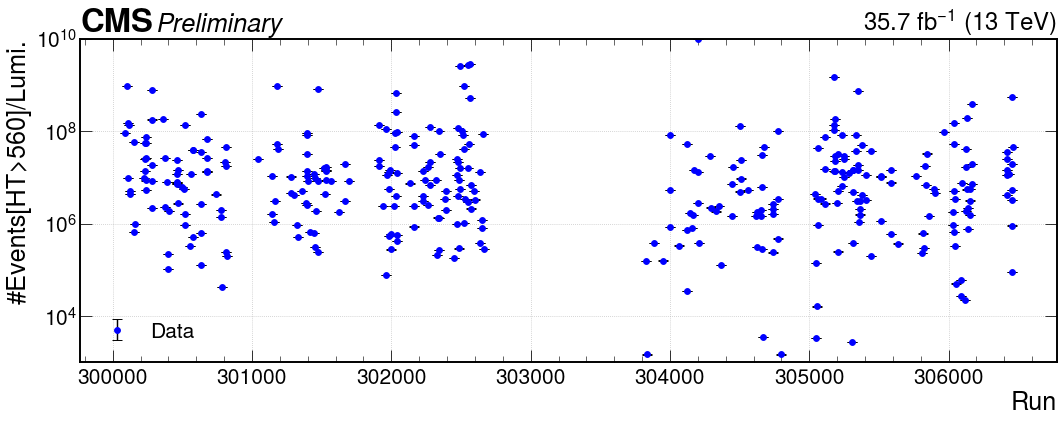

In [82]:
plt.rcParams['figure.figsize'] = [18, 6]
plot_label = 'run_Cluster'
year = '2017'
output_label="data18_events"
file_ext=".png"
temp = '4.0'
mPhi = '2.0'
decay = 'generic'
samples = ['data_'+year]
labels = ['Data 2017']

density = False

hep.cms.label(llabel='Preliminary', data=False, lumi=lumiLabel(year,scouting=True))
runList_2017 = [301046, 301141, 301142, 301161, 301165, 301179, 301180, 301183, 301281, 301283, 301298, 301323, 301330, 301359, 301384, 301391, 301392, 301393, 301396, 301397, 301398, 301399, 301417, 301447, 301448, 301449, 301450, 301461, 301472, 301475, 301476, 301519, 301524, 301529, 301530, 301531, 301532, 301567, 301627, 301664, 301665, 301694, 301912, 301913, 301914, 301941, 301959, 301960, 301970, 301984, 301985, 301986, 301987, 301997, 301998, 302019, 302448, 302026, 302029, 302031, 302033, 302034, 302037, 302038, 302040, 302041, 302042, 302043, 302131, 302159, 302163, 302165, 302166, 302225, 302228, 302229, 302240, 302262, 302263, 302277, 302279, 302280, 302322, 302328, 302337, 302342, 302343, 302344, 302350, 302388, 302392, 302393, 302472, 302473, 302474, 302475, 302476, 302479, 302484, 302485, 302492, 302493, 302494, 302509, 302513, 302522, 302523, 302525, 302526, 302548, 302551, 302553, 302554, 302555, 302563, 302565, 302572, 302573, 302596, 302597, 302634, 302635, 302651, 302654, 302661, 302663, 303825, 303832, 303838, 303885, 303948, 303998, 303999, 304000, 304062, 304119, 304120, 304125, 304144, 304158, 304169, 304170, 304199, 304200, 304204, 304209, 304291, 304292, 304333, 304354, 304366, 304446, 304447, 304451, 304505, 304506, 304507, 304508, 304562, 304616, 304625, 304626, 304654, 304655, 304661, 304662, 304663, 304671, 304672, 304737, 304738, 304739, 304740, 304776, 304777, 304778, 304797, 305044, 305045, 305046, 305059, 305062, 305063, 305064, 305081, 305112, 305113, 305114, 305178, 305179, 305180, 305181, 305182, 305183, 305184, 305186, 305188, 305202, 305204, 305207, 305208, 305234, 305236, 305237, 305247, 305248, 305252, 305282, 305310, 305311, 305312, 305313, 305314, 305336, 305338, 305341, 305349, 305350, 305351, 305358, 305364, 305365, 305366, 305376, 305377, 305405, 305406, 305440, 305441, 305516, 305517, 305518, 305586, 305589, 305590, 305636, 305766, 305809, 305814, 305821, 305832, 305840, 305842, 305862, 305898, 305902, 305967, 306029, 306030, 306036, 306037, 306038, 306041, 306042, 306048, 306049, 306051, 306091, 306092, 306095, 306121, 306122, 306125, 306126, 306134, 306135, 306138, 306139, 306153, 306154, 306155, 306169, 306170, 306171, 306418, 306419, 306420, 306422, 306423, 306432, 306454, 306455, 306456, 306457, 306458, 306459, 306460, 300087, 300105, 300106, 300107, 300117, 300122, 300123, 300155, 300156, 300157, 300226, 300233, 300234, 300235, 300236, 300237, 300238, 300239, 300240, 300280, 300281, 300282, 300283, 300284, 300364, 300372, 300375, 300389, 300399, 300400, 300401, 300459, 300461, 300462, 300463, 300464, 300466, 300467, 300497, 300514, 300515, 300516, 300517, 300558, 300560, 300574, 300575, 300576, 300631, 300632, 300633, 300635, 300636, 300673, 300674, 300675, 300676, 300742, 300777, 300780, 300785, 300806, 300811, 300812, 300816, 300817]
intLumis = np.array([0.004222224, 0.000939304, 0.096263888, 0.098076752, 0.015464523, 0.002048255, 0.014830088, 0.045298745, 0.018542081, 0.120005149, 0.15399253, 0.165060316, 0.06444294, 0.057278251, 0.09435398, 0.034574486, 0.110226143, 0.00260479, 0.003739861, 0.094047999, 0.000559291, 0.01228239, 0.067689348, 0.071877413, 0.048021203, 0.049332905, 0.019426093, 0.098121789, 0.138032774, 0.001558199, 0.107777845, 0.033366887, 0.04107832, 0.006578466, 0.014335108, 0.048371775, 0.062657289, 0.063339395, 0.131459419, 0.070386122, 0.068033935, 0.017576373, 0.038278525, 0.00595784, 0.035547414, 0.074506652, 0.275846203, 0.014257568, 0.022349098, 0.055474662, 0.060037889, 0.054356914, 0.122752521, 0.065075702, 0.217462642, 0.009112865, 0.307866591, 0.004651888, 0.015281544, 0.12852164, 0.005173654, 0.000483548, 6.0437e-05, 8.983e-06, 0.020954841, 0.007738133, 0.054983585, 0.020761524, 0.111634653, 0.016076609, 0.146312058, 0.006889986, 0.00151882, 0.11478847, 0.038240724, 0.067570786, 0.138868374, 0.075969816, 0.165383267, 0.053761113, 0.005862909, 0.012611393, 0.096870474, 0.093450403, 0.02037677, 0.006933228, 0.015318244, 0.068798124, 0.016492993, 0.126263558, 0.074911826, 0.157322303, 0.154748577, 0.060432748, 0.043413267, 9.9576e-05, 0.033417297, 0.068380572, 0.036414086, 0.173348266, 0.006787591, 0.00014171, 0.086352322, 0.00498704, 0.012202645, 0.000508555, 0.010748271, 0.134813248, 0.088305524, 0.015739562, 0.000103949, 0.037036843, 9.1438e-05, 0.001909607, 0.000320075, 0.000149416, 0.053765298, 0.187919165, 0.173172028, 0.14512342, 0.116389673, 0.184469238, 0.030035338, 0.063967438, 0.009465408, 0.134253685, 0.022834484, 0.321325968, 0.380035365, 0.400159045, 0.351609948, 0.073026071, 0.172738813, 0.010644324, 0.382104603, 0.020997149, 0.072288318, 0.338100566, 0.533880991, 0.37088468, 0.338518799, 0.075626313, 5.9034e-05, 0.088141923, 0.153181548, 0.116173536, 0.003372765, 0.347239887, 0.366646071, 0.068254535, 0.419018022, 0.016790734, 0.368514943, 0.00741569, 0.007711608, 0.119535842, 0.050591787, 0.24802459, 0.221933738, 0.253368597, 0.136309938, 0.002315882, 0.17359758, 0.229947014, 0.046163719, 0.04350901, 0.177083905, 0.308364239, 0.012167963, 0.024061358, 0.409354391, 0.001550956, 0.03985217, 0.009373711, 0.156559623, 0.266216593, 0.557402679, 0.067132644, 0.202352038, 0.108548626, 0.157786386, 0.001305638, 0.009565485, 0.380018945, 0.315140453, 0.400956804, 0.010930752, 0.085167818, 0.017181663, 0.003856497, 0.000554954, 0.000585574, 0.000951367, 0.077319804, 0.000103732, 0.122050118, 0.198329647, 0.207759559, 0.254512562, 0.318101281, 0.083056036, 0.012655354, 0.00648687, 0.337866398, 0.122425911, 0.25788253, 0.095039739, 0.044344542, 0.127514929, 0.047386625, 0.068271226, 0.170164197, 0.068334406, 0.066202888, 0.033111775, 0.151780463, 0.003880846, 0.003820111, 0.178341011, 0.049593829, 0.030414385, 0.248985048, 0.232273985, 0.032670779, 0.398851417, 0.159491167, 0.316024204, 0.08325334, 0.036615177, 0.170811889, 0.033973948, 0.233807313, 0.171033459, 0.162878243, 0.151936421, 0.525219671, 0.263689496, 0.045952441, 0.446803627, 0.24046332, 0.058021275, 0.251347322, 0.114870231, 0.202188598, 0.230935201, 0.154344858, 0.010507825, 0.009157238, 0.034967629, 7.2865e-05, 0.01220688, 0.044162104, 0.10000385, 0.100185074, 0.03203662, 0.075297556, 0.070670052, 0.060611342, 0.220128194, 0.049130689, 0.028670528, 0.040636078, 0.560771797, 0.029717428, 0.006957271, 0.329516189, 0.211381092, 0.101514714, 0.026435393, 0.334755794, 0.219491926, 0.066299041, 0.001135254, 0.035728272, 0.020778732, 0.018423612, 0.034221123, 0.03468471, 0.085778258, 0.033338319, 0.026851397, 0.001621957, 0.237025486, 0.006686619, 0.051452197, 0.307670838, 0.003722601, 0.012856183, 0.001261251, 0.019537401, 0.013369908, 0.006067243, 0.293521143, 0.101250159, 0.282029813, 0.011779517, 0.167472881, 0.115963157, 0.031640189, 0.014608522, 0.049530363, 0.046368318, 0.163752968, 0.050321407, 0.031288622, 0.047846177, 0.139408265, 0.001496696, 0.030814192, 0.005816356, 0.133886088, 0.003982633, 0.001983119, 0.024814757, 0.026869048, 0.004232691, 0.161513768, 0.116732915, 0.081507468, 0.023737911, 0.023357553, 0.03079347, 0.054223185, 0.121744279, 0.08052905, 0.040034684, 0.029355551, 0.238582156, 0.019603, 0.092323471, 0.119182107, 0.140271192, 0.024120096, 0.012558143, 0.278621069, 0.042706842, 0.004065109, 0.120792956, 0.041778495, 0.270292118, 0.005054887, 0.007854279, 0.002899315, 0.007291862, 0.083983676, 0.130414849, 0.079071792, 0.212773901, 0.054218346, 0.144699407, 0.014797894, 0.034740265, 0.099409519])
IntLumi17 = np.sum(intLumis)
print(f'total int lumi18: {IntLumi18}')
hBkg, hSignal, cSignal = [], [], []
lBkg, lSignal, cBkg = [], [], []
for label, sample in zip(labels, samples):
    if sample not in plots.keys(): continue
    print(sample)
    #h = plots[sample][plot_label][::2j]
    h = plots[sample][plot_label]
    if density:
        h = h/h.sum().value
    if 'mS' in sample: 
        hSignal.append(h)
        lSignal.append(label)
        cSignal.append(getColor(sample))
    else: 
        #hBkg.append(rebin_piecewise(h,np.arange(0,3500,50)))
        hBkg.append(h/100)
        lBkg.append(label)
        cBkg.append(getColor(sample))

bin_centers = h.axes.centers[0]
print(bin_centers[:20])
bin_centers_int = [int(center) for center in bin_centers]
#print(f'bin_centers len {len(bin_centers)}')

filtered_bin_centers = []
filtered_bin_counts = []

for i in range(len(bin_centers_int)):
    if bin_centers_int[i] in runList_2017:
        filtered_bin_centers.append(bin_centers_int[i])
        filtered_bin_counts.append(h.values()[i])

print(len(filtered_bin_centers) == len(runList_2017))
filtered_bin_centers = np.array(filtered_bin_centers)
filtered_bin_counts = np.array(filtered_bin_counts)

run_range_indices = np.where((filtered_bin_centers >= run_range_start) & (filtered_bin_centers <= run_range_end))[0]

bin_count_errors = np.sqrt(filtered_bin_counts)
intLumis_rel_errors = 0.02 * intLumis
bin_count_rel_errors = bin_count_errors / filtered_bin_counts


result_rel_errors = np.sqrt(bin_count_rel_errors**2 + (intLumis_rel_errors / intLumis)**2)
result = filtered_bin_counts / intLumis
mean_counts = np.mean(result)
std_counts = np.std(result)
print(mean_counts,std_counts)
#threshold = 1 * std_counts
#outlier_indices = np.where(np.abs(result - mean_counts) > threshold)[0]

lower_threshold = 3e6
upper_threshold = 3e7
outlier_indices = np.where((result < lower_threshold) | (result > upper_threshold))[0]
outlier_run_numbers = [runList_2017[i] for i in outlier_indices]
#outlier_intLumis = [intLumis[runList_2018.index(run)] for run in outlier_run_numbers]
outlier_intLumis = [intLumis[i] for i in outlier_indices]
print("Outlier Integrated Luminosities:")
for run, intLumi in zip(outlier_run_numbers, outlier_intLumis):
    print(f"Run {run}: {intLumi}")


bin_uncertainties = filtered_bin_counts * result_rel_errors
#print(bin_uncertainties[:10])
#print(result[:10])

total_outlier_runs = len(outlier_run_numbers)
total_runs = len(runList_2017)
sum_outlier_intLumis = sum(outlier_intLumis)
total_intLumi = np.sum(intLumis)
print("Total Outliers' Run Numbers:", total_outlier_runs)
print("Total Runs:", total_runs)
print("Sum of Outliers' Integrated Luminosities:", sum_outlier_intLumis)
print("Total Integrated Luminosity:", total_intLumi)


#plt.errorbar(filtered_bin_centers, filtered_bin_counts, yerr=bin_uncertainties, fmt='o', color='red', ecolor='black', capsize=5)
# Plot the data points
plt.errorbar(runList_2017, result, yerr=bin_uncertainties, fmt='o', color='blue', ecolor='black', capsize=5, label="Data")

# Plot the outliers in a different color
#plt.errorbar(outlier_run_numbers, result[outlier_indices], yerr=bin_uncertainties[outlier_indices], fmt='o', color='red', ecolor='black', capsize=5, label="Outliers [3e6 < y < 3e7]")

# Set the labels and limits
plt.xlabel("Run")
plt.ylabel("#Events[HT>560]/Lumi.")
plt.ylim(1e3, 1e10)
plt.yscale('log') 
plt.grid(True)
plt.legend(loc='best')
plt.show()


total int lumi18: 59.819519993
data_2018
[ 96041. 273674.  43549. 248422. 519140.]
[0.01391886 0.03970339 0.00645451 0.03714331 0.07898112]
['96041.00', '273674.00', '43549.00', '248422.00', '519140.00']
mean,std: (745727.7002096436, 857033.2159838832)
Outlier Run Numbers: [315420, 315648, 315705, 315840, 315973, 316153, 316186, 316199, 316200, 316241, 316469, 316569, 316613, 316667, 316766, 317182, 317291, 317320, 317392, 317435, 317527, 317626, 317640, 317641, 317650, 317661, 319337, 319524, 319579, 319639, 319756, 319910, 319991, 320804, 320917, 321051, 321149, 321167, 321218, 321305, 321396, 321414, 321457, 321475, 322106, 322118, 322179, 322204, 322222, 322319, 322324, 322332, 322480, 322617, 323525, 323755, 323778, 323790, 323940, 324021, 324201, 324245, 324293, 324747, 324841, 324878, 324970, 324980, 325022, 325170]
[ 1945.6593927   5498.42316582   895.63115198  4993.3774175
 10407.7699744  23596.8267567  12621.49524068 19458.80394044
 14246.45806474  1912.59661654]
[  96041.  2

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


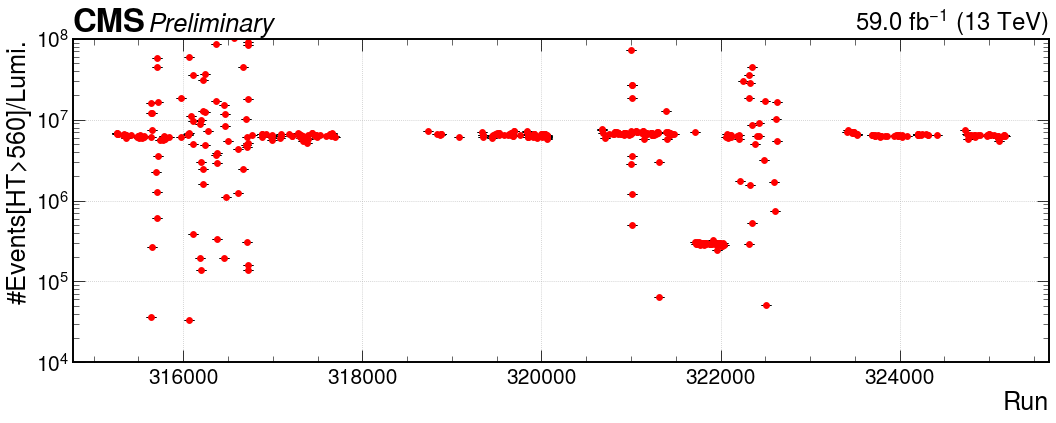

In [40]:
plt.rcParams['figure.figsize'] = [18, 6]
plot_label = 'run_Cluster'
year = '2018'
output_label="data18_events"
file_ext=".png"
temp = '4.0'
mPhi = '2.0'
decay = 'generic'
samples = ['data_'+year]
labels = ['Data 2018']

density = False

hep.cms.label(llabel='Preliminary', data=False, lumi=lumiLabel(year,scouting=True))
intLumis = np.array([0.013918864, 0.039703388, 0.006454507, 0.037143311, 0.078981117, 0.18006292, 0.093349061, 0.151930725, 0.118531849, 0.014489096, 0.10018276, 0.258566396, 0.190563067, 0.103438191, 0.002520994, 0.027983158, 0.103172328, 0.2368714, 0.036886267, 0.021968881, 0.008395188, 0.084134393, 0.010512485, 0.210579169, 0.001237309, 0.031431098, 0.063159684, 0.161090551, 0.191964439, 0.008018192, 0.015226137, 0.329958838, 0.119001932, 0.022853106, 0.158162019, 0.014739015, 0.132384757, 0.353734703, 0.023717251, 0.114011154, 0.121796189, 0.051799834, 0.106003338, 0.021848143, 0.173123579, 0.206215401, 0.098534603, 0.354111468, 0.278586191, 0.006146917, 0.018532205, 0.137197208, 0.170426968, 0.198479234, 0.000698283, 0.141359586, 0.081969483, 0.015161958, 0.020491266, 0.367994967, 0.256240431, 0.015153677, 0.512428751, 0.40196132, 0.00222618, 0.110093155, 0.075106131, 0.171479086, 0.088158861, 0.243232708, 0.048978441, 0.209319054, 0.283682524, 0.053194396, 0.02969808, 0.026413888, 0.053916088, 0.004611485, 0.00198607, 0.003336673, 0.008222157, 0.175280166, 0.009607083, 0.326273293, 0.148877856, 0.116869505, 0.066237151, 0.40122003, 0.485569309, 0.189247294, 0.031466211, 0.049127397, 0.27938129, 0.042140099, 0.114304211, 0.143933326, 0.095461886, 0.003000536, 0.061792771, 0.063385896, 0.090222571, 0.032449482, 0.041732114, 0.003260078, 0.134760529, 0.009621132, 0.455682721, 0.561052774, 0.216379022, 0.111051479, 0.036513199, 0.04441724, 0.17254611, 0.074473713, 0.0047771, 0.186194514, 0.00784426, 0.243200389, 0.212904926, 0.406207245, 0.051172376, 0.125489076, 0.065891594, 0.27402887, 0.085006647, 0.123798905, 0.053514561, 0.460767275, 0.013631072, 0.06574976, 0.140596348, 0.024139434, 0.022451239, 0.002717287, 0.490656629, 0.360612921, 0.049709578, 0.02576115, 0.007937242, 0.160355997, 0.181128073, 0.452099029, 0.111116517, 0.52893954, 0.261179265, 0.268315019, 0.033881916, 0.193211576, 0.255996426, 0.375651112, 0.153301355, 0.117851782, 0.228786857, 0.002792197, 0.013229261, 0.091854514, 0.099565217, 0.046587025, 0.160548836, 0.016371875, 0.232388818, 0.210856031, 0.005006475, 0.040843828, 0.249173726, 0.207045612, 0.052015625, 0.017212101, 0.020314797, 0.090959188, 0.456701499, 0.069659575, 0.058410906, 0.818490479, 0.070596043, 0.409340341, 0.086471826, 0.051824096, 0.061716393, 0.021787667, 0.095424824, 0.016052913, 0.060561287, 0.036295265, 0.490204543, 0.04971897, 0.02028033, 0.000903537, 0.019081513, 0.173552091, 0.001137038, 0.071203488, 0.053716327, 0.018295828, 0.001120242, 0.304865167, 0.013437223, 0.012566235, 0.00687986, 0.086802323, 0.094417188, 0.017468907, 0.065935971, 0.282111415, 0.065586502, 0.182675815, 0.050203468, 0.11414014, 0.074676692, 0.061138036, 0.01806069, 0.098834607, 0.126440979, 0.030113234, 0.050085703, 0.21871239, 0.008200272, 0.177428533, 0.040908654, 0.015725006, 0.018270053, 0.006956471, 0.022166104, 0.064866603, 0.227086186, 0.064592146, 0.033749177, 0.130855199, 0.0695798, 0.116683595, 0.319033307, 0.000348408, 0.106230704, 0.060432928, 0.149814403, 0.08002531, 0.164020053, 0.092366066, 0.14104305, 0.050468155, 0.118065454, 0.039644924, 0.146559259, 0.033490847, 0.052859822, 0.037521088, 0.004926672, 0.104361547, 0.00950019, 0.006635005, 0.477801746, 0.024013428, 0.051965819, 0.210460582, 0.078320032, 0.015638078, 0.038407528, 0.025796208, 0.004974448, 0.048288004, 0.046906478, 0.019195813, 0.051704227, 0.202763102, 0.014732928, 0.057206632, 0.02894883, 0.311577321, 0.1254955, 0.172706969, 0.147136741, 0.049557775, 0.058668389, 0.015831462, 0.120346156, 0.185307787, 0.078957429, 0.008164269, 0.141976762, 0.11694937, 0.433916174, 0.000389898, 0.003380938, 0.274126989, 0.151674214, 0.023034517, 0.282500585, 0.181189493, 0.005906206, 0.022670378, 0.014523657, 0.00605792, 0.231852526, 0.00166912, 0.119780879, 0.020610486, 0.201490287, 0.011876596, 0.601904551, 0.049689179, 0.000473243, 0.060265688, 0.026586081, 0.365018162, 0.052262513, 0.380801771, 0.142213696, 0.055907925, 0.016577963, 0.042731538, 0.180882406, 0.138441929, 0.482761896, 0.021013094, 0.471912521, 0.017235399, 0.08437814, 0.102670881, 0.344691952, 0.02366129, 0.213437556, 0.03751759, 0.146153421, 0.021058783, 0.043723139, 0.00480724, 0.010304681, 0.058616866, 0.036058295, 0.113674716, 0.068009102, 0.120243809, 0.005120206, 0.148473508, 0.138015405, 0.032068958, 0.24804289, 0.115961844, 0.074190773, 0.049809506, 0.090170659, 0.04137582, 0.276941304, 0.145314737, 0.340569377, 0.261219957, 0.001488823, 0.101007248, 0.007304486, 0.132126192, 0.358666936, 0.145783784, 0.384021716, 0.081031948, 0.001146111, 0.006669868, 0.452968644, 0.013692424, 0.008235478, 0.232599447, 0.14024476, 0.281859052, 0.04078972, 0.268228934, 0.469749616, 0.084335391, 0.311166308, 0.335273291, 0.092744223, 0.4203577, 0.01924591, 0.055502234, 0.292464047, 0.069259748, 0.313995681, 0.414112209, 0.033876145, 0.234583361, 0.178729681, 0.16995846, 0.235401386, 0.227638504, 0.1093374, 0.287515085, 0.00222889, 0.094350581, 0.024109024, 0.002693892, 0.089623887, 0.136645564, 0.050945617, 0.006204142, 0.021037074, 0.080200218, 0.075495647, 0.019315198, 0.054519627, 0.077807771, 0.01419408, 0.154166173, 0.186197456, 0.005823197, 0.027375069, 0.032346526, 0.172934401, 0.242648282, 0.064950697, 0.040083352, 0.088847729, 0.145958433, 0.11853309, 0.014606471, 0.246903637, 0.296639246, 0.046767743, 0.270935867, 0.276737455, 0.016056603, 0.155038205, 0.09551318, 0.426706208, 0.01514093, 0.014398816, 0.021951778, 0.067731897, 0.056791397, 0.128791789, 0.252485124, 0.127785561, 0.2425828, 0.362857357, 0.039241165, 0.02296346, 0.017522834, 0.004054579, 0.016078704, 0.07499178, 0.417199145, 0.513035432, 0.070436667, 0.099840257, 0.199727029, 0.014796593, 0.308246151, 0.030065379, 0.087679541, 0.046770044, 0.018782623, 0.185797535, 0.245007227, 0.085856011, 0.027721689, 0.301008029, 0.068552956, 0.403016934, 0.050228783, 0.479465581, 0.51329496, 0.03858676, 0.114235368, 0.003883479, 0.094663582, 0.119138042, 0.433385704, 0.120048335, 0.017770097, 0.002038523, 0.139170738, 0.074467205, 0.118270296, 0.003259474, 0.085216684, 0.061439969, 0.004288854, 0.00557762, 0.263142487, 0.067635724])
runList_2018 = [315259, 315264, 315265, 315267, 315270, 315322, 315339, 315357, 315361, 315363, 315366, 315420, 315488, 315489, 315490, 315506, 315510, 315512, 315543, 315555, 315556, 315557, 315640, 315721, 315641, 315642, 315644, 315645, 315646, 315647, 315648, 315689, 315690, 315702, 315703, 315704, 315705, 315713, 315741, 315764, 315770, 315784, 315785, 315786, 315790, 315800, 315801, 315840, 315973, 316061, 315974, 316058, 316059, 316060, 316062, 316082, 316110, 316111, 316113, 316114, 316153, 316186, 316187, 316199, 316200, 316201, 316202, 316216, 316217, 316218, 316219, 316239, 316240, 316241, 316271, 316361, 316362, 316363, 316377, 316378, 316379, 316380, 316455, 316457, 316469, 316470, 316472, 316505, 316569, 316590, 316613, 316615, 316666, 316667, 316700, 316701, 316702, 316715, 316716, 316717, 316718, 316719, 316720, 316721, 316722, 316723, 316758, 316766, 316876, 316877, 316879, 316928, 316985, 316993, 316994, 316995, 317080, 317087, 317089, 317182, 317212, 317213, 317279, 317291, 317292, 317297, 317319, 317320, 317338, 317339, 317340, 317382, 317383, 317391, 317392, 317435, 317438, 317475, 317478, 317484, 317488, 317527, 317591, 317626, 317640, 317641, 317648, 317649, 317650, 317661, 317663, 317683, 317696, 318733, 318828, 318872, 318874, 318876, 318877, 319077, 319337, 319347, 319348, 319349, 319449, 319450, 319456, 319459, 319486, 319503, 319524, 319526, 319528, 319579, 319625, 319639, 319656, 319657, 319658, 319659, 319678, 319687, 319697, 319698, 319756, 319840, 319841, 319847, 319848, 319849, 319851, 319853, 319854, 319908, 319909, 319910, 319912, 319913, 319914, 319915, 319941, 319942, 319950, 319991, 319992, 319993, 320002, 320006, 320010, 320011, 320012, 320023, 320024, 320025, 320026, 320038, 320039, 320040, 320059, 320060, 320061, 320062, 320063, 320064, 320065, 320673, 320674, 320688, 320712, 320757, 320804, 320807, 320809, 320821, 320822, 320823, 320824, 320838, 320840, 320841, 320853, 320854, 320855, 320856, 320857, 320858, 320859, 320887, 320888, 320916, 320917, 320920, 320933, 320934, 320936, 320941, 320980, 320995, 321012, 320996, 321004, 321005, 321006, 321007, 321009, 321010, 321011, 321051, 321055, 321067, 321068, 321069, 321119, 321121, 321122, 321124, 321126, 321134, 321138, 321140, 321149, 321165, 321166, 321167, 321177, 321178, 321218, 321219, 321221, 321230, 321231, 321232, 321233, 321262, 321283, 321294, 321295, 321296, 321305, 321393, 321311, 321312, 321313, 321396, 321397, 321414, 321415, 321431, 321432, 321433, 321434, 321436, 321457, 321461, 321475, 321710, 321712, 321730, 321732, 321735, 321755, 321758, 321760, 321773, 321774, 321775, 321776, 321777, 321778, 321780, 321781, 321813, 321815, 321817, 321818, 321820, 321831, 321832, 321833, 321834, 321879, 321880, 321887, 321908, 321909, 321917, 321919, 321933, 321960, 321961, 321973, 321975, 321988, 321990, 322013, 322014, 322022, 322040, 322057, 322068, 322079, 322106, 322113, 322118, 322179, 322201, 322204, 322625, 322222, 322252, 322317, 322319, 322322, 322324, 322332, 322348, 322355, 322356, 322381, 322407, 322430, 322431, 322480, 322492, 322510, 322599, 322602, 322603, 322605, 322617, 322633, 323414, 323423, 323470, 323471, 323472, 323473, 323474, 323475, 323487, 323488, 323492, 323493, 323495, 323524, 323525, 323526, 323693, 323696, 323702, 323725, 323726, 323727, 323755, 323775, 323778, 323790, 323794, 323841, 323857, 323940, 323954, 323976, 323978, 323980, 323983, 323997, 324021, 324022, 324077, 324201, 324202, 324205, 324206, 324207, 324209, 324237, 324245, 324293, 324315, 324318, 324420, 324729, 324747, 324764, 324765, 324769, 324772, 324785, 324791, 324835, 324840, 324841, 324846, 324878, 324897, 324970, 324980, 324997, 324998, 324999, 325000, 325001, 325022, 325057, 325097, 325098, 325099, 325100, 325101, 325110, 325117, 325159, 325168, 325169, 325170, 325172]
IntLumi18 = np.sum(intLumis)
print(f'total int lumi18: {IntLumi18}')
hBkg, hSignal, cSignal = [], [], []
lBkg, lSignal, cBkg = [], [], []
for label, sample in zip(labels, samples):
    if sample not in plots.keys(): continue
    print(sample)
    #h = plots[sample][plot_label][::2j]
    h = plots[sample][plot_label]
    if density:
        h = h/h.sum().value
    if 'mS' in sample: 
        hSignal.append(h)
        lSignal.append(label)
        cSignal.append(getColor(sample))
    else: 
        #hBkg.append(rebin_piecewise(h,np.arange(0,3500,50)))
        hBkg.append(h/100)
        lBkg.append(label)
        cBkg.append(getColor(sample))

bin_centers = h.axes.centers[0]
bin_centers_int = [int(center) for center in bin_centers]
#print(f'bin_centers len {len(bin_centers)}')

# Filter the bin centers and bin counts based on the run numbers
filtered_bin_centers = []
filtered_bin_counts = []

for i in range(len(bin_centers_int)):
    if bin_centers_int[i] in runList_2018:
        filtered_bin_centers.append(bin_centers_int[i])
        filtered_bin_counts.append(h.values()[i])

filtered_bin_centers = np.array(filtered_bin_centers)
filtered_bin_counts = np.array(filtered_bin_counts)


print(filtered_bin_counts[:5])
print(intLumis[:5])
#filtered_bin_counts /= intLumis
print([f"{count:.2f}" for count in filtered_bin_counts[:5]])

mean_counts = np.mean(filtered_bin_counts)
std_counts = np.std(filtered_bin_counts)
print(f'mean,std: {mean_counts,std_counts}')
threshold = 1 * std_counts
outlier_indices = np.where(np.abs(filtered_bin_counts - mean_counts) > threshold)[0]
outlier_run_numbers = [runList_2018[i] for i in outlier_indices]
print("Outlier Run Numbers:", outlier_run_numbers)

x_values = np.arange(len(filtered_bin_counts))
# L1 seeded runs (321712-322040)

run_range_start = 321712
run_range_end = 322040

# Find the indices corresponding to the run range
run_range_indices = np.where((filtered_bin_centers >= run_range_start) & (filtered_bin_centers <= run_range_end))[0]




bin_count_errors = np.sqrt(filtered_bin_counts)
intLumis_rel_errors = 0.02 * intLumis
bin_count_rel_errors = bin_count_errors / filtered_bin_counts


result_rel_errors = np.sqrt(bin_count_rel_errors**2 + (intLumis_rel_errors / intLumis)**2)
result = filtered_bin_counts / intLumis


bin_uncertainties = filtered_bin_counts * result_rel_errors
print(bin_uncertainties[:10])
print(filtered_bin_counts[:10])

bin_centers = np.arange(len(filtered_bin_counts)) + 0.5

plt.errorbar(filtered_bin_centers, result, yerr=result_rel_errors, fmt='o', color='red', ecolor='black', capsize=5)



plt.xlabel("Run")
#plt.xlim(10)
plt.ylabel("#Events[HT>560]/Lumi.")
plt.ylim(1e4,1e8)
plt.yscale('log') 
plt.grid(True)
plt.legend(loc='best')
plt.show()


total int lumi18: 59.819519993
data_2018
<class 'hist.hist.Hist'>
[ 96041. 273674.  43549. 248422. 519140.]
[0.01391886 0.03970339 0.00645451 0.03714331 0.07898112]
['6900060.23', '6892963.39', '6747068.37', '6688202.89', '6572963.51']
mean,std: (14434455.642518826, 71422208.16672096)
Outlier Run Numbers: [316200, 316715, 321311, 322510, 322603]


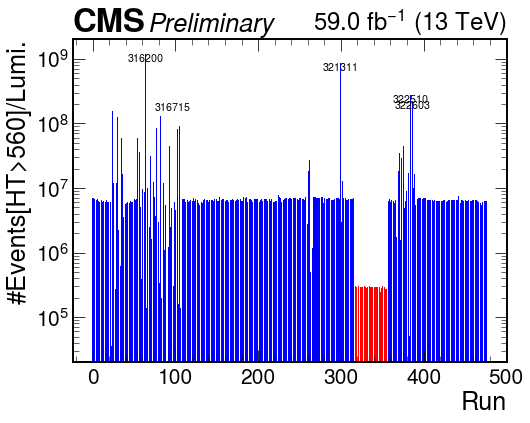

In [34]:
plt.rcParams['figure.figsize'] = [8, 6]
plot_label = 'run_Cluster'
year = '2018'
output_label="Nov12_noHTcut_rebin_lowHTremove200to300"
file_ext=".png"
temp = '4.0'
mPhi = '2.0'
decay = 'generic'
#samples = ['TTJets_'+year, 'QCD_HT_'+year]
samples = ['data_'+year]
#'mS125_T'+temp+'_mPhi'+mPhi+'_'+decay+'_'+year,
#            'mS400_T'+temp+'_mPhi'+mPhi+'_'+decay+'_'+year,
#           'mS700_T'+temp+'_mPhi'+mPhi+'_'+decay+'_'+year,
#            'mS1000_T'+temp+'_mPhi'+mPhi+'_'+decay+'_'+year]
labels = ['Data 2017']
#          r'$m_{S}=125$ GeV',r'$m_{S}=400$ GeV',r'$m_{S}=700$ GeV',r'$m_{S}=1000$ GeV']
density = False

hep.cms.label(llabel='Preliminary', data=False, lumi=lumiLabel(year,scouting=True))
intLumis = np.array([0.013918864, 0.039703388, 0.006454507, 0.037143311, 0.078981117, 0.18006292, 0.093349061, 0.151930725, 0.118531849, 0.014489096, 0.10018276, 0.258566396, 0.190563067, 0.103438191, 0.002520994, 0.027983158, 0.103172328, 0.2368714, 0.036886267, 0.021968881, 0.008395188, 0.084134393, 0.010512485, 0.210579169, 0.001237309, 0.031431098, 0.063159684, 0.161090551, 0.191964439, 0.008018192, 0.015226137, 0.329958838, 0.119001932, 0.022853106, 0.158162019, 0.014739015, 0.132384757, 0.353734703, 0.023717251, 0.114011154, 0.121796189, 0.051799834, 0.106003338, 0.021848143, 0.173123579, 0.206215401, 0.098534603, 0.354111468, 0.278586191, 0.006146917, 0.018532205, 0.137197208, 0.170426968, 0.198479234, 0.000698283, 0.141359586, 0.081969483, 0.015161958, 0.020491266, 0.367994967, 0.256240431, 0.015153677, 0.512428751, 0.40196132, 0.00222618, 0.110093155, 0.075106131, 0.171479086, 0.088158861, 0.243232708, 0.048978441, 0.209319054, 0.283682524, 0.053194396, 0.02969808, 0.026413888, 0.053916088, 0.004611485, 0.00198607, 0.003336673, 0.008222157, 0.175280166, 0.009607083, 0.326273293, 0.148877856, 0.116869505, 0.066237151, 0.40122003, 0.485569309, 0.189247294, 0.031466211, 0.049127397, 0.27938129, 0.042140099, 0.114304211, 0.143933326, 0.095461886, 0.003000536, 0.061792771, 0.063385896, 0.090222571, 0.032449482, 0.041732114, 0.003260078, 0.134760529, 0.009621132, 0.455682721, 0.561052774, 0.216379022, 0.111051479, 0.036513199, 0.04441724, 0.17254611, 0.074473713, 0.0047771, 0.186194514, 0.00784426, 0.243200389, 0.212904926, 0.406207245, 0.051172376, 0.125489076, 0.065891594, 0.27402887, 0.085006647, 0.123798905, 0.053514561, 0.460767275, 0.013631072, 0.06574976, 0.140596348, 0.024139434, 0.022451239, 0.002717287, 0.490656629, 0.360612921, 0.049709578, 0.02576115, 0.007937242, 0.160355997, 0.181128073, 0.452099029, 0.111116517, 0.52893954, 0.261179265, 0.268315019, 0.033881916, 0.193211576, 0.255996426, 0.375651112, 0.153301355, 0.117851782, 0.228786857, 0.002792197, 0.013229261, 0.091854514, 0.099565217, 0.046587025, 0.160548836, 0.016371875, 0.232388818, 0.210856031, 0.005006475, 0.040843828, 0.249173726, 0.207045612, 0.052015625, 0.017212101, 0.020314797, 0.090959188, 0.456701499, 0.069659575, 0.058410906, 0.818490479, 0.070596043, 0.409340341, 0.086471826, 0.051824096, 0.061716393, 0.021787667, 0.095424824, 0.016052913, 0.060561287, 0.036295265, 0.490204543, 0.04971897, 0.02028033, 0.000903537, 0.019081513, 0.173552091, 0.001137038, 0.071203488, 0.053716327, 0.018295828, 0.001120242, 0.304865167, 0.013437223, 0.012566235, 0.00687986, 0.086802323, 0.094417188, 0.017468907, 0.065935971, 0.282111415, 0.065586502, 0.182675815, 0.050203468, 0.11414014, 0.074676692, 0.061138036, 0.01806069, 0.098834607, 0.126440979, 0.030113234, 0.050085703, 0.21871239, 0.008200272, 0.177428533, 0.040908654, 0.015725006, 0.018270053, 0.006956471, 0.022166104, 0.064866603, 0.227086186, 0.064592146, 0.033749177, 0.130855199, 0.0695798, 0.116683595, 0.319033307, 0.000348408, 0.106230704, 0.060432928, 0.149814403, 0.08002531, 0.164020053, 0.092366066, 0.14104305, 0.050468155, 0.118065454, 0.039644924, 0.146559259, 0.033490847, 0.052859822, 0.037521088, 0.004926672, 0.104361547, 0.00950019, 0.006635005, 0.477801746, 0.024013428, 0.051965819, 0.210460582, 0.078320032, 0.015638078, 0.038407528, 0.025796208, 0.004974448, 0.048288004, 0.046906478, 0.019195813, 0.051704227, 0.202763102, 0.014732928, 0.057206632, 0.02894883, 0.311577321, 0.1254955, 0.172706969, 0.147136741, 0.049557775, 0.058668389, 0.015831462, 0.120346156, 0.185307787, 0.078957429, 0.008164269, 0.141976762, 0.11694937, 0.433916174, 0.000389898, 0.003380938, 0.274126989, 0.151674214, 0.023034517, 0.282500585, 0.181189493, 0.005906206, 0.022670378, 0.014523657, 0.00605792, 0.231852526, 0.00166912, 0.119780879, 0.020610486, 0.201490287, 0.011876596, 0.601904551, 0.049689179, 0.000473243, 0.060265688, 0.026586081, 0.365018162, 0.052262513, 0.380801771, 0.142213696, 0.055907925, 0.016577963, 0.042731538, 0.180882406, 0.138441929, 0.482761896, 0.021013094, 0.471912521, 0.017235399, 0.08437814, 0.102670881, 0.344691952, 0.02366129, 0.213437556, 0.03751759, 0.146153421, 0.021058783, 0.043723139, 0.00480724, 0.010304681, 0.058616866, 0.036058295, 0.113674716, 0.068009102, 0.120243809, 0.005120206, 0.148473508, 0.138015405, 0.032068958, 0.24804289, 0.115961844, 0.074190773, 0.049809506, 0.090170659, 0.04137582, 0.276941304, 0.145314737, 0.340569377, 0.261219957, 0.001488823, 0.101007248, 0.007304486, 0.132126192, 0.358666936, 0.145783784, 0.384021716, 0.081031948, 0.001146111, 0.006669868, 0.452968644, 0.013692424, 0.008235478, 0.232599447, 0.14024476, 0.281859052, 0.04078972, 0.268228934, 0.469749616, 0.084335391, 0.311166308, 0.335273291, 0.092744223, 0.4203577, 0.01924591, 0.055502234, 0.292464047, 0.069259748, 0.313995681, 0.414112209, 0.033876145, 0.234583361, 0.178729681, 0.16995846, 0.235401386, 0.227638504, 0.1093374, 0.287515085, 0.00222889, 0.094350581, 0.024109024, 0.002693892, 0.089623887, 0.136645564, 0.050945617, 0.006204142, 0.021037074, 0.080200218, 0.075495647, 0.019315198, 0.054519627, 0.077807771, 0.01419408, 0.154166173, 0.186197456, 0.005823197, 0.027375069, 0.032346526, 0.172934401, 0.242648282, 0.064950697, 0.040083352, 0.088847729, 0.145958433, 0.11853309, 0.014606471, 0.246903637, 0.296639246, 0.046767743, 0.270935867, 0.276737455, 0.016056603, 0.155038205, 0.09551318, 0.426706208, 0.01514093, 0.014398816, 0.021951778, 0.067731897, 0.056791397, 0.128791789, 0.252485124, 0.127785561, 0.2425828, 0.362857357, 0.039241165, 0.02296346, 0.017522834, 0.004054579, 0.016078704, 0.07499178, 0.417199145, 0.513035432, 0.070436667, 0.099840257, 0.199727029, 0.014796593, 0.308246151, 0.030065379, 0.087679541, 0.046770044, 0.018782623, 0.185797535, 0.245007227, 0.085856011, 0.027721689, 0.301008029, 0.068552956, 0.403016934, 0.050228783, 0.479465581, 0.51329496, 0.03858676, 0.114235368, 0.003883479, 0.094663582, 0.119138042, 0.433385704, 0.120048335, 0.017770097, 0.002038523, 0.139170738, 0.074467205, 0.118270296, 0.003259474, 0.085216684, 0.061439969, 0.004288854, 0.00557762, 0.263142487, 0.067635724])
runList_2018 = [315259, 315264, 315265, 315267, 315270, 315322, 315339, 315357, 315361, 315363, 315366, 315420, 315488, 315489, 315490, 315506, 315510, 315512, 315543, 315555, 315556, 315557, 315640, 315721, 315641, 315642, 315644, 315645, 315646, 315647, 315648, 315689, 315690, 315702, 315703, 315704, 315705, 315713, 315741, 315764, 315770, 315784, 315785, 315786, 315790, 315800, 315801, 315840, 315973, 316061, 315974, 316058, 316059, 316060, 316062, 316082, 316110, 316111, 316113, 316114, 316153, 316186, 316187, 316199, 316200, 316201, 316202, 316216, 316217, 316218, 316219, 316239, 316240, 316241, 316271, 316361, 316362, 316363, 316377, 316378, 316379, 316380, 316455, 316457, 316469, 316470, 316472, 316505, 316569, 316590, 316613, 316615, 316666, 316667, 316700, 316701, 316702, 316715, 316716, 316717, 316718, 316719, 316720, 316721, 316722, 316723, 316758, 316766, 316876, 316877, 316879, 316928, 316985, 316993, 316994, 316995, 317080, 317087, 317089, 317182, 317212, 317213, 317279, 317291, 317292, 317297, 317319, 317320, 317338, 317339, 317340, 317382, 317383, 317391, 317392, 317435, 317438, 317475, 317478, 317484, 317488, 317527, 317591, 317626, 317640, 317641, 317648, 317649, 317650, 317661, 317663, 317683, 317696, 318733, 318828, 318872, 318874, 318876, 318877, 319077, 319337, 319347, 319348, 319349, 319449, 319450, 319456, 319459, 319486, 319503, 319524, 319526, 319528, 319579, 319625, 319639, 319656, 319657, 319658, 319659, 319678, 319687, 319697, 319698, 319756, 319840, 319841, 319847, 319848, 319849, 319851, 319853, 319854, 319908, 319909, 319910, 319912, 319913, 319914, 319915, 319941, 319942, 319950, 319991, 319992, 319993, 320002, 320006, 320010, 320011, 320012, 320023, 320024, 320025, 320026, 320038, 320039, 320040, 320059, 320060, 320061, 320062, 320063, 320064, 320065, 320673, 320674, 320688, 320712, 320757, 320804, 320807, 320809, 320821, 320822, 320823, 320824, 320838, 320840, 320841, 320853, 320854, 320855, 320856, 320857, 320858, 320859, 320887, 320888, 320916, 320917, 320920, 320933, 320934, 320936, 320941, 320980, 320995, 321012, 320996, 321004, 321005, 321006, 321007, 321009, 321010, 321011, 321051, 321055, 321067, 321068, 321069, 321119, 321121, 321122, 321124, 321126, 321134, 321138, 321140, 321149, 321165, 321166, 321167, 321177, 321178, 321218, 321219, 321221, 321230, 321231, 321232, 321233, 321262, 321283, 321294, 321295, 321296, 321305, 321393, 321311, 321312, 321313, 321396, 321397, 321414, 321415, 321431, 321432, 321433, 321434, 321436, 321457, 321461, 321475, 321710, 321712, 321730, 321732, 321735, 321755, 321758, 321760, 321773, 321774, 321775, 321776, 321777, 321778, 321780, 321781, 321813, 321815, 321817, 321818, 321820, 321831, 321832, 321833, 321834, 321879, 321880, 321887, 321908, 321909, 321917, 321919, 321933, 321960, 321961, 321973, 321975, 321988, 321990, 322013, 322014, 322022, 322040, 322057, 322068, 322079, 322106, 322113, 322118, 322179, 322201, 322204, 322625, 322222, 322252, 322317, 322319, 322322, 322324, 322332, 322348, 322355, 322356, 322381, 322407, 322430, 322431, 322480, 322492, 322510, 322599, 322602, 322603, 322605, 322617, 322633, 323414, 323423, 323470, 323471, 323472, 323473, 323474, 323475, 323487, 323488, 323492, 323493, 323495, 323524, 323525, 323526, 323693, 323696, 323702, 323725, 323726, 323727, 323755, 323775, 323778, 323790, 323794, 323841, 323857, 323940, 323954, 323976, 323978, 323980, 323983, 323997, 324021, 324022, 324077, 324201, 324202, 324205, 324206, 324207, 324209, 324237, 324245, 324293, 324315, 324318, 324420, 324729, 324747, 324764, 324765, 324769, 324772, 324785, 324791, 324835, 324840, 324841, 324846, 324878, 324897, 324970, 324980, 324997, 324998, 324999, 325000, 325001, 325022, 325057, 325097, 325098, 325099, 325100, 325101, 325110, 325117, 325159, 325168, 325169, 325170, 325172]
IntLumi18 = np.sum(intLumis)
print(f'total int lumi18: {IntLumi18}')
hBkg, hSignal, cSignal = [], [], []
lBkg, lSignal, cBkg = [], [], []
for label, sample in zip(labels, samples):
    if sample not in plots.keys(): continue
    print(sample)
    #h = plots[sample][plot_label][::2j]
    h = plots[sample][plot_label]
    if density:
        h = h/h.sum().value
    if 'mS' in sample: 
        hSignal.append(h)
        lSignal.append(label)
        cSignal.append(getColor(sample))
    else: 
        #hBkg.append(rebin_piecewise(h,np.arange(0,3500,50)))
        hBkg.append(h)
        lBkg.append(label)
        cBkg.append(getColor(sample))


#print(h.to_numpy())
#events = h.to_numpy()
# print(events[1])
# print(len(intLumis))
# print(type(events[0]))
#print(h.axes.value)
#events_list = np.array(events)
# events_list[0] = events_list[0] / intLumis
#print(events_list[0])

#events_divided = tuple(events_list)
print(type(h))

# hep.histplot(h, yerr=True, label=lBkg, color=cBkg , alpha=1, stack=True) 
# #hep.histplot(hSignal, yerr=True, label=lSignal, color=cSignal, stack=False) 

# # tweak these by hand, as needed
# plt.ylim(1e5,2e11)
plt.yscale('log')
# plt.xlim(315258,325173) #9914, 315258, 325172
# plt.legend(loc='best')

# # save and show
# #if saveToAN: plt.savefig(AN_label.format("HT_"+year))
# plt.savefig(output_label+plot_label+"_"+year+file_ext,transparent=True)
# # plt.show()
bin_centers = h.axes.centers[0]
bin_centers_int = [int(center) for center in bin_centers]
#print(f'bin_centers len {len(bin_centers)}')

# Filter the bin centers and bin counts based on the run numbers
filtered_bin_centers = []
filtered_bin_counts = []

for i in range(len(bin_centers_int)):
    if bin_centers_int[i] in runList_2018:
        filtered_bin_centers.append(bin_centers_int[i])
        filtered_bin_counts.append(h.values()[i])

# print("filtered_bin_centers:", filtered_bin_centers)
# print(f'runList: {runList_2018}')
# print(f'yields: {filtered_bin_counts}')
# print("Length of filtered_bin_counts:", len(filtered_bin_counts))
# print(f'len runList: {len(runList_2018)}')
# print(f'len lumis: {len(intLumis)}')
# nonzero_indices = np.nonzero(filtered_bin_counts)[0]
# print("Indices of non-zero elements in filtered_bin_counts:", nonzero_indices)
# runList_nonzero = [runList_2018[i] for i in nonzero_indices]
# print("Run numbers with non-zero elements in filtered_bin_counts:", runList_nonzero)
#hem veto runs>319077

# Convert filtered_bin_centers and filtered_bin_counts to NumPy arrays
filtered_bin_centers = np.array(filtered_bin_centers)
filtered_bin_counts = np.array(filtered_bin_counts)

print(filtered_bin_counts[:5])
print(intLumis[:5])
filtered_bin_counts /= intLumis
print([f"{count:.2f}" for count in filtered_bin_counts[:5]])

mean_counts = np.mean(filtered_bin_counts)
std_counts = np.std(filtered_bin_counts)
print(f'mean,std: {mean_counts,std_counts}')
threshold = 2 * std_counts
outlier_indices = np.where(np.abs(filtered_bin_counts - mean_counts) > threshold)[0]
outlier_run_numbers = [runList_2018[i] for i in outlier_indices]
print("Outlier Run Numbers:", outlier_run_numbers)

x_values = np.arange(len(filtered_bin_counts))
# L1 seeded runs (321712-322040)

run_range_start = 321712
run_range_end = 322040

# Find the indices corresponding to the run range
run_range_indices = np.where((filtered_bin_centers >= run_range_start) & (filtered_bin_centers <= run_range_end))[0]

plt.bar(x_values, filtered_bin_counts, color='blue')
for i in run_range_indices:
    plt.bar(x_values[i], filtered_bin_counts[i], color='red')


#plt.bar(x_values, filtered_bin_counts)
plt.xlabel("Run")
plt.ylabel("#Events[HT>560]/Lumi.")

for i in outlier_indices:
    plt.text(x_values[i], filtered_bin_counts[i], str(runList_2018[i]), ha='center', va='top', fontsize=11)
        
plt.show()


data_2018


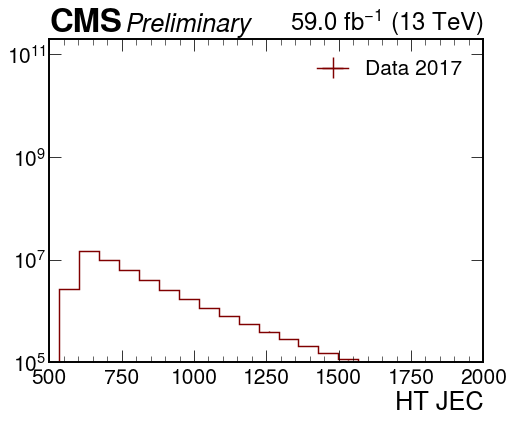

In [98]:
plt.rcParams['figure.figsize'] = [8, 6]
plot_label = 'ht_JEC_Cluster'
year = '2018'
output_label="Nov12_noHTcut_rebin_lowHTremove200to300"
file_ext=".png"
temp = '4.0'
mPhi = '2.0'
decay = 'generic'
#samples = ['TTJets_'+year, 'QCD_HT_'+year]
samples = ['data_'+year]
#'mS125_T'+temp+'_mPhi'+mPhi+'_'+decay+'_'+year,
#            'mS400_T'+temp+'_mPhi'+mPhi+'_'+decay+'_'+year,
#           'mS700_T'+temp+'_mPhi'+mPhi+'_'+decay+'_'+year,
#            'mS1000_T'+temp+'_mPhi'+mPhi+'_'+decay+'_'+year]
labels = ['Data 2018']
#          r'$m_{S}=125$ GeV',r'$m_{S}=400$ GeV',r'$m_{S}=700$ GeV',r'$m_{S}=1000$ GeV']
density = False

hep.cms.label(llabel='Preliminary', data=False, lumi=lumiLabel(year,scouting=True))
hBkg, hSignal, cSignal = [], [], []
lBkg, lSignal, cBkg = [], [], []
for label, sample in zip(labels, samples):
    if sample not in plots.keys(): continue
    print(sample)
    #h = plots[sample][plot_label][::2j]
    h = plots[sample][plot_label]
    if density:
        h = h/h.sum().value
    if 'mS' in sample: 
        hSignal.append(h)
        lSignal.append(label)
        cSignal.append(getColor(sample))
    else: 
        #hBkg.append(rebin_piecewise(h,np.arange(0,3500,50)))
        hBkg.append(h/100)
        lBkg.append(label)
        cBkg.append(getColor(sample))


hep.histplot(h, yerr=True, label=lBkg, color=cBkg , alpha=1, stack=True) 
# #hep.histplot(hSignal, yerr=True, label=lSignal, color=cSignal, stack=False) 

# # tweak these by hand, as needed
plt.ylim(1e5,2e11)
plt.yscale('log')
plt.xlim(500,2000) 
plt.legend(loc='best')

# save and show
#if saveToAN: plt.savefig(AN_label.format("HT_"+year))
plt.savefig(output_label+plot_label+"_"+year+file_ext,transparent=True)
# plt.show()

In [157]:
h.view

<bound method Histogram.view of Hist(Regular(478, 315257, 325172, name='run_Cluster', label='# Events in run'), storage=Weight()) # Sum: WeightedSum(value=4.55623e+07, variance=4.55623e+07)>

TTJets_2017
QCD_HT_2017


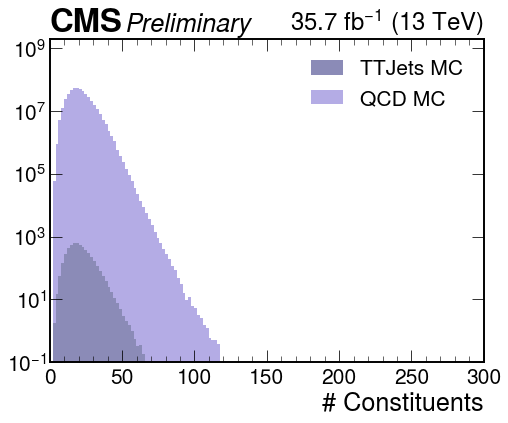

In [13]:
plot_label = 'SUEP_nconst_Cluster'
year = '2017'
output_label="Oct31_HTJECcut"
file_ext=".pdf"
temp = '4.0'
mPhi = '2.0'
decay = 'generic'
samples = ['TTJets_'+year, 'QCD_HT_'+year]
#'mS125_T'+temp+'_mPhi'+mPhi+'_'+decay+'_'+year,
#            'mS400_T'+temp+'_mPhi'+mPhi+'_'+decay+'_'+year,
#           'mS700_T'+temp+'_mPhi'+mPhi+'_'+decay+'_'+year,
#            'mS1000_T'+temp+'_mPhi'+mPhi+'_'+decay+'_'+year]
labels = ['TTJets MC', 'QCD MC']
#          r'$m_{S}=125$ GeV',r'$m_{S}=400$ GeV',r'$m_{S}=700$ GeV',r'$m_{S}=1000$ GeV']
density = False

hep.cms.label(llabel='Preliminary', data=False, lumi=lumiLabel(year,scouting=True))
hBkg, hSignal, cSignal = [], [], []
lBkg, lSignal, cBkg = [], [], []
hData, lData, cData = [], [], []
for label, sample in zip(labels, samples):
    if sample not in plots.keys(): continue
    print(sample)
    h = plots[sample][plot_label][::2j]
    if density:
        h = h/h.sum().value
    if 'mS' in sample: 
        hSignal.append(h)
        lSignal.append(label)
        cSignal.append(getColor(sample))
    elif 'data' in sample:
        hData.append(h)
        lData.append(label)
        cData.append(getColor(sample))
    else: 
        hBkg.append(h)
        lBkg.append(label)
        cBkg.append(getColor(sample))
    
hep.histplot(hBkg, yerr=True, label=lBkg, color=cBkg, histtype='fill', alpha=0.5, stack=True) 
#hep.histplot(hData, yerr=True, label=lData, color=cData, stack=False) 
#hep.histplot(hSignal, yerr=True, label=lSignal, color=cSignal, stack=False) 

# tweak these by hand, as needed
plt.ylim(1e-1,2e9)
plt.xlim(0,300)
plt.legend(loc='best')
plt.yscale("log")

# save and show
#if saveToAN: plt.savefig(AN_label.format("HT_"+year))
#plt.savefig(output_label+plot_label+"_"+year+file_ext)

50to100_2017
100to200_2017
200to300_2017
300to500_2017
500to700_2017
700to1000_2017
1000to1500_2017
1500to2000_2017
2000toInf_2017


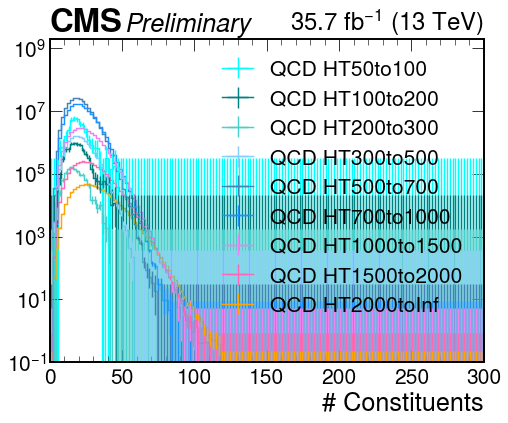

In [14]:
plot_label = 'SUEP_nconst_Cluster'
year = '2017'
output_label="Oct31_2_HTJECcut"
file_ext=".pdf"
temp = '4.0'
mPhi = '2.0'
decay = 'generic'
samples = ['50to100_'+year,'100to200_'+year,'200to300_'+year,'300to500_'+year,'500to700_'+year,'700to1000_'+year,'1000to1500_'+year,'1500to2000_'+year,'2000toInf_'+year]
#'mS125_T'+temp+'_mPhi'+mPhi+'_'+decay+'_'+year,
#            'mS400_T'+temp+'_mPhi'+mPhi+'_'+decay+'_'+year,
#           'mS700_T'+temp+'_mPhi'+mPhi+'_'+decay+'_'+year,
#            'mS1000_T'+temp+'_mPhi'+mPhi+'_'+decay+'_'+year]
labels = ['QCD HT50to100','QCD HT100to200','QCD HT200to300','QCD HT300to500','QCD HT500to700','QCD HT700to1000','QCD HT1000to1500','QCD HT1500to2000','QCD HT2000toInf']
#          r'$m_{S}=125$ GeV',r'$m_{S}=400$ GeV',r'$m_{S}=700$ GeV',r'$m_{S}=1000$ GeV']
density = False

hep.cms.label(llabel='Preliminary', data=False, lumi=lumiLabel(year,scouting=True))
hBkg, hSignal, cSignal = [], [], []
lBkg, lSignal, cBkg = [], [], []
hData, lData, cData = [], [], []
for label, sample in zip(labels, samples):
    if sample not in plots.keys(): continue
    print(sample)
    h = plots[sample][plot_label][::2j]
    if density:
        h = h/h.sum().value
    if 'mS' in sample: 
        hSignal.append(h)
        lSignal.append(label)
        cSignal.append(getColor(sample))
    elif 'data' in sample:
        hData.append(h)
        lData.append(label)
        cData.append(getColor(sample))
    else: 
        hBkg.append(h)
        lBkg.append(label)
        cBkg.append(getColor(sample))
    
#hep.histplot(hBkg, yerr=True, label=lBkg, color=cBkg, histtype='fill', alpha=0.5, stack=True) 
#hep.histplot(hData, yerr=True, label=lData, color=cData, stack=False) 
#hep.histplot(hSignal, yerr=True, label=lSignal, color=cSignal, stack=False) 
hep.histplot(hBkg, yerr=True, label=lBkg, color=cBkg, stack=False) 

# tweak these by hand, as needed
plt.ylim(1e-1,2e9)
plt.xlim(0,300)
plt.legend(loc='best')
plt.yscale("log")

# save and show
#if saveToAN: plt.savefig(AN_label.format("HT_"+year))
plt.savefig(output_label+plot_label+"_"+year+file_ext)

In [15]:
getColor("300to500_+year")

'lightskyblue'

TTJets_2017
QCD_HT_2017


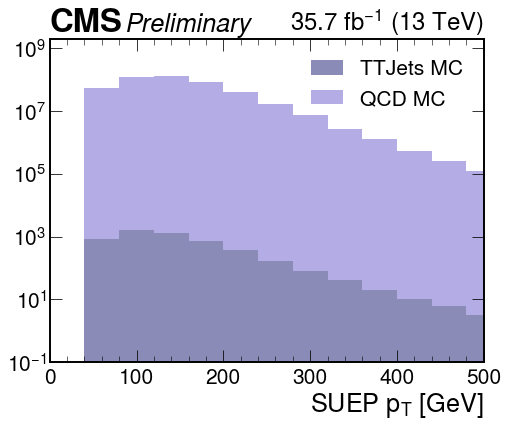

In [16]:
plot_label = 'SUEP_pt_Cluster'
year = '2017'
output_label="Oct31_HTJECcut"
file_ext=".pdf"
temp = '4.0'
mPhi = '2.0'
decay = 'generic'
samples = ['TTJets_'+year, 'QCD_HT_'+year]
#'mS125_T'+temp+'_mPhi'+mPhi+'_'+decay+'_'+year,
#            'mS400_T'+temp+'_mPhi'+mPhi+'_'+decay+'_'+year,
#           'mS700_T'+temp+'_mPhi'+mPhi+'_'+decay+'_'+year,
#            'mS1000_T'+temp+'_mPhi'+mPhi+'_'+decay+'_'+year]
labels = ['TTJets MC', 'QCD MC']
#          r'$m_{S}=125$ GeV',r'$m_{S}=400$ GeV',r'$m_{S}=700$ GeV',r'$m_{S}=1000$ GeV']
density = False

hep.cms.label(llabel='Preliminary', data=False, lumi=lumiLabel(year,scouting=True))
hBkg, hSignal, cSignal = [], [], []
lBkg, lSignal, cBkg = [], [], []
hData, lData, cData = [], [], []
for label, sample in zip(labels, samples):
    if sample not in plots.keys(): continue
    print(sample)
    h = plots[sample][plot_label][::2j]
    if density:
        h = h/h.sum().value
    if 'mS' in sample: 
        hSignal.append(h)
        lSignal.append(label)
        cSignal.append(getColor(sample))
    elif 'data' in sample:
        hData.append(h)
        lData.append(label)
        cData.append(getColor(sample))
    else: 
        hBkg.append(h)
        lBkg.append(label)
        cBkg.append(getColor(sample))
    
hep.histplot(hBkg, yerr=True, label=lBkg, color=cBkg, histtype='fill', alpha=0.5, stack=True) 
#hep.histplot(hData, yerr=True, label=lData, color=cData, stack=False) 
#hep.histplot(hSignal, yerr=True, label=lSignal, color=cSignal, stack=False) 

# tweak these by hand, as needed
plt.ylim(1e-1,2e9)
plt.xlim(0,500)
plt.legend(loc='best')
plt.yscale("log")

# save and show
#if saveToAN: plt.savefig(AN_label.format("HT_"+year))
plt.savefig(output_label+plot_label+"_"+year+file_ext)

TTJets_2017
QCD_HT_2017


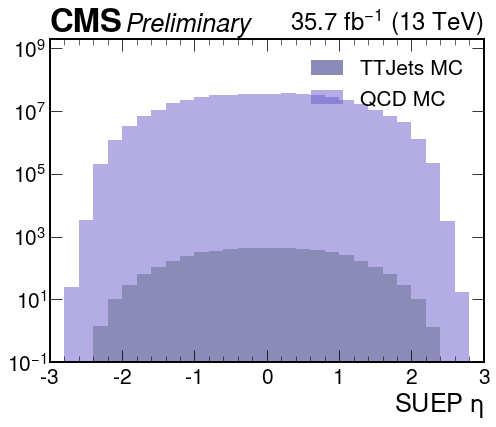

In [17]:
plot_label = 'SUEP_eta_Cluster'
year = '2017'
output_label="Oct31_HTJECcut"
file_ext=".pdf"
temp = '4.0'
mPhi = '2.0'
decay = 'generic'
samples = ['TTJets_'+year, 'QCD_HT_'+year]
#'mS125_T'+temp+'_mPhi'+mPhi+'_'+decay+'_'+year,
#            'mS400_T'+temp+'_mPhi'+mPhi+'_'+decay+'_'+year,
#           'mS700_T'+temp+'_mPhi'+mPhi+'_'+decay+'_'+year,
#            'mS1000_T'+temp+'_mPhi'+mPhi+'_'+decay+'_'+year]
labels = ['TTJets MC', 'QCD MC']
#          r'$m_{S}=125$ GeV',r'$m_{S}=400$ GeV',r'$m_{S}=700$ GeV',r'$m_{S}=1000$ GeV']
density = False

hep.cms.label(llabel='Preliminary', data=False, lumi=lumiLabel(year,scouting=True))
hBkg, hSignal, cSignal = [], [], []
lBkg, lSignal, cBkg = [], [], []
hData, lData, cData = [], [], []
for label, sample in zip(labels, samples):
    if sample not in plots.keys(): continue
    print(sample)
    h = plots[sample][plot_label][::2j]
    if density:
        h = h/h.sum().value
    if 'mS' in sample: 
        hSignal.append(h)
        lSignal.append(label)
        cSignal.append(getColor(sample))
    elif 'data' in sample:
        hData.append(h)
        lData.append(label)
        cData.append(getColor(sample))
    else: 
        hBkg.append(h)
        lBkg.append(label)
        cBkg.append(getColor(sample))
    
hep.histplot(hBkg, yerr=True, label=lBkg, color=cBkg, histtype='fill', alpha=0.5, stack=True) 
#hep.histplot(hData, yerr=True, label=lData, color=cData, stack=False) 
#hep.histplot(hSignal, yerr=True, label=lSignal, color=cSignal, stack=False) 

# tweak these by hand, as needed
plt.ylim(1e-1,2e9)
plt.xlim(-3,3)
plt.legend(loc='best')
plt.yscale("log")

# save and show
#if saveToAN: plt.savefig(AN_label.format("HT_"+year))
plt.savefig(output_label+plot_label+"_"+year+file_ext)

TTJets_2017
QCD_HT_2017


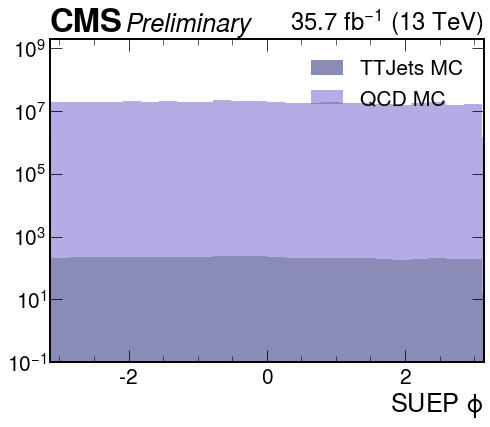

In [18]:
plot_label = 'SUEP_phi_Cluster'
year = '2017'
output_label="Oct31_HTJECcut"
file_ext=".pdf"
temp = '4.0'
mPhi = '2.0'
decay = 'generic'
samples = ['TTJets_'+year, 'QCD_HT_'+year]
#'mS125_T'+temp+'_mPhi'+mPhi+'_'+decay+'_'+year,
#            'mS400_T'+temp+'_mPhi'+mPhi+'_'+decay+'_'+year,
#           'mS700_T'+temp+'_mPhi'+mPhi+'_'+decay+'_'+year,
#            'mS1000_T'+temp+'_mPhi'+mPhi+'_'+decay+'_'+year]
labels = ['TTJets MC', 'QCD MC']
#          r'$m_{S}=125$ GeV',r'$m_{S}=400$ GeV',r'$m_{S}=700$ GeV',r'$m_{S}=1000$ GeV']
density = False

hep.cms.label(llabel='Preliminary', data=False, lumi=lumiLabel(year,scouting=True))
hBkg, hSignal, cSignal = [], [], []
lBkg, lSignal, cBkg = [], [], []
hData, lData, cData = [], [], []
for label, sample in zip(labels, samples):
    if sample not in plots.keys(): continue
    print(sample)
    h = plots[sample][plot_label][::2j]
    if density:
        h = h/h.sum().value
    if 'mS' in sample: 
        hSignal.append(h)
        lSignal.append(label)
        cSignal.append(getColor(sample))
    elif 'data' in sample:
        hData.append(h)
        lData.append(label)
        cData.append(getColor(sample))
    else: 
        hBkg.append(h)
        lBkg.append(label)
        cBkg.append(getColor(sample))
    
hep.histplot(hBkg, yerr=True, label=lBkg, color=cBkg, histtype='fill', alpha=0.5, stack=True) 
#hep.histplot(hData, yerr=True, label=lData, color=cData, stack=False) 
#hep.histplot(hSignal, yerr=True, label=lSignal, color=cSignal, stack=False) 

# tweak these by hand, as needed
plt.ylim(1e-1,2e9)
plt.xlim(-3.14,3.14)
plt.legend(loc='best')
plt.yscale("log")

# save and show
#if saveToAN: plt.savefig(AN_label.format("HT_"+year))
plt.savefig(output_label+plot_label+"_"+year+file_ext)

### 1D Comparison - S1 & Efficiency

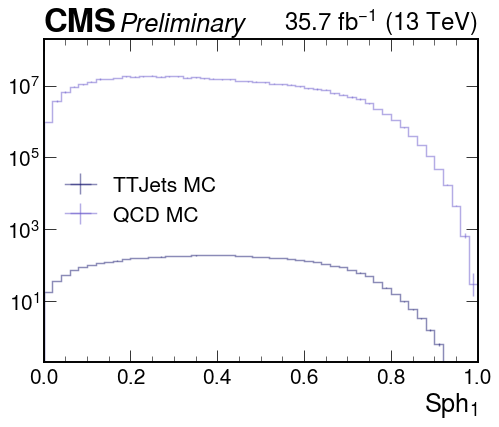

In [19]:
plt.rcParams['figure.figsize'] = [8, 6]
plot_label = 'SUEP_S1_Cluster'
year = '2017'
output_label="Nov10_HTcut_noJEC"
file_ext=".png"
temp = '3.0'
mPhi = '3.0'
decay = 'generic'
samples = ['TTJets_'+year, 'QCD_HT_'+year] 
#            'mS125_T'+temp+'_mPhi'+mPhi+'_'+decay+'_'+year,
#            'mS200_T'+temp+'_mPhi'+mPhi+'_'+decay+'_'+year,
#            'mS400_T'+temp+'_mPhi'+mPhi+'_'+decay+'_'+year,
#            'mS700_T'+temp+'_mPhi'+mPhi+'_'+decay+'_'+year,
#            'mS1000_T'+temp+'_mPhi'+mPhi+'_'+decay+'_'+year]
labels = ['TTJets MC', 'QCD MC']
#          r'$m_{S}=125$ GeV',r'$m_{S}=200$ GeV',r'$m_{S}=400$ GeV',r'$m_{S}=700$ GeV',r'$m_{S}=1000$ GeV']
density = False

hep.cms.label(llabel='Preliminary', data=False, lumi=lumiLabel(year,scouting=True))
hBkg, hSignal, cSignal = [], [], []
lBkg, lSignal, cBkg = [], [], []
for label, sample in zip(labels, samples):
    if sample not in plots.keys(): 
        print("Missing", sample)
        continue
    h = plots[sample][plot_label][::2j]
    if density:
        h = h/h.sum().value
    if 'mS' in sample: 
        hSignal.append(h)
        lSignal.append(label)
        cSignal.append(getColor(sample))
    else: 
        hBkg.append(h)
        lBkg.append(label)
        cBkg.append(getColor(sample))
        
hep.histplot(hBkg, yerr=True, label=lBkg, color=cBkg, histtype='step', alpha=0.5, stack=True) 
if len(hSignal)>0: hep.histplot(hSignal, yerr=True, label=lSignal, color=cSignal, stack=False) 

# tweak these by hand, as needed
plt.ylim(0.2,2e8)
plt.xlim(0,1)
plt.legend(loc='best')
plt.yscale("log")

# save and show
#if saveToAN: plt.savefig(AN_label.format("sph_"+year))
plt.savefig(output_label+plot_label+"_"+year+file_ext,transparent=True)
plt.show()

In [20]:
(hBkg[0].sum()+hBkg[1].sum()).value

461995728.17820454

In [21]:
for i in range(0,50):
    print("bin",i, (hBkg[0][i]+hBkg[1][i]).value/(hBkg[0].sum()+hBkg[1].sum()).value)

bin 0 0.0020965181831488233
bin 1 0.007913276752673516
bin 2 0.014214153306661755
bin 3 0.020152837201394654
bin 4 0.023655443047544022
bin 5 0.027555254289211156
bin 6 0.03310532640473928
bin 7 0.03301928818396154
bin 8 0.03524870607408863
bin 9 0.03888071817876748
bin 10 0.038340013188293255
bin 11 0.03910152373943084
bin 12 0.04058553521211343
bin 13 0.03883813571901979
bin 14 0.03895377676587934
bin 15 0.03886700742224753
bin 16 0.03607707854127162
bin 17 0.03719453688302617
bin 18 0.035056328347467205
bin 19 0.03377741940495673
bin 20 0.03297757298667012
bin 21 0.03295019471503864
bin 22 0.028749476178914688
bin 23 0.02872312459293149
bin 24 0.027539521935907658
bin 25 0.026789080231557027
bin 26 0.024655249409658256
bin 27 0.02327208122452478
bin 28 0.02277670745017079
bin 29 0.020645578169504557
bin 30 0.018077744953414434
bin 31 0.017282876559035657
bin 32 0.01686464801751979
bin 33 0.013282126241766055
bin 34 0.01203312942163015
bin 35 0.010505318385869157
bin 36 0.00927544848

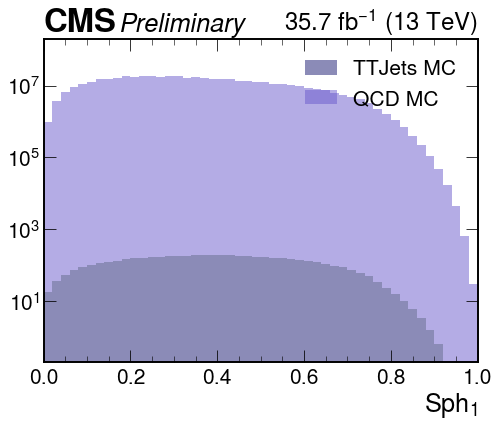

In [22]:
plt.rcParams['figure.figsize'] = [8, 6]
plot_label = 'SUEP_S1_Cluster'
year = '2017'
output_label="Nov8_HTJECcut"
file_ext=".pdf"
temp = '3.0'
mPhi = '3.0'
decay = 'generic'
samples = ['TTJets_'+year, 'QCD_HT_'+year] 
#            'mS125_T'+temp+'_mPhi'+mPhi+'_'+decay+'_'+year,
#            'mS200_T'+temp+'_mPhi'+mPhi+'_'+decay+'_'+year,
#            'mS400_T'+temp+'_mPhi'+mPhi+'_'+decay+'_'+year,
#            'mS700_T'+temp+'_mPhi'+mPhi+'_'+decay+'_'+year,
#            'mS1000_T'+temp+'_mPhi'+mPhi+'_'+decay+'_'+year]
labels = ['TTJets MC', 'QCD MC']
#          r'$m_{S}=125$ GeV',r'$m_{S}=200$ GeV',r'$m_{S}=400$ GeV',r'$m_{S}=700$ GeV',r'$m_{S}=1000$ GeV']
density = False

hep.cms.label(llabel='Preliminary', data=False, lumi=lumiLabel(year,scouting=True))
hBkg17, hSignal17, cSignal17 = [], [], []
lBkg17, lSignal17, cBkg17 = [], [], []
for label, sample in zip(labels, samples):
    if sample not in plots.keys(): 
        print("Missing", sample)
        continue
    h = plots[sample][plot_label][::2j]
    if density:
        h = h/h.sum().value
    if 'mS' in sample: 
        hSignal17.append(h)
        lSignal17.append(label)
        cSignal17.append(getColor(sample))
    else: 
        hBkg17.append(h)
        lBkg17.append(label)
        cBkg17.append(getColor(sample))
        
hep.histplot(hBkg17, yerr=True, label=lBkg17, color=cBkg17, histtype='fill', alpha=0.5, stack=True) 
if len(hSignal)>0: hep.histplot(hSignal17, yerr=True, label=lSignal17, color=cSignal17, stack=False) 

# tweak these by hand, as needed
plt.ylim(0.2,2e8)
plt.xlim(0,1)
plt.legend(loc='best')
plt.yscale("log")

# save and show
#if saveToAN: plt.savefig(AN_label.format("sph_"+year))
plt.savefig(output_label+plot_label+"_"+year+file_ext)
plt.show()

In [23]:
difference=[]
for i in range(0,50):
    difference.append(((hBkg[0][i]+hBkg[1][i]).value/(hBkg[0].sum()+hBkg[1].sum()).value-(hBkg17[0][i]+hBkg17[1][i]).value/(hBkg17[0].sum()+hBkg17[1].sum()).value)/((hBkg[0][i]+hBkg[1][i]).value/(hBkg[0].sum()+hBkg[1].sum()).value))
    print("bin",i, "normalized 2018",(hBkg[0][i]+hBkg[1][i]).value/(hBkg[0].sum()+hBkg[1].sum()).value,
          ", normalized 2017",
          (hBkg17[0][i]+hBkg17[1][i]).value/(hBkg17[0].sum()+hBkg17[1].sum()).value,
          ", relative difference",((hBkg[0][i]+hBkg[1][i]).value/(hBkg[0].sum()+hBkg[1].sum()).value-(hBkg17[0][i]+hBkg17[1][i]).value/(hBkg17[0].sum()+hBkg17[1].sum()).value)/((hBkg[0][i]+hBkg[1][i]).value/(hBkg[0].sum()+hBkg[1].sum()).value))

bin 0 normalized 2018 0.0020965181831488233 , normalized 2017 0.0020965181831488233 , relative difference 0.0
bin 1 normalized 2018 0.007913276752673516 , normalized 2017 0.007913276752673516 , relative difference 0.0
bin 2 normalized 2018 0.014214153306661755 , normalized 2017 0.014214153306661755 , relative difference 0.0
bin 3 normalized 2018 0.020152837201394654 , normalized 2017 0.020152837201394654 , relative difference 0.0
bin 4 normalized 2018 0.023655443047544022 , normalized 2017 0.023655443047544022 , relative difference 0.0
bin 5 normalized 2018 0.027555254289211156 , normalized 2017 0.027555254289211156 , relative difference 0.0
bin 6 normalized 2018 0.03310532640473928 , normalized 2017 0.03310532640473928 , relative difference 0.0
bin 7 normalized 2018 0.03301928818396154 , normalized 2017 0.03301928818396154 , relative difference 0.0
bin 8 normalized 2018 0.03524870607408863 , normalized 2017 0.03524870607408863 , relative difference 0.0
bin 9 normalized 2018 0.03888071

In [96]:
print(difference)

[0.00558885032832769, 0.009286824044490221, 0.007965794714221998, 0.007987790811681958, 0.007472447161478758, 0.013231744246876136, 0.007187253811232464, 0.009597524379655746, 0.012244738474055704, 0.009387656523112133, 0.009212270898132164, 0.011337564355361417, 0.00875804915017312, 0.004959917120344597, 0.0016431989628426424, 0.003794874241294865, 0.002005171542588895, -0.0017862250282361328, -0.0032624906627835896, 0.0007712892080429821, -0.001164153011823237, -0.0030537197552372346, -0.002893296569985441, -0.003581014781075304, -0.006996420809088728, -0.00650485852085395, -0.011777680322524737, -0.010873050625265139, -0.008482246900328682, -0.014747613395316007, -0.01613755436168701, -0.016207816844657583, -0.013121516665419847, -0.011654204725425924, -0.014796103446563205, -0.022162347091645846, -0.01376177490958873, -0.02934912264327693, -0.01863423942489331, -0.025806212740366163, -0.014017093347727756, -0.032785801770163416, -0.031955378338473096, 0.0005717811680387506, -0.0496

In [93]:
sqrt(hBkg[0][0].variance)

0.405668140530209

In [24]:
plot_label = 'SUEP_S1_Cluster70'

temp = '3.0'
mPhi = '3.0'
decay = 'generic'
samples = ['mS125_T'+temp+'_mPhi'+mPhi+'_'+decay,
            'mS400_T'+temp+'_mPhi'+mPhi+'_'+decay,
            'mS700_T'+temp+'_mPhi'+mPhi+'_'+decay,
            'mS1000_T'+temp+'_mPhi'+mPhi+'_'+decay]

for sample in samples:
    line = ''
    
    mS = sample[sample.find('_mS')+3:sample.find('_T')]
    label = '$T = '+str(temp)+' \GeV$, $m_{\phi}= '+str(mPhi)+'\GeV$, $m_S = ' + str(mS) + ' \GeV$'
    line += label
    line += ' & '
    
    for i, year in enumerate(['2016', '2017', '2018']):
        tot = plots[sample+'_'+year][plot_label].sum().value
        passing = plots[sample+'_'+year][plot_label][0.5j:].sum().value
        line += str(round(passing/tot, 2))
        if i != 2:
            line += ' & '
        else:
            line += ' \\\\ '
    print(line)

KeyError: 'mS125_T3.0_mPhi3.0_generic_2016'

### SUEP ISR Comparison

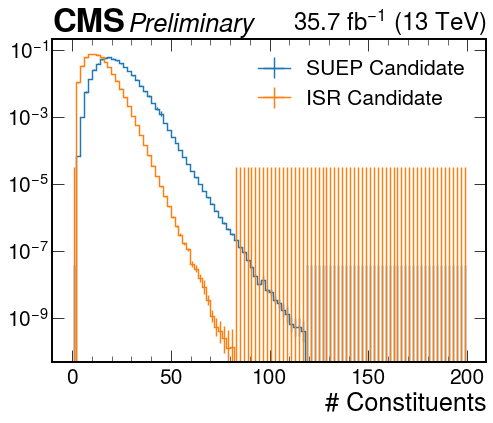

In [25]:
variable = 'nconst'
year = '2017'
sample = 'MC_{}'.format(year)

density = True

plot_labels = ['SUEP_{}_Cluster'.format(variable), 
               'ISR_{}_ClusterInverted'.format(variable)]
objects = ['SUEP Candidate', 'ISR Candidate']

fig, ax = plt.subplots()
hep.cms.label(llabel='Preliminary',data=False, lumi=lumiLabel(year,scouting=True))

for plot_label, obj in zip(plot_labels, objects): 
    h = plots[sample][plot_label][:200j:2j]
    hep.histplot(h, yerr=True, density=density, label=obj) 

fig.axes[0].set_yscale("log")
fig.axes[0].legend()

# save and show
if saveToAN: plt.savefig(AN_label.format("ISR_SUEP_"+variable))
plt.savefig(output_label+plot_label+"_"+year+file_ext)
plt.show()

## Ch. 5 Background Estimation with Extended ABCD

### 2D Background

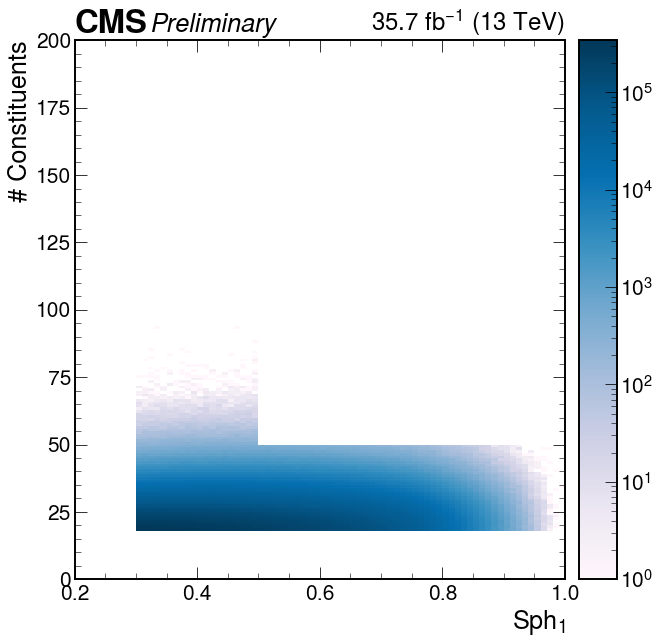

In [26]:
plot_label = '2D_SUEP_S1_vs_SUEP_nconst_Cluster'
year = '2017'
sample = 'data_'+year
doLinearFit = False
output_label = "Oct31"
file_ext=".png"
fig, ax = plt.subplots(figsize=(10, 10))
    
if plots[sample][plot_label].sum().value == 0:
    print("Histogram empty for sample", sample)

h = plots[sample][plot_label]
h = h[0.3j:,18j:]

hep.cms.label(llabel='Preliminary',data=False, lumi=lumiLabel(year,scouting=True))
_ = hep.hist2dplot(h, 
           norm=matplotlib.colors.LogNorm(),
           cmap = 'PuBu',
           cbar=True,
           label=sample) 

if doLinearFit:
    p = linearFit2DHist(h)
    plt.plot(h.axes[0].centers, p(h.axes[0].centers), label="Linear fit result:"+str(p), color='black', linestyle='dashed')
    plt.legend()

plt.ylim(0,200)
plt.xlim(0.2,1.0)

#if saveToAN: plt.savefig(AN_label.format("2D_decorrelate_"+year))
plt.savefig(output_label+"2D_decorrelate_"+year+file_ext)
plt.show()

### Slices of ABCD Variables

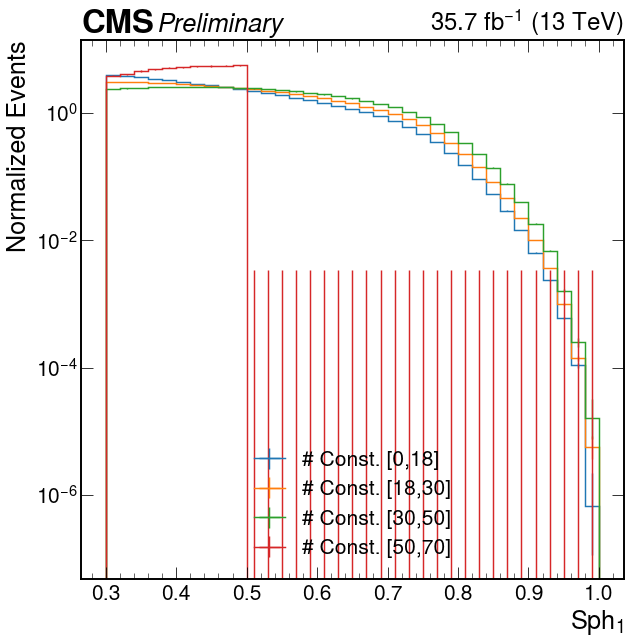

In [28]:
# parameters
plot_label = '2D_SUEP_S1_vs_SUEP_nconst_Cluster'
year = '2017'
#samples = ['QCD_HT_'+year, 'TTJets_'+year] # these are ADDED
samples = ['data_2017']
output_label = "Oct31"
fig, ax = plt.subplots(figsize=(10, 10))
hep.cms.label(llabel='Preliminary',data=False, lumi=round(lumiLabel(year,scouting=True),1))

#slices = [[0j,20j],[20j,40j],[40j,60j],[60j,80j],[80j,300j]]
slices = [[0j,18j],[18j,30j],[30j,50j],[50j,70j]]
for j in range(len(slices)):
    val_lo = slices[j][0]
    val_up = slices[j][1]

    for i, sample in enumerate(samples):
        if i==0: h = plots[sample][plot_label][0.3j::2j,val_lo:val_up:sum]
        else: h += plots[sample][plot_label][0.3j::2j,val_lo:val_up:sum]
         
    hep.histplot(h,
                 yerr=True, density=True, 
                 label="# Const. [{0},{1}]".format(round(val_lo.imag), round(val_up.imag)))    

plt.legend()
#plt.ylim(1e-6,1e0)
plt.yscale('log')
plt.ylabel("Normalized Events")
plt.xlabel(r"$Sph_{1}$")

#if saveToAN: plt.savefig(AN_label.format("1D_decorrelate_" + year))
plt.savefig(output_label + "1D_decorrelate_" + year + file_ext,  bbox_inches='tight')
plt.show()

### 2D Background with ABCD Regions

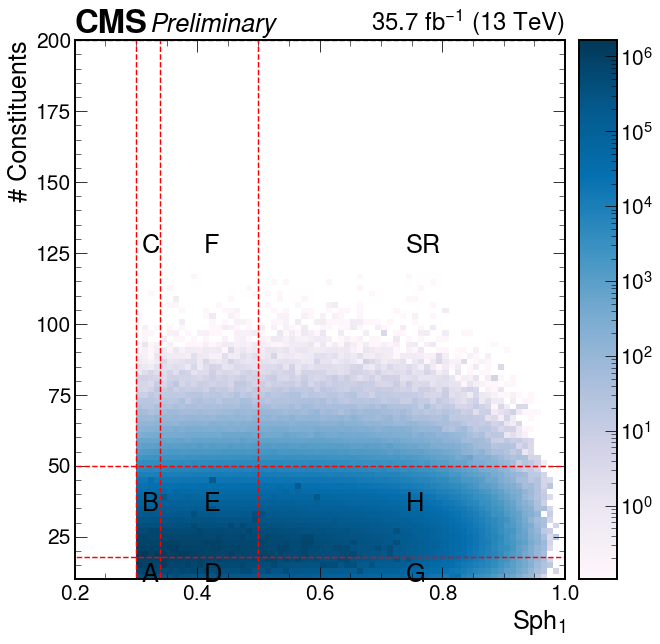

In [29]:
plot_label = '2D_SUEP_S1_vs_SUEP_nconst_Cluster'
year = '2017'
samples = ['QCD_HT_'+year, 'TTJets_'+year] # NOTE: these are ADDED

draw_lines = True
lines_x = [0.3, 0.34, 0.5, 1.0]
lines_y = [0, 18, 50, 200]

fig, ax = plt.subplots(figsize=(10, 10))

k = 0
regions = ['A','B','C','D','E','F','G','H','SR']
for i in range(len(lines_x)-1):
    for j in range(len(lines_y)-1):
        xloc = (lines_x[i+1] + lines_x[i])/2 - 0.01
        yloc = (lines_y[j+1] + lines_y[j])/2
        plt.text(xloc, yloc, regions[k])
        k+=1
    
for i, sample in enumerate(samples):
    if i == 0: h = plots[sample][plot_label].copy()
    else: h += plots[sample][plot_label].copy()
    
bins = np.linspace(0,500,10)
h = h[0.3j:,0j::2j]

hep.cms.label(llabel='Preliminary',data=False, lumi=lumiLabel(year,scouting=True))
_ = hep.hist2dplot(h, 
           norm=matplotlib.colors.LogNorm(),
           cmap = 'PuBu',
           cbar=True,
           label=sample) 

# draw lines to visualize ABCD regions
if draw_lines:
    for y in lines_y: plt.plot([0,10000], [y,y], color='red', linestyle='dashed')
    for x in lines_x: plt.plot([x,x], [0,1000], color='red', linestyle='dashed')

plt.ylim(10,200)
plt.xlim(0.2,1.0)

if saveToAN: plt.savefig(AN_label.format("extendedABCD_regions_2018"))
plt.savefig(output_label+plot_label+"_"+year+file_ext)
plt.show()

### ABCD 1D Backgrounds

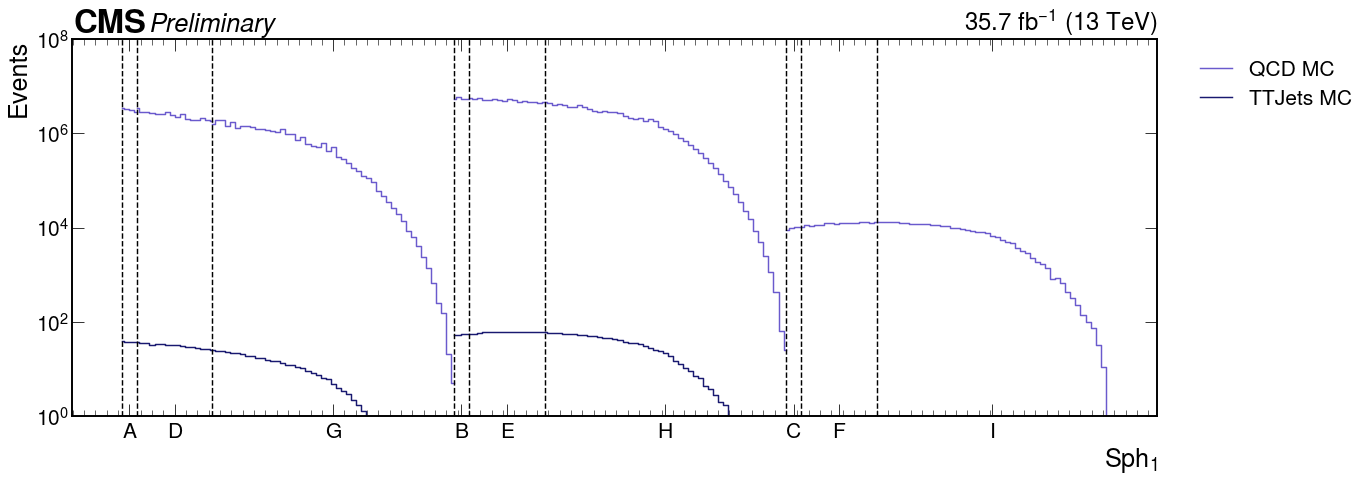

In [30]:
x = 'ABCDEFGHI'
y = 'ADGBEHCFI'
year = '2017'
plot_labels = ['SUEP_S1_Cluster']
samples = ['QCD_HT_'+year, 'TTJets_'+year]
#samples = ['QCD_HT_'+year]
labels = ['QCD MC', 'TTJets MC']
#labels = ['QCD']

for plot_label in plot_labels:

    fig, ax = plot_all_regions(plots, 'A_'+plot_label, samples, 
                               labels=labels, regions=y, density=False)
    hep.cms.label(llabel='Preliminary', data=False, lumi=lumiLabel(year,scouting=True), ax=ax)

    ax.set_ylim(1e0, 1e8)
    ax.set_xlabel(r"$Sph_1$")

    if saveToAN: fig.savefig(AN_label.format('backgrounds_'+year), bbox_inches='tight')
    fig.savefig(output_label + 'backgrounds_' + year + file_ext, bbox_inches='tight')

### F, C, SR Distributions

Text(0, 1, 'Error on $\\int^{UB}_{70} F ~/~ \\int^{UB}_{70} C$')

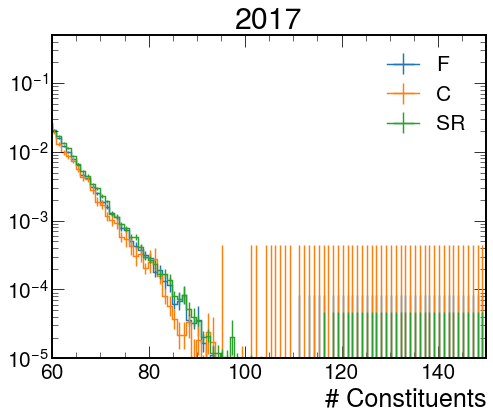

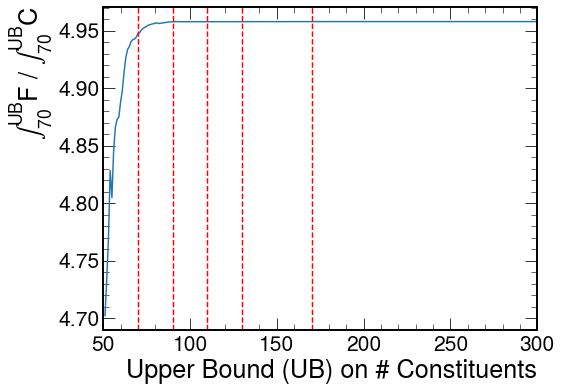

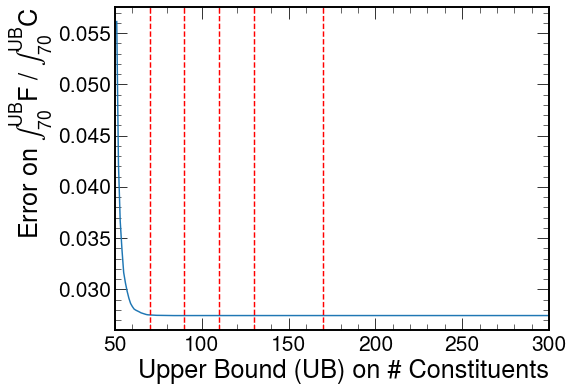

In [31]:
plot_label = '2D_SUEP_S1_vs_SUEP_nconst_Cluster'
year = '2017'
sample = 'MC'
xregions = [0.3j, 0.34j, 0.5j, 1.0j]
yregions = [0j, 18j, 50j, 1000j]
new_bins = [70, 90, 100, 110, 170, 500]
rebin = False
density = True

abcd = plots["{}_{}".format(sample,year)][plot_label].copy()

C = abcd[xregions[0]:xregions[1]:sum, yregions[-2]:].copy()
F = abcd[xregions[1]:xregions[2]:sum, yregions[-2]:].copy()
SR = abcd[xregions[-2]::sum, yregions[-2]:].copy()

cuts = np.linspace(yregions[-2].imag+1, yregions[-1].imag, int((yregions[-1].imag-yregions[-2].imag)))
ratios = []
errs = []
for n in cuts:
    sumC = C[yregions[-2]:n*1.0j].sum().value
    sumF = F[yregions[-2]:n*1.0j].sum().value
    err = np.sqrt( sumF/sumC**2 + sumF**2 / sumC**3)
    ratios.append(sumF/sumC)
    errs.append(err)

if rebin:
    F = rebin_piecewise(F, new_bins)
    C = rebin_piecewise(C, new_bins)
    SR = rebin_piecewise(SR, new_bins)

    print("F", F.values())
    print("C", C.values())
    print("SR", SR.values())

if density:
    F /= F.sum().value
    C /= C.sum().value
    SR /= SR.sum().value

fig = plt.figure()
ax = fig.subplots()
ax.set_title(year)
hep.histplot(F, yerr=True, label='F', ax=ax) 
hep.histplot(C, yerr=True, label='C', ax=ax) 
hep.histplot(SR, yerr=True, label='SR', ax=ax)
ax.set_yscale("log")
ax.set_xlim(60, 150)
ax.set_ylim(1e-5, 5e-1)
ax.legend()
# if saveToAN: fig.savefig(AN_label.format("SRFC_"+sample+"_"+year))
# fig.savefig(output_label+"SRFC_"+sample+"_"+year+file_ext)

fig = plt.figure()
ax = fig.subplots()
ax.plot(cuts, ratios)
ax.axvline(70, color='red', linestyle='dashed')
ax.axvline(90, color='red', linestyle='dashed')
ax.axvline(110, color='red', linestyle='dashed')
ax.axvline(130, color='red', linestyle='dashed')
ax.axvline(170, color='red', linestyle='dashed')
ax.axvline(500, color='red', linestyle='dashed')
ax.set_xlim(50, 300)
ax.set_xlabel("Upper Bound (UB) on # Constituents")
ax.set_ylabel(r"$\int^{UB}_{70} F ~/~ \int^{UB}_{70} C$")

fig = plt.figure()
ax = fig.subplots()
ax.plot(cuts, errs)
ax.axvline(70, color='red', linestyle='dashed')
ax.axvline(90, color='red', linestyle='dashed')
ax.axvline(110, color='red', linestyle='dashed')
ax.axvline(130, color='red', linestyle='dashed')
ax.axvline(170, color='red', linestyle='dashed')
ax.axvline(500, color='red', linestyle='dashed')
ax.set_xlim(50, 300)
ax.set_xlabel("Upper Bound (UB) on # Constituents")
ax.set_ylabel(r"Error on $\int^{UB}_{70} F ~/~ \int^{UB}_{70} C$")

### F/C Values

2017
Ratio F/C: [1.00334743 0.77906977        nan        nan        nan]
Error on F/C [0.16461082 1.10177103 0.         0.         0.        ]
Ratio SR/F: [nan nan nan nan nan]
Error on Ratio SR/F [nan nan  0.  0.  0.]
Predicted F/C [1.0033474277660324, 0.7790697674418605, 0.5547921071176887, 0.2183756166314308, -1.8561927413671586]
Midpoints [80.0, 100.0, 120.0, 150.0, 335.0]



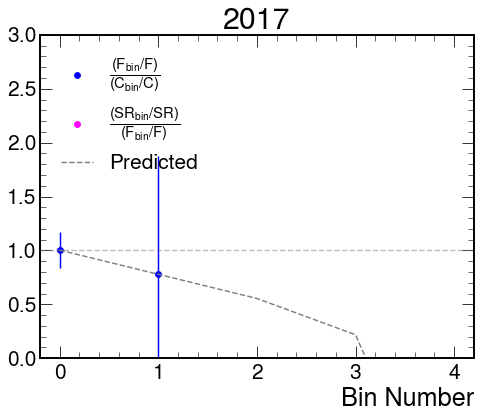

In [32]:
plot_label = '2D_SUEP_S1_vs_SUEP_nconst_Cluster'
sample = 'data'
xregions = [0.3j, 0.4j, 0.5j, 1.0j]
yregions = [30j, 50j, 70j, 1000j]
new_bins = [70, 90, 110, 130, 170, 500]
rebin = True    # RUN BOTH!

systABCD = {}
#for year in ['2016', '2017', '2018']:
for year in ['2017']:
    abcd = plots["{}_{}".format(sample,year)][plot_label].copy()
    C = abcd[xregions[0]:xregions[1]:sum, yregions[-2]:].copy()
    F = abcd[xregions[1]:xregions[2]:sum, yregions[-2]:].copy()
    SR = abcd[xregions[-2]::sum, yregions[-2]:].copy()

    if rebin:
        F_binned = rebin_piecewise(F, new_bins)/F.sum().value
        C_binned = rebin_piecewise(C, new_bins)/C.sum().value
        SR_binned = rebin_piecewise(SR, new_bins)/SR.sum().value
    else:
        F_binned = F.copy()[::4j]/F.sum().value
        C_binned = C.copy()[::4j]/C.sum().value
        SR_binned = SR.copy()[::4j]/SR.sum().value

    ratio_FC = (F_binned.values())/(C_binned.values()) 
    ratio_SRF = (SR_binned.values())/(F_binned.values()) 
    ratio_FC_err = np.where(
        C_binned.values() > 0,
        np.sqrt((C_binned.values()**-2)*(F_binned.variances()) + (F_binned.values()**2 * C_binned.values()**-4)*(C_binned.variances())),
        0
    )
    ratio_SRF_err = np.where(
        F_binned.values() > 0,
        np.sqrt((F_binned.values()**-2)*(SR_binned.variances()) + (SR_binned.values()**2 * F_binned.values()**-4)*(F_binned.variances())),
        0
    )

    systABCD[year] = {}
    #systABCD[year]['values'] = ratio_FC
    #systABCD[year]['errors'] = ratio_FC_err

    if rebin:
        midpoints = [(new_bins[i] + new_bins[i+1]) / 2 for i in range(len(new_bins) - 1)]
        slope = (ratio_FC[1] - ratio_FC[0]) / (midpoints[1] - midpoints[0])
        intercept = ratio_FC[0] - slope * midpoints[0]
        predicted_FC = np.concatenate((ratio_FC[:2],[slope * xi + intercept for xi in midpoints[2:]]))
        predicted_FC = [x if x < 2 else 2 for x in predicted_FC]
        
        systABCD[year]['values'] = predicted_FC

        print(year)
        print("Ratio F/C:", ratio_FC)
        print("Error on F/C", ratio_FC_err)
        print("Ratio SR/F:", ratio_SRF)
        print("Error on Ratio SR/F", ratio_SRF_err)
        print("Predicted F/C", predicted_FC)
        print("Midpoints", midpoints)
        print()
        
    if rebin:
        xvalues = np.arange(0, len(ratio_SRF))
    else:
        xvalues = F_binned.axes[0].centers

    fig = plt.figure()
    ax = fig.subplots()
    ax.set_title(year)
    ax.scatter(xvalues, ratio_FC, color='blue', label=r'$\frac{(F_{bin}/F)}{(C_{bin}/C)}$')
    ax.errorbar(xvalues, ratio_FC, yerr=ratio_FC_err, color='blue', linestyle='')
    ax.scatter(xvalues, ratio_SRF, color='magenta', label=r'$\frac{(SR_{bin}/SR)}{(F_{bin}/F)}$')
    ax.errorbar(xvalues, ratio_SRF, yerr=ratio_SRF_err, color='magenta', linestyle='')
    ax.axhline(1, linestyle='dashed', color='gray', alpha=0.5)
    
    if rebin: 
        ax.plot(xvalues, predicted_FC, color='gray', linestyle='dashed', label='Predicted')
        ax.set_ylim(0,3)
        ax.set_xticks([0,1,2,3,4])
        ax.set_xlabel("Bin Number")
    else:
        ax.set_ylim(0.8, 2)
        ax.set_xlim(70, 150)
        ax.set_xlabel("# Constituents")

    ax.legend(loc='upper left')
    
    if rebin:
        if saveToAN: fig.savefig(AN_label.format("FC_"+sample+"_"+year))
        fig.savefig(output_label+"FC_"+sample+"_"+year+file_ext)
    else:
        if saveToAN: fig.savefig(AN_label.format("FC_unbinned_"+sample+"_"+year))
        fig.savefig(output_label+"FC_unbinned_"+sample+"_"+year+file_ext)

### Contamination in Regions

KeyError: 'A_SUEP_S1_Cluster70'

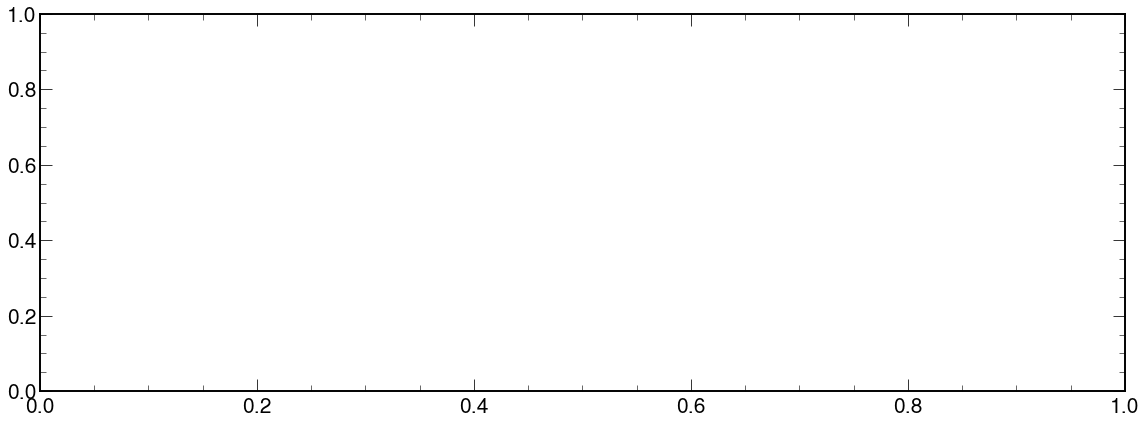

In [35]:
# mu = 1448.16781/34.8
# plots['scaled_M125_2018'] = fill_utils.apply_normalization(plots['M125_2018'], mu)

x = 'ABCDEFGHI'
y = 'ADGBEHCFI'
year = '2017'
plot_labels = ['SUEP_S1_Cluster70']
samples = ['MC_'+year] + ['mS{}_T3.0_mPhi3.0_generic_{}'.format(m, year) for m in [125,200,300,400,500,600,700,800,900,1000]]
labels = ['QCD and TTJets', r'$M_{S} = 125 GeV$', r'$M_{S} = 200 GeV$', r'$M_{S} = 300 GeV$',
          r'$M_{S} = 400 GeV$', r'$M_{S} = 500 GeV$', r'$M_{S} = 600 GeV$', r'$M_{S} = 700 GeV$',
          r'$M_{S} = 800 GeV$', r'$M_{S} = 900 GeV$', r'$M_{S} = 1000 GeV$']

for plot_label in plot_labels:

    fig, ax = plot_all_regions(plots, 'A_'+plot_label, samples, 
                               labels=labels, regions=y, density=False)
    hep.cms.label(llabel='Preliminary', data=False, lumi=lumiLabel(year), ax=ax)

    ax.set_ylim(1e0, 1e6)
    ax.set_xlabel(r"$Sph_1$")

    if saveToAN: fig.savefig(AN_label.format('contamination_'+year), bbox_inches='tight')
    fig.savefig(output_label + 'contamination_' + year + file_ext, bbox_inches='tight')

### Contamination Table

In [ ]:
plot_label = 'SUEP_S1_Cluster70'

masses = [125,400,700,1000]
T = [0.75, 12.0, 3.0, 1.5]
regions = 'ABCDEFGH'

for year in ['2018']:
    QCD_sample = 'data_'+year
    lines = []
    ratios, indices = {}, {}
    for r in regions: 
        ratios.update({r:[]})
        indices.update({r:[]})
        
    for iSample, sample in enumerate([x for x in plots.keys() if 'mS' in x]):
        t = sample[sample.find('_T')+2:sample.find('_mPhi')]
        mPhi = sample[sample.find('_mPhi')+5:sample.find('_generic')]
        mS = sample[sample.find('_mS')+3:sample.find('_T')]
        
        label = '$T = '+str(t)+' \GeV$, $m_{\phi}= '+str(mPhi)+'\GeV$, $m_S = ' + str(mS) + ' \GeV$'
        
        line = label + ' & '
        for i, region in enumerate(regions):
            h = plots[sample][region + "_" + plot_label]
            hQCD = plots[QCD_sample][region + "_" + plot_label]
            alpha = h.sum().value
            beta = hQCD.sum().value
            total = alpha/beta * 100
            err = np.sqrt(alpha * (beta**-2) + (alpha**2) * (beta**-3)) * 100
            line += '$' + str(round(total,2)) + '\\pm' + str(round(err,2)) + '$'

            if i == len(regions)-1: line += ' \\\\'
            else: line += ' & '
            
            
            ratios[region].append(total)
            indices[region].append(iSample)
            
        lines.append(line)    
        #print(line)
    
    for i, region in enumerate(regions):
        print(lines[indices[region][np.argmax(ratios[region])]])
    
    print()

$T = 12.0 \GeV$, $m_{\phi}= 3.0\GeV$, $m_S = 125 \GeV$ & $0.08\pm0.0$ & $0.1\pm0.0$ & $0.0\pm0.0$ & $0.0\pm0.0$ & $0.0\pm0.0$ & $0.0\pm0.0$ & $0.0\pm0.0$ & $0.0\pm0.0$ \\
$T = 12.0 \GeV$, $m_{\phi}= 3.0\GeV$, $m_S = 125 \GeV$ & $0.08\pm0.0$ & $0.1\pm0.0$ & $0.0\pm0.0$ & $0.0\pm0.0$ & $0.0\pm0.0$ & $0.0\pm0.0$ & $0.0\pm0.0$ & $0.0\pm0.0$ \\
$T = 0.75 \GeV$, $m_{\phi}= 3.0\GeV$, $m_S = 125 \GeV$ & $0.0\pm0.0$ & $0.0\pm0.0$ & $0.24\pm0.02$ & $0.0\pm0.0$ & $0.0\pm0.0$ & $0.23\pm0.02$ & $0.0\pm0.0$ & $0.0\pm0.0$ \\
$T = 16.0 \GeV$, $m_{\phi}= 8.0\GeV$, $m_S = 125 \GeV$ & $0.0\pm0.0$ & $0.0\pm0.0$ & $0.0\pm0.0$ & $0.07\pm0.0$ & $0.0\pm0.0$ & $0.0\pm0.0$ & $0.0\pm0.0$ & $0.0\pm0.0$ \\
$T = 32.0 \GeV$, $m_{\phi}= 8.0\GeV$, $m_S = 300 \GeV$ & $0.02\pm0.0$ & $0.0\pm0.0$ & $0.0\pm0.0$ & $0.0\pm0.0$ & $0.03\pm0.0$ & $0.0\pm0.0$ & $0.02\pm0.0$ & $0.0\pm0.0$ \\
$T = 0.75 \GeV$, $m_{\phi}= 3.0\GeV$, $m_S = 125 \GeV$ & $0.0\pm0.0$ & $0.0\pm0.0$ & $0.24\pm0.02$ & $0.0\pm0.0$ & $0.0\pm0.0$ & $0.23\pm0.0

### MC Closure

In [36]:
plot_label = '2D_SUEP_S1_vs_SUEP_nconst_Cluster'
sample = 'MC'
rebin = False   # RUN BOTH!!
#new_bins = [50,55,60,65,70,75,80,90,100,120,150]
xregions = [0.3j, 0.34j, 0.5j, 1.0j]
yregions = [0j, 18j, 50j, 120j]
output_label="Oct02_2"
for year in ['2017']:
    abcd = plots["{}_{}".format(sample,year)][plot_label].copy()
    SR, SR_exp = ABCD_9regions_errorProp(abcd, xregions, yregions, sum_var='y')
    print(SR,SR.values(),SR.view().variance)
    print(SR_exp,SR_exp.values(),SR_exp.view().variance)
    if rebin:
        edges = SR.axes[0].edges
        SR = rebin_piecewise(SR, new_bins)
        SR_exp = rebin_piecewise(SR_exp, new_bins)

    # pull test
    diffs = np.abs(SR_exp.values() - SR.values())
    tot_sigma = np.sqrt(SR.variances() + SR_exp.variances())
    pull_ratios = np.where(tot_sigma > 0, diffs/tot_sigma, 0) + 1

    # chi2 test
    tot_sigma = np.sqrt(SR.variances() + SR_exp.variances())
    print(tot_sigma)
    chi2 = np.sum(np.where(tot_sigma > 0, (SR.values() - SR_exp.values())**2 / tot_sigma**2, 0)) / len(tot_sigma[tot_sigma > 0])
    print("Chi^2:", chi2)

    # use the custom plot_ratio
    # the hist implementation used elsewhere in the notebook doesn't use the 
    # errors in the hists' bins to calculate the errors in the ratio plot
    #fig, axs = plot_ratio([SR_exp, SR], labels=["$SR_{exp}$", "$SR_{obs}$"], systs=np.array(systs[year]))
    fig, axs = plot_ratio([SR_exp, SR], labels=["$SR_{exp}$", "$SR_{obs}$"])

    #_ = axs[0].scatter([], [], marker='+', label='Pull')
    #_ = axs[1].scatter(SR.axes[0].centers, pull_ratios, marker='+', label='Pull')
    fig.set_size_inches(15, 12)
    #_ = axs[0].plot([],[],' ',label=r'$\chi^2$: {}'.format(round(chi2,1)))
    _ = axs[1].set_ylim(0.5, 1.5)
    #_ = axs[0].set_xlim(100, 150)
    _ = axs[0].legend(prop={"family":"DejaVu Sans"})
    #_ = axs[1].set_yticks(ticks=[0,1,2], labels=['-1','0','1'])
    #_ = axs[1].set_ylabel("1 - Ratio")
    hep.cms.label(llabel='Preliminary', data=False, lumi=lumiLabel(year,scouting=True), ax=axs[0])

    if rebin:
        _ = axs[0].set_ylim(1e-2, 1e6)
        _ = axs[0].set_xlim(50, 150)
        #if saveToAN: plt.savefig(AN_label.format("closure_MC_"+year))
        plt.savefig(output_label+"closure_MC_"+year+file_ext)
    else:
        _ = axs[0].set_ylim(1e-1, 1e7)
        #if saveToAN: plt.savefig(AN_label.format("unbinned_closure_MC_"+year))
        plt.savefig(output_label+"unbinned_closure_MC_"+year+file_ext)

NameError: name 'f' is not defined

### Control Regions Ratio

MC_2017
data_2017


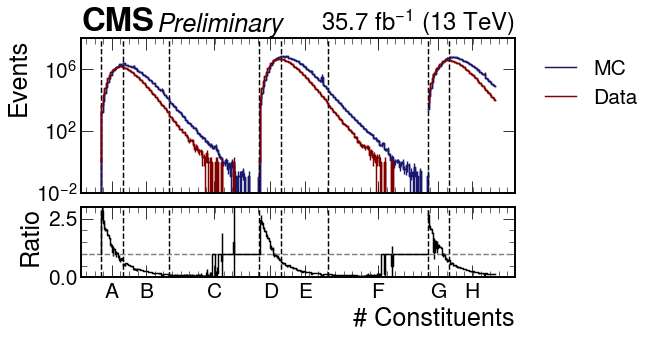

In [37]:
x = 'ABCDEFGH'
y = 'ADGBEHCF'
#plot_label = 'SUEP_S1_Cluster'
plot_label = 'SUEP_nconst_Cluster'
output_label = 'Oct02allbg_HTJECcut'
file_ext='.pdf'
for year in ['2017']:
    fig, (ax1, ax2) = plot_ratio_regions(plots, 'A_'+plot_label, 
                           'MC_'+year, 'data_'+year, 
                           x, density=False)
    ax1.legend(labels=['MC', 'Data'], loc='upper left', bbox_to_anchor=(1.02, 1))
    hep.cms.label(llabel='Preliminary', data=False, lumi=lumiLabel(year,scouting=1), ax=ax1)

    ax1.set_ylim(1e-2, 1e8)
    ax2.set_ylim(0, 3)

    #if saveToAN: plt.savefig(AN_label.format("control_regions_ratio_" + year), bbox_inches='tight')
    fig.savefig(output_label + plot_label + 'control_regions_ratio_' + year + file_ext, bbox_inches='tight')

### Signal Region 

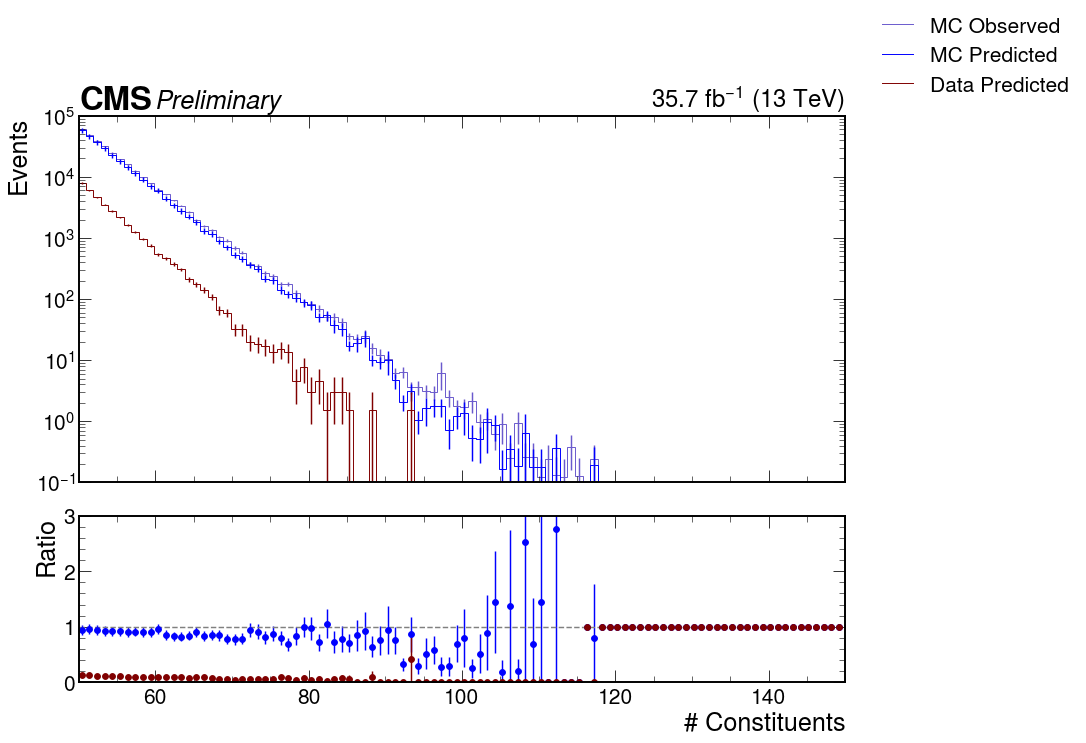

In [38]:
plot_label = '2D_SUEP_S1_vs_SUEP_nconst_Cluster'
year = '2017'
output_label = 'Oct31'
abcdBkg = plots['QCD_HT_'+year][plot_label] + plots['TTJets_'+year][plot_label]
masses = [125, 400, 1000]
xregions = [0.3j, 0.34j, 0.5j, 1.0j]
yregions = [0j, 18j, 50j, 500j]
file_ext='.pdf'
SR, SR_exp = ABCD_9regions_errorProp(abcdBkg, xregions, yregions, sum_var='x')
_, SR_exp_data = ABCD_9regions_errorProp(plots['data_'+year][plot_label], xregions, yregions, sum_var='x')

hlist = [SR, SR_exp, SR_exp_data]
colors = [getColor('QCD_HT'), 'blue', getColor('data')]
labels = ['MC Observed', 'MC Predicted', 'Data Predicted']
for mass in masses:
    sample = 'mS{}_T3.0_mPhi3.0_generic_{}'.format(mass, year)
    label = r'$m_{S}={'+str(mass)+'}$ GeV'
    if sample not in plots.keys(): continue
    abcd = plots[sample][plot_label]
    SUEP_SR = abcd[0.5j:1.0j:sum, 50j:500j]
    hlist.append(SUEP_SR)
    labels.append(label)
    colors.append(getColor(sample))

fig, axs = plot_ratio(hlist, labels=labels, cmap=colors)
fig.set_size_inches(15, 15, forward=True)
axs[0].set_xlim(50, 150)
axs[0].set_ylim(1e-1, 1e5)
hep.cms.label(llabel='Preliminary', data=False, lumi=lumiLabel(year,scouting=True), ax=axs[0])
axs[0].legend(bbox_to_anchor=(1.02,1))
axs[1].set_ylim(0, 3)

#if saveToAN: plt.savefig(AN_label.format("final_"+year), bbox_inches='tight')
plt.savefig(output_label+"final_"+year+file_ext, bbox_inches='tight')

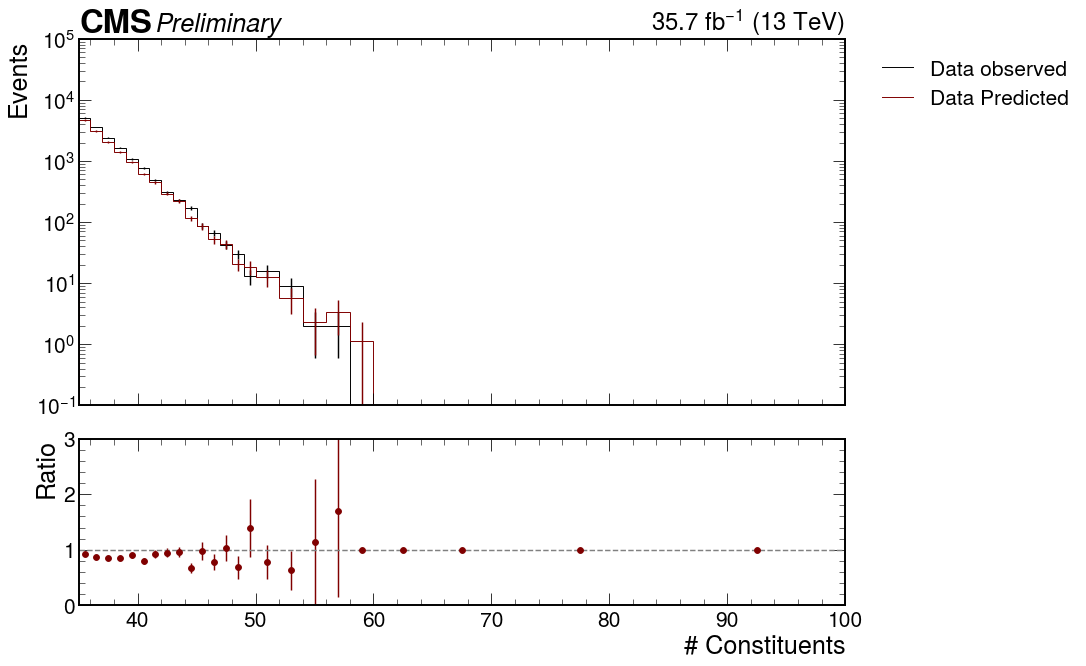

In [39]:
plot_label = '2D_ISR_S1_vs_ISR_nconst_ClusterInverted'
year = '2017'
output_label = 'Oct30'
#abcdBkg = plots['QCD_HT_'+year][plot_label] + plots['TTJets_'+year][plot_label]
masses = [125, 400, 1000]
xregions = [0.3j, 0.34j, 0.5j, 1.0j]
yregions = [0j, 18j, 35j, 500j]
file_ext='.pdf'
#SR, SR_exp = ABCD_9regions_errorProp(abcdBkg, xregions, yregions, sum_var='x')
SR_data, SR_exp_data = ABCD_9regions_errorProp(plots['data_'+year][plot_label], xregions, yregions, sum_var='x')
rebin=True
new_bins=[35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,52,54,56,58,60,65,70,85,100]
#colors = [getColor('QCD_HT'), 'blue','black', getColor('data')]
#labels = ['MC Observed', 'MC Predicted','Data observed', 'Data Predicted']
colors = ['black', getColor('data')]
labels = ['Data observed', 'Data Predicted']
if rebin:
    edges = SR_data.axes[0].edges
    #SR = rebin_piecewise(SR, new_bins)
    #SR_exp = rebin_piecewise(SR_exp, new_bins)
    SR_data = rebin_piecewise(SR_data, new_bins)
    SR_exp_data = rebin_piecewise(SR_exp_data, new_bins)
#hlist = [SR, SR_exp,SR_data, SR_exp_data]
hlist = [SR_data, SR_exp_data]
for mass in masses:
    sample = 'mS{}_T3.0_mPhi3.0_generic_{}'.format(mass, year)
    label = r'$m_{S}={'+str(mass)+'}$ GeV'
    if sample not in plots.keys(): continue
    abcd = plots[sample][plot_label]
    if rebin:
        abcd = rebin_piecewise(abcd, new_bins)
    SUEP_SR = abcd[0.5j:1.0j:sum, 35j:500j]
    hlist.append(SUEP_SR)
    labels.append(label)
    colors.append(getColor(sample))

fig, axs = plot_ratio(hlist, labels=labels, cmap=colors)
fig.set_size_inches(15, 15, forward=True)
axs[0].set_xlim(35, 100)
axs[0].set_ylim(1e-1, 1e5)
hep.cms.label(llabel='Preliminary', data=False, lumi=lumiLabel(year,scouting=True), ax=axs[0])
axs[0].legend(bbox_to_anchor=(1.02,1))
axs[1].set_ylim(0, 3)

#if saveToAN: plt.savefig(AN_label.format("final_"+year), bbox_inches='tight')
plt.savefig(output_label+"final_ISR"+year+file_ext, bbox_inches='tight')

## Ch. 6 Systematics

### ABCD Systematic Table
*Note*: you need to run the cell "ABCD - F/C" before this.

In [41]:
labels = [
    r'& & & $\# Const. \in ( 70, 90]$ & & &\\',
    r'& & & $\# Const. \in ( 90, 110]$ & & &\\',
    r'& & & $\# Const. \in ( 110, 130]$ & & &\\',
    r'& & & $\# Const. \in ( 130, 170]$ & & &\\',
    r'& & & $\# Const. \in ( 170, \inf]$ & & &\\',      
]
yield_syst = ['1.08', '1.08', '1.08']

for i in range(len(systABCD['2017']['values'])):
    line = ''
    if i == 0: line += 'Shape Systematic & Uncorrelated & Correlated & '
    else: line += '& & & '
    line += 'Bin {} & '.format(i)
    for year in systABCD.keys():
        v = systABCD[year]['values'][i]
        if np.isnan(v): 
            v = 2
        v = min(v, 2.0)
        if i == 0: line += 'N/A'
        else: line += str(round(v, 3))
        if year != '2018': line += ' & '
    line += r'\\'
    print(line)
    print(labels[i])

print(r'\hline')

# for i in range(len(table['2018']['values'])):
#     line = ''
#     if i == 0: line += 'Shape Statistical & Uncorrelated  & Uncorrelated & '
#     else: line += '& & & '
#     line += 'Bin {} & '.format(i)
#     for year in table.keys():
#         v, e = table[year]['values'][i], table[year]['errors'][i]
#         if np.isnan(v): 
#             v = 1
#             e = 1
#         if i == 0: line += 'N/A'
#         else: line += str(round(1 + e/v, 3))
#         if year != '2018': line += ' & '
#     line += r'\\'
#     print(line)
#     print(labels[i])

# print(r'\hline')

print("Yield Uncertainty & Uncorrelated & Correlated & All bins & ", ' & '.join(yield_syst), r' \\ ')

Shape Systematic & Uncorrelated & Correlated & Bin 0 & N/A & \\
& & & $\# Const. \in ( 70, 90]$ & & &\\
& & & Bin 1 & 0.779 & \\
& & & $\# Const. \in ( 90, 110]$ & & &\\
& & & Bin 2 & 0.555 & \\
& & & $\# Const. \in ( 110, 130]$ & & &\\
& & & Bin 3 & 0.218 & \\
& & & $\# Const. \in ( 130, 170]$ & & &\\
& & & Bin 4 & -1.856 & \\
& & & $\# Const. \in ( 170, \inf]$ & & &\\
\hline
Yield Uncertainty & Uncorrelated & Correlated & All bins &  1.08 & 1.08 & 1.08  \\ 


### SUEP Systematics Table

In [ ]:
sys_list =  ['puweights', 'track','JER','JES','trigSF','PSWeight_ISR','PSWeight_FSR','prefire','higgs_weights']
mass_list = [125, 400, 1000]
decay = 'generic'
mPhi = '3.0'
T = '3.0'

nconst_bins = [70, 90, 130, 170, 1000]
sph_bins = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]

plt.rcParams.update({'font.size': 13})

upratios, downratios = nested_dict(3, float), nested_dict(3, float)
for year in ['2016', '2017', '2018']:
    for mass in mass_list:

        plot = plots['mS{}_T{}_mPhi{}_{}_{}'.format(mass, T, mPhi, decay, year)]

        for sys in sys_list:

            sig_nconst = plot['SUEP_nconst_Cluster70']
            up_nconst = plot['SUEP_nconst_Cluster70_{}_up'.format(sys)]
            down_nconst = plot['SUEP_nconst_Cluster70_{}_down'.format(sys)]

            sig_sph = plot['SUEP_S1_Cluster70']
            up_sph = plot['SUEP_S1_Cluster70_{}_up'.format(sys)]
            down_sph = plot['SUEP_S1_Cluster70_{}_down'.format(sys)]

            upratio = (up_nconst.sum().value/sig_nconst.sum().value - 1)*100
            upratios[str(mass)][year][sys] = upratio
            #print("Down", down_nconst.sum().value,  np.sqrt(down_nconst.sum().variance))
            downratio = (down_nconst.sum().value/sig_nconst.sum().value - 1)*100
            downratios[str(mass)][year][sys] = downratio

In [ ]:
mass = '1000'

sys_list =  ['puweights', 'track','JER','JES','trigSF','PSWeight_ISR','PSWeight_FSR','prefire','higgs_weights']
correlations = {
    'puweights': "Correlated",
    'track': "Uncorrelated",
    'JER': "Correlated",
    'JES': "Correlated", 
    'trigSF': "Uncorrelated",
    'PSWeight_ISR': "Uncorrelated",
    'PSWeight_FSR': "Uncorrelated",
    'prefire': "Correlated",
    'higgs_weights': "Correlated"
}
labels = {
    'puweights': "Pileup Reweighting",
    'track': "Track Reconstruction",
    'JER': "JER",
    'JES': "JEC", 
    'trigSF': "Trigger Scale Factors",
    'PSWeight_ISR': "Parton Shower Weights - ISR",
    'PSWeight_FSR': "Parton Shower Weights - FSR",
    'prefire': "Prefire Weights",
    'higgs_weights': "Higgs Reweighting"
}
title = r'Systematic & Correlation & \% Effect 2016 & \% Effect in 2017 & \% Effect in 2018\\'
table = [title, r'\hline']
for iRow in range(len(sys_list)):
    
    sys = sys_list[iRow]
    row = labels[sys] + ' & ' + correlations[sys] + ' & '
    years = [2016, 2017, 2018]
    for year in years:
        
        if str(year) in upratios[mass].keys():
            val = max(abs(upratios[mass][str(year)][sys]), abs(downratios[mass][str(year)][sys]))
            val = round(val,2)
        else:
            val = '-'
            
        if year == years[-1]:
            row += str(val) + r' \\'
        else:
            row += str(val) + ' & '
        
    table.append(row)

lumirow = r'Luminosity Uncertainty & Partially & 1.2 & 2.3 & 2.5\\'
table.append(lumirow)

# copy and paste output into latex!
for row in table: print(row)

In [9]:
plots.keys()

dict_keys(['1000to1500_2018', 'QCD_HT_2018', '100to200_2018', '1500to2000_2018', '2000toInf_2018', '200to300_2018', '300to500_2018', '500to700_2018', '700to1000_2018', 'TTJets_2018', 'data_A-v1+RAW_Sep28_HTJECcut.root_2018', 'data_2018', 'data_B-v1+RAW_Sep28_HTJECcut.root_2018', 'data_C-v1+RAW_Sep28_HTJECcut.root_2018', 'data_D-v1+RAW_Sep28_HTJECcut.root_2018', 'data_E-v1+RAW_Sep28_HTJECcut.root_2018', 'mS1000_T4.0_mPhi4.0_hadronic_2018', 'mS125_T4.0_mPhi4.0_generic_2018', 'mS400_T4.0_mPhi4.0_leptonic_2018', 'MC_2018', 'MC_all', 'data_all', 'mS1000_T4.0_mPhi4.0_hadronic_all', 'mS125_T4.0_mPhi4.0_generic_all', 'mS400_T4.0_mPhi4.0_leptonic_all'])

### HT Ratio

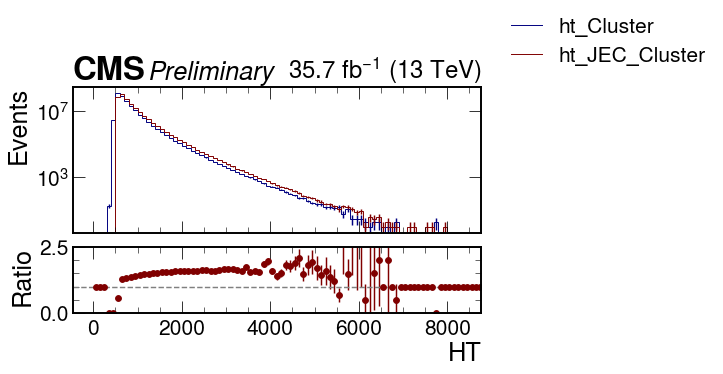

In [42]:
variables = ['ht_Cluster', 'ht_JEC_Cluster']
#             'ht_JEC_JER_up_Cluster', 'ht_JEC_JER_down_Cluster',
#             'ht_JEC_JES_up_Cluster', 'ht_JEC_JES_down_Cluster']
year = '2017'
file_ext = '.pdf'
sample = 'data_'+year
#sample = 'mS1000_T4.0_mPhi4.0_hadronic_'+year
density = False
output_label = "Oct24"
hlist = []
for var in variables:
    h = plots[sample][var]
    if density: h = h/h.sum().value
    hlist.append(h)

fig, axs = plot_ratio(hlist, labels=variables)
hep.cms.label(llabel='Preliminary', data=False, lumi=lumiLabel(year,scouting=True), ax=axs[0])
axs[0].legend(bbox_to_anchor=(1.02,1))
axs[1].set_ylim(0,2.5)

#if saveToAN: fig.savefig(AN_label.format("HT_ratio_"+sample), bbox_inches='tight')
fig.savefig(output_label+"HT_ratio_"+sample+file_ext, bbox_inches='tight')
fig.show()

### Pearson Correlation of ABCD Variables

In [43]:
plot_labels = ['2D_ISR_S1_vs_ISR_nconst_ClusterInverted', '2D_SUEP_S1_vs_SUEP_nconst_Cluster70']
labels = ['ISR', 'SUEP']
#samples = ['data_2016', 'data_2017', 'data_2018']
samples = ['data_2017']

table = []
for plot_label in plot_labels:
    year = []
    for sample in samples:
        h = plots[sample][plot_label]
        h = h[0.3j:, 30j:]
        corr, error = hist2d_correlation(h)
        year.append([corr, error])
    table.append(year)

table = np.array(table)

for i in range(len(table)):
    values = table[i,:,0]
    errors = table[i,:,1]
    line = labels[i] + ' & '
    for v, e in zip(values, errors):
        v, e = sf(v, e)
        line += str(v) + ' $\pm$ ' + str(e) + ' & '
    line = line[:-2]
    line += r'\\'
    print(line)

KeyError: '2D_SUEP_S1_vs_SUEP_nconst_Cluster70'

### Distance Correlation
Warning: this can take quite a while to run.

In [ ]:
import numpy as np
from scipy.spatial import distance_matrix
from scipy.spatial.distance import pdist, squareform

def distance_correlation(x, y):
    
    n = x.shape[0]
    
    x = x.reshape((x.shape[0], 1))
    y = y.reshape((y.shape[0], 1))

    a = squareform(pdist(x, "euclidean"))
    b = squareform(pdist(y, "euclidean"))

    a_row_means = a.mean(axis=0, keepdims=True)
    b_row_means = b.mean(axis=0, keepdims=True)
    a_col_means = a.mean(axis=1, keepdims=True)
    b_col_means = b.mean(axis=1, keepdims=True)
    a_mean = a.mean()
    b_mean = b.mean()

    A = a - a_row_means - a_col_means + a_mean
    B = b - b_row_means - b_col_means + b_mean

    dcov = np.sqrt((A * B).sum() / float(n * n))
    dcov_x = np.sqrt((A * A).sum() / float(n * n))
    dcov_y = np.sqrt((B * B).sum() / float(n * n))
    dcor = dcov / np.sqrt(dcov_x * dcov_y)
    
    return dcor

samples = ['2D_ISR_S1_vs_ISR_nconst_ClusterInverted', '2D_SUEP_S1_vs_SUEP_nconst_Cluster70']
labels = ['ISR', 'SUEP']
years = ['2018', '2017', '2016']

table = []
for sample in samples:
    print(sample)
    sample_table = []
    for year in years:
        print(year)
        trials = []
        npoints = 10000
        for trial in range(100):
            abcd = plots['data_'+year][sample].copy()
            abcd = abcd[0.3j:1.0j, 30j:150j].copy()
            xvals = abcd.axes[0].centers
            yvals = abcd.axes[1].centers
            zvals = abcd.to_numpy()[0]

            xindices = np.random.choice(len(xvals), size=npoints, replace=True)
            yindices = np.random.choice(len(yvals), size=npoints, replace=True)
            probs = np.random.rand(npoints)

            xvals = xvals[xindices]
            yvals = yvals[yindices]
            zvals = zvals[xindices, yindices]
            
            xvals = xvals[zvals > probs]
            yvals = yvals[zvals > probs]
            
            dcor = distance_correlation(xvals, yvals)
            trials.append(dcor)
        
        distCorr = np.mean(trials)
        distCorr_err = np.std(trials)
        sample_table.append([distCorr, distCorr_err])
    table.append(sample_table)

table = np.array(table)

for i in range(len(table)):
    values = table[i,:,0]
    errors = table[i,:,1]
    line = labels[i] + ' & '
    for v, e in zip(values, errors):
        v, e = sf(v, e)
        line += str(v) + ' $\pm$ ' + str(e) + ' & '
    line = line[:-2]
    line += r'\\'
    print(line)

2D_ISR_S1_vs_ISR_nconst_ClusterInverted
2018
2017
2016
2D_SUEP_S1_vs_SUEP_nconst_Cluster70
2018
2017
2016
ISR & 0.139 $\pm$ 0.012 & 0.135 $\pm$ 0.015 & 0.129 $\pm$ 0.014 \\
SUEP & 0.121 $\pm$ 0.008 & 0.119 $\pm$ 0.01 & 0.128 $\pm$ 0.01 \\


### ISR Closure - Yield Systematic

In [44]:
plot_label = '2D_ISR_S1_vs_ISR_nconst_ClusterInverted'
xregions = [0.3j, 0.34j, 0.5j, 1.0j]
yregions = [0j, 18j, 35j, 500j]

table = []
labels = ['SR', 'Predicted SR', 'Ratio']
for year in [ '2017']:
    
    sample = 'data_'+year
    abcd = plots[sample][plot_label].copy()

    SR, SR_exp, delta_SR_exp= ABCD_9regions_yield(abcd, xregions, yregions)

    ratio = SR/SR_exp
    delta_ratio = np.sqrt((SR_exp**-2)*(SR) + (SR**2 * SR_exp**-4)*(delta_SR_exp**2))
    table.append([SR, np.sqrt(SR), SR_exp, delta_SR_exp, ratio, delta_ratio])

table = np.array(table).T

for i in range(len(table)):
    if i%2: continue
    values = table[i]
    errors = table[i+1]
    line = labels[int(i/2)] + ' & '
    for v, e in zip(values, errors):
        v, e = sf(v, e)
        line += str(v) + ' $\pm$ ' + str(e) + ' & '
    line = line[:-2]
    line += r'\\'
    print(line)

SR & 16060.0 $\pm$ 130.0 \\
Predicted SR & 14100.0 $\pm$ 400.0 \\
Ratio & 1.137 $\pm$ 0.031 \\


## Ch. 7 Results

### Validation Region Contamination Table

In [45]:
# validation region
plot_label = 'SUEP_nconst_Cluster70'

regions = 'I'

ratios, lines = [], []
for year in ['2017']:
    QCD_sample = 'data_'+year
    for sample in [x for x in plots.keys() if 'mS' in x]:
        t = sample[sample.find('_T')+2:sample.find('_mPhi')]
        mPhi = sample[sample.find('_mPhi')+5:sample.find('_generic')]
        mS = sample[sample.find('_mS')+3:sample.find('_T')]
        
        label = '$T = '+str(t)+' \GeV$, $m_{\phi}= '+str(mPhi)+'\GeV$, $m_S = ' + str(mS) + ' \GeV$'
        
        line = label + ' & '
        for i, region in enumerate(regions):
            h = plots[sample][region + "_" + plot_label][70j:90j]
            hQCD = plots[QCD_sample][region + "_" + plot_label][70j:90j]
            alpha = h.sum().value
            beta = hQCD.sum().value
            total = alpha/beta * 100
            
            ratios.append(total)
            
            err = np.sqrt(alpha * (beta**-2) + (alpha**2) * (beta**-3)) * 100
            line += '$' + str(round(total,2)) + '\\pm' + str(round(err,2)) + '$'

            if i == len(regions)-1: line += ' \\\\'
            else: line += ' & '
        # print(line)
        lines.append(line)
    print()
    
sorted_lines = np.array(lines)[np.argsort(ratios)]

for l in sorted_lines[-10:]:
    print(l)
    
print(np.mean(ratios))


nan


### Validation Region Yields

In [46]:
plot_label = '2D_SUEP_S1_vs_SUEP_nconst_Cluster70'
xregions = [0.3j, 0.4j, 0.5j, 1.0j]
yregions = [30j, 50j, 70j, 500j]

table = []
labels = ['SR', 'Predicted SR', 'Ratio']
#for year in ['2016', '2017', '2018']:
for year in ['2017']:
    
    sample = 'data_'+year
    abcd = plots[sample][plot_label].copy()

    SR, SR_exp, delta_SR_exp = ABCD_9regions_yield(abcd, xregions, yregions)

    ratio = SR/SR_exp
    delta_ratio_stat = np.sqrt((SR_exp**-2)*(SR) + (SR**2 * SR_exp**-4)*(delta_SR_exp**2))
    delta_ratio_syst = 0.08
    table.append([SR, np.sqrt(SR), None, SR_exp, delta_SR_exp, None, ratio, delta_ratio_stat, delta_ratio_syst])

table = np.array(table).T

for i in range(len(table)):
    if i%3!=0: continue
    values = table[i]
    errors_stat = table[i+1]
    errors_syst = table[i+2]
    line = labels[int(i/3)] + ' & '
    for v, stat, syst in zip(values, errors_stat, errors_syst):
        if syst is not None:
            v = round(v, 2)
            stat = round(stat, 2)
            syst = round(syst, 2)
            line += str(v) + ' $\pm$ ' + str(stat) + ' (stat.) $\pm$ ' + str(syst) + ' (syst.) & '
        else:
            v, stat = sf(v, stat)
            line += str(v) + ' $\pm$ ' + str(stat) + ' & '
    line = line[:-2]
    line += r'\\'
    print(line)

KeyError: '2D_SUEP_S1_vs_SUEP_nconst_Cluster70'

### Table and Plots of Post-Fits, Limits
See SUEPLimits repo

The following is DEPRECATED

In [47]:
plot_label = '2D_SUEP_S1_vs_SUEP_nconst_Cluster70'
year = '2017'
abcd = plots['QCD_HT_'+year][plot_label]

newbins = [70, 90, 110, 130, 170, 500]
xregions = [0.3j, 0.4j, 0.5j, 1.0j]
yregions = [30j, 50j, 70j, 500j]
SR, SR_exp = ABCD_9regions_errorProp(abcd, xregions, yregions, sum_var='x')
SR_data, SR_exp_data = ABCD_9regions_errorProp(plots['data_'+year][plot_label], xregions, yregions, sum_var='x')

fig, ax = plt.subplots()
hep.cms.label(llabel='Preliminary',data=False, lumi=lumiLabel(year))
hep.histplot(rebin_piecewise(SR_exp_data, newbins), yerr=True, label="Pred. SR - Data", color=default_colors['data'])    
hep.histplot(rebin_piecewise(SR, newbins), lw=3, histtype='fill', alpha=0.3,yerr=True, label="SR - MC", color=default_colors['QCD'])    
hep.histplot(rebin_piecewise(SR_exp, newbins), lw=3, yerr=True, label="Pred. SR - MC", color=default_colors['QCD'], linestyle='dashed')    
hep.histplot(rebin_piecewise(SR_data, newbins), lw=3, yerr=True, label="SR - Data", color=default_colors['data'], linestyle='dashed')    

# samples = ['SUEP-m125-generic-htcut_'+year, 'SUEP-m400-generic_'+year,
#           'SUEP-m750-generic_'+year, 'SUEP-m1000-generic_'+year]
# labels = [r'$M_{S}=125$ GeV',r'$M_{S}=400$ GeV',r'$M_{S}=750$ GeV',r'$M_{S}=1000$ GeV']
masses = [125, 400, 700, 1000]
for mass in masses:
    sample = 'mS{}_T3.0_mPhi3.0_generic_{}'.format(mass, year)
    label = r'$m_{S}='+str(mass)+'$ GeV'
    if sample not in plots.keys(): continue
    abcd = plots[sample][plot_label]
    SUEP_SR = abcd[xregions[-2]:1.0j:sum, yregions[-2]:500j]
    hep.histplot(rebin_piecewise(SUEP_SR, newbins), yerr=True, label=label)    

plt.legend(loc='upper left', bbox_to_anchor=(1.02, 1))
plt.yscale("log")
plt.ylim(1e0, 1e6)

KeyError: '2D_SUEP_S1_vs_SUEP_nconst_Cluster70'

## Appendix B

In [ ]:
plot_label = '2D_SUEP_S1_vs_SUEP_nconst_Cluster70'
year = '2018'
samples = [x for x in plots.keys() if 'mS' in x] + ['QCD_HT_'+year]
#samples =['QCD_HT_'+year]

draw_lines = True
lines_x = [0.3, 0.4, 0.5]
lines_y = [30, 50, 70]

fig, ax = plt.subplots(figsize=(10, 10))

decays = {
    'hadronic' : r"$A^' \rightarrow e^{+}e^{-},\mu^{+}\mu^{-},\pi^{+}\pi^{-}$""\n""with BR=15,15,70%",
    'leptonic' : r"$A^' \rightarrow e^{+}e^{-},\mu^{+}\mu^{-},\pi^{+}\pi^{-}$""\n""with BR=40,40,20%",
    'generic' : r"$A^' \rightarrow \pi^{+}\pi^{-}$""\n""with BR=100%"
}
    
for i, sample in enumerate(samples):
    h = plots[sample][plot_label]
    
    print(sample)
    
    bins = np.linspace(0,500,10)
    h = h[0.3j:,30j::2j]

    hep.cms.label(llabel='Preliminary',data=False, lumi=lumiLabel(year))
    _ = hep.hist2dplot(h, 
               norm=matplotlib.colors.LogNorm(),
               cmap = 'PuBu',
               cbar=True,
               label=sample) 

    # draw lines to visualize ABCD regions
    if draw_lines:
        for y in lines_y: plt.plot([0,10000], [y,y], color='red', linestyle='dashed')
        for x in lines_x: plt.plot([x,x], [0,1000], color='red', linestyle='dashed')

    plt.ylim(10,200)
    plt.xlim(0.2,1.0)
    
    if 'mS' in sample:
        plt.ylim(10,500)
        split = sample.split('_')
        (Mass,t,mdark,decay) = (float(split[0][2:]),float(split[1][1:]),float(split[2][4:]),split[3])

        plt.text(0.25, 366,r"$m_S$ = {}".format(Mass), fontsize='small')
        plt.text(0.25, 333,r"$m_\phi$ = {}".format(mdark), fontsize='small')
        plt.text(0.25, 300,"T = {}".format(t), fontsize='small')
        plt.text(0.25, 250,"decay = {}".format(decays[decay]), fontsize='small')

    if saveToAN: plt.savefig(AN_label.format("{}_{}_{}".format(plot_label, sample, year)))
    plt.savefig(output_label+plot_label+"_"+sample+"_"+year+file_ext)
    plt.show()

## Appendix E

### ML 2D Distributions of ABCD Variables

In [ ]:
plot_label = '2D_SUEP_S1_vs_single_l5_bPfcand_S1_SUEPtracks_GNN'
sample = 'QCD_HT_2018'
#samples += ['SUEP-m125-generic', 'SUEP-m400-generic', 'SUEP-m750-generic', 'SUEP-m1000-generic']
draw_lines = True
lines_x = [0.3,0.4, 0.5, 1.0]
lines_y = [0,0.5,1]

fig, ax = plt.subplots(figsize=(10, 10))

k = 0
regions = ['A','B','C','D','E','SR']
for i in range(len(lines_y)-1):
    for j in range(len(lines_x)-1):
        xloc = (lines_x[j+1] + lines_x[j])/2 - 0.01
        yloc = (lines_y[i+1] + lines_y[i])/2
        plt.text(xloc, yloc, regions[k])
        k+=1
    
if plots[sample][plot_label].sum().value == 0:
    print("Histogram empty for sample", sample)

h = plots[sample][plot_label]
h = h[0.3j:,:]

hep.cms.label(llabel='Preliminary',data=False, lumi=61.0)
_ = hep.hist2dplot(h, 
           norm=matplotlib.colors.LogNorm(),
           cmap = 'PuBu',
           cbar=True,
           label=sample) 

# draw lines to visualize ABCD regions
if draw_lines:
    for y in lines_y: plt.plot([0,10000], [y,y], color='red', linestyle='dashed')
    for x in lines_x: plt.plot([x,x], [0,1000], color='red', linestyle='dashed')

plt.ylim(0,1)
plt.xlim(0.2,1.0)

if saveToAN: plt.savefig(AN_label.format("ML_extendedABCD_regions_2018"))
plt.savefig(output_label+""+file_ext)
plt.show()

### ML Closure

In [ ]:
plot_label = '2D_SUEP_S1_vs_single_l5_bPfcand_S1_SUEPtracks_GNN'
year = '2018'
abcd = plots['QCD_HT_'+year][plot_label]

xregions = [0.3j, 0.4j, 0.5j, 1.0j]
yregions = [0.0j, 0.5j, 1.0j]

SR, SR_exp = ABCD_6regions(abcd, xregions, yregions, sum_var='x')

SR = SR[::2j]
SR_exp = SR_exp[::2j]

fig, axs = plot_ratio([SR_exp, SR], labels=["$SR_{obs}$", "$SR_{exp}$"])
_ = axs[1].set_ylim(0,2)
_ = axs[0].legend()
hep.cms.label(llabel='Preliminary', data=False, lumi=lumiLabel(year), ax=axs[0])


if saveToAN: plt.savefig(AN_label.format("ML_closure_"+year))
plt.savefig(output_label+"ML_closure_"+year+file_ext)

### ML MC/Data

In [ ]:
x = 'ABCDE'
y = 'ABCDE'
year = '2018'
plot_labels = ['single_l5_bPfcand_S1_SUEPtracks_GNN']
for plot_label in plot_labels:
    fig, (ax1, ax2) = plot_ratio_regions(plots, 'A_'+plot_label, 
                           'data_'+year, 'QCD_HT_'+year,
                           y, density=False)
    ax1.legend(labels=['QCD','Data'], loc='upper left', bbox_to_anchor=(1.02, 1))
    hep.cms.label(llabel='Preliminary', data=False, lumi=lumiLabel(year), ax=ax1)

    ax1.set_ylim(1e0, 2e5)
    fig.set_size_inches(15, 6)
    
    if saveToAN: fig.savefig(AN_label.format("ML_control_regions_ratio_" + year))
    fig.savefig(output_label + 'ML_control_regions_ratio_' + year + file_ext, bbox_inches='tight')

### ML Signal Region

In [ ]:
plot_label = '2D_SUEP_S1_vs_single_l5_bPfcand_S1_SUEPtracks_GNN'
year = '2018'
abcd = plots['QCD_HT_'+year][plot_label]

xregions = [0.3j, 0.4j, 0.5j, 1.0j]
yregions = [0.0j, 0.5j, 1.0j]

SR, SR_exp = ABCD_6regions(abcd, xregions, yregions, sum_var='x')
_, SR_exp_data = ABCD_6regions(plots['data_'+year][plot_label], xregions, yregions, sum_var='x')

# use the custom plot_ratio
# the hist implementation used elsewhere in the notebook doesn't use the 
# errors in the hists' bins to calculate the errors in the ratio plot
# fig, axs, _ = plot_ratio(SR_exp, SR, 
#                          "# Constituents in SUEP", "$SR_{obs}$ - QCD", "$SR_{exp}$ - Data")
# _ = axs[1].set_ylim(0,3.0)
# _ = axs[0].legend()

fig, ax = plt.subplots(figsize=(10, 10))
hep.cms.label(llabel='Preliminary',data=False, lumi=lumiLabel(year))
hep.histplot(SR_exp_data, yerr=False, label="Pred. SR - Data", color=default_colors['data'])    
hep.histplot(SR, yerr=False, label="SR - QCD", color=default_colors['QCD'])    
hep.histplot(SR_exp, yerr=False, label="Pred. SR - QCD", color=default_colors['QCD'])    

samples = ['SUEP-m125-generic-htcut', 'SUEP-m400-generic',
          'SUEP-m750-generic', 'SUEP-m1000-generic']
labels = [r'$M_{S}=125$ GeV',r'$M_{S}=400$ GeV',r'$M_{S}=750$ GeV',r'$M_{S}=1000$ GeV']
for sample, label in zip(samples, labels):
    abcd = plots[sample][plot_label]
    SUEP_SR = abcd[0.5j:1.0j:sum,0.5j:1.0j:2j]
    hep.histplot(SUEP_SR, yerr=False, label=label, color=default_colors[sample])    

plt.legend(loc='best')
plt.yscale("log")
plt.ylim(1e0,1e5)

if saveToAN: plt.savefig(AN_label.format("ML_final_"+year))
plt.savefig(output_label+"ML_final_"+year+file_ext)

### ML Systematic

In [ ]:
# parameters
plot_label = '2D_ISR_S1_vs_single_l5_bPfcand_S1_SUEPtracks_GNNInverted'
sample1 = 'QCD_HT_2018'
sample2 = 'data_2018'

h1 = plots[sample1][plot_label]
h2 = plots[sample2][plot_label]

h1 = h1[0.0j::sum, 0.0j::5j]
h2 = h2[0.0j::sum, 0.0j::5j]

fig = plt.figure(figsize=(10, 8))
      
fig, axs, _ = plot_ratio([h1, h2] labels=[r'QCD - $H_T$ Binned', 'Data'])
axs[0].legend()
axs[1].set_ylim(0.5,2.5)
#axs[0].set_yscale("linear")
cms = axs[0].text(
    -0.25, 4.5e7, u"CMS $\it{Preliminary}$",
    fontsize=24, fontweight='bold',
)
lumi = axs[0].text(
    0.78, 4.5e7, r"%.1f fb$^{-1}$ (13 TeV)" % round(lumis[year]/1000,1),
    fontsize=22, 
)
plt.savefig(AN_label.format("ML_systematic_"+year))

In [14]:
plots.keys()

dict_keys(['1000to1500_2018', 'QCD_HT_2018', '100to200_2018', '1500to2000_2018', '2000toInf_2018', '200to300_2018', '300to500_2018', '500to700_2018', '700to1000_2018', 'TTJets_2018', 'data_A-v1+RAW_Sep28_HTJECcut.root_2018', 'data_2018', 'data_B-v1+RAW_Sep28_HTJECcut.root_2018', 'data_C-v1+RAW_Sep28_HTJECcut.root_2018', 'data_D-v1+RAW_Sep28_HTJECcut.root_2018', 'data_E-v1+RAW_Sep28_HTJECcut.root_2018', 'mS1000_T4.0_mPhi4.0_hadronic_2018', 'mS125_T4.0_mPhi4.0_generic_2018', 'mS400_T4.0_mPhi4.0_leptonic_2018', 'MC_2018', 'MC_all', 'data_all', 'mS1000_T4.0_mPhi4.0_hadronic_all', 'mS125_T4.0_mPhi4.0_generic_all', 'mS400_T4.0_mPhi4.0_leptonic_all'])

## Appendix I

In [48]:
sys_list =  ['puweights', 'track','JER','JES','trigSF','PSWeight_ISR','PSWeight_FSR','prefire','higgs_weights']
#sys_list =  ['track']
mass_list = [125]
#mass_list = [400]
#mass_list = [1000]

decay = 'generic'
year = '2016apv'
mPhi = '4.0'
T = '4.0'
output_label="Nov9"
nconst_bins = [0,10,20,30,40,50,60,70,80,90,100]
sph_bins = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]

plt.rcParams.update({'font.size': 13})

upratios, downratios = nested_dict(3, float), nested_dict(3, float)
for mass in mass_list:
    
    plot = plots['mS{}_T{}_mPhi{}_{}_{}'.format(mass, T, mPhi, decay, year)]

    for sys in sys_list:

        sig_nconst = plot['SUEP_nconst_Cluster']
        up_nconst = plot['SUEP_nconst_Cluster_{}_up'.format(sys)]
        down_nconst = plot['SUEP_nconst_Cluster_{}_down'.format(sys)]

        sig_sph = plot['SUEP_S1_Cluster']
        up_sph = plot['SUEP_S1_Cluster_{}_up'.format(sys)]
        down_sph = plot['SUEP_S1_Cluster_{}_down'.format(sys)]
        
        print(sys)
        print(mass, mPhi, T, decay)
        upratio = (up_nconst.sum().value/sig_nconst.sum().value - 1)*100
        print("\tUp Ratio", upratio)
        upratios[str(mass)][year][sys] = upratio
        #print("Down", down_nconst.sum().value,  np.sqrt(down_nconst.sum().variance))
        downratio = (down_nconst.sum().value/sig_nconst.sum().value - 1)*100
        print("\tDown Ratio", downratio)
        downratios[str(mass)][year][sys] = downratio

        # Change the bin sizes

        sig_nconst = rebin_piecewise(sig_nconst, nconst_bins)
        up_nconst = rebin_piecewise(up_nconst, nconst_bins)
        down_nconst = rebin_piecewise(down_nconst, nconst_bins)

        sig_sph = rebin_piecewise(sig_sph, sph_bins)
        up_sph = rebin_piecewise(up_sph, sph_bins)
        down_sph = rebin_piecewise(down_sph, sph_bins)

        plt.figure(figsize=(16,8))
        plt.gcf().subplots_adjust(bottom=0.15, left=0.17)


        ### Plot distribution for number of constituents

        # Plot histograms of systematics 
        up,down,sig = up_sph,down_sph,sig_sph
        ax1 = plt.subplot2grid((4,2), (0,0),rowspan=2)
        ax1.bar(*up.axes.centers, up.values(), width=up.axes.widths[0],yerr=up.variances()**0.5,fill=False,color= 'salmon',edgecolor='red',linewidth=2,alpha =0.7,label='Up',capsize=4,ecolor = 'salmon')
        ax1.bar(*sig.axes.centers, sig.values(), width=sig.axes.widths[0], yerr=sig.variances()**0.5,fill=False,linewidth=2,color= 'grey',edgecolor='black',alpha=0.7, label='Signal',capsize=4, ecolor='black')
        ax1.bar(*down.axes.centers, down.values(), width=down.axes.widths[0],yerr=down.variances()**0.5,color= 'lightblue',fill=False,edgecolor='blue',alpha=0.7,linewidth=2,label='Down',capsize=4,ecolor='blue')
        ax1.set_title("Effect "+sys+ " systematic for $m_{S}=$"+str(mass)+ " GeV")
        ax1.set_ylim([0.5,max(sig.values())*10])
        ax1.set_ylabel("Events")
        ax1.set_yscale('log')
        ax1.legend() 


        # Make ratio plot
        up_ratio = np.divide( up.values(), sig.values(), out=np.ones_like(up.values()), where=sig.values()!=0) #Overestimate
        down_ratio = np.divide( down.values(), sig.values(), out=np.ones_like(down.values()), where=sig.values()!=0) #Underestimate

        #Calculate errors in up_ratio and down_ratio
        up_err = hist.intervals.ratio_uncertainty(up.values(),sig.values()) #This ratio uncertainty is the poisson interval (for a coverage of 0.68) divided by sig
        down_err = hist.intervals.ratio_uncertainty(down.values(),sig.values())

        ax2 = plt.subplot2grid((4,2), (2,0),sharex=ax1)
        ups = ax2.errorbar(*sig.axes.centers, up_ratio,fmt='o', color='red', label = 'up',yerr= up_err,capsize=4)
        downs = ax2.errorbar(*sig.axes.centers, down_ratio,fmt='o', color='blue', label = 'down',yerr= down_err,capsize=4)
        ax2.axhline(1,ls='--')
        ax2.set_ylim([0.5,2.0])
        ax2.set_xlabel('$Sph_1$')
        ax2.set_ylabel('sys/nom')


        ### Plot distribution for number of sphericity

        # Plot histograms of systematics 
        up,down,sig = up_nconst,down_nconst,sig_nconst
        ax3 = plt.subplot2grid((4,2), (0,1),rowspan=2)
        ax3.bar(*up.axes.centers, up.values(), width=up.axes.widths[0],yerr=up.variances()**0.5,fill=False,color= 'salmon',edgecolor='red',linewidth=2,alpha =0.7,label='Up',capsize=4,ecolor = 'salmon')
        ax3.bar(*sig.axes.centers, sig.values(), width=sig.axes.widths[0], yerr=sig.variances()**0.5,fill=False,linewidth=2,color= 'grey',edgecolor='black',alpha=0.7, label='Signal',capsize=4, ecolor='black')
        ax3.bar(*down.axes.centers, down.values(), width=down.axes.widths[0],yerr=down.variances()**0.5,color= 'lightblue',fill=False,edgecolor='blue',alpha=0.7,linewidth=2,label='Down',capsize=4,ecolor='blue')
        ax3.set_title("Effect "+sys+ " systematic for $m_{S}=$"+str(mass) +" GeV")
        ax3.set_ylim([0.5,max(sig.values())*10])
        ax3.set_ylabel("Events")
        ax3.set_yscale('log')
        ax3.legend()


        # Make ratio plot
        up_ratio = np.divide( up.values(), sig.values(), out=np.ones_like(up.values()), where=sig.values()!=0) #Overestimate
        down_ratio = np.divide( down.values(), sig.values(), out=np.ones_like(down.values()), where=sig.values()!=0) #Underestimate

        #Calculate errors in up_ratio and down_ratio
        up_err = hist.intervals.ratio_uncertainty(up.values(),sig.values()) #This ratio uncertainty is the poisson interval (for a coverage of 0.68) divided by sig
        down_err = hist.intervals.ratio_uncertainty(down.values(),sig.values())

        ax4 = plt.subplot2grid((4,2), (2,1),sharex=ax3)
        ups = ax4.errorbar(*sig.axes.centers, up_ratio,fmt='o', color='red', label = 'up',yerr= up_err,capsize=4)
        downs = ax4.errorbar(*sig.axes.centers, down_ratio,fmt='o', color='blue', label = 'down',yerr= down_err,capsize=4)
        ax4.axhline(1,ls='--')
        ax4.set_ylim([0.5,2.0])
        ax4.set_xlabel("$\# Constituents$")
        ax4.set_ylabel('sys/nom')
        
        # if saveToAN: plt.savefig(AN_label.format('systematic_variations_' + sys +'_mS' + str(mass)),bbox_inches='tight')
        
        plt.savefig(output_label + 'systematic_variations_' + sys +'_mS' + str(mass), bbox_inches='tight')
        plt.show()

KeyError: 'mS125_T4.0_mPhi4.0_generic_2016apv'